<a href="https://colab.research.google.com/github/CarolinaSperaBraga/Data_Mining_Atlas_Project/blob/main/Trabalho_2_Projeto_Atlas_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0878 - Mineração Estatística de Dados
## Trabalho: Projeto Atlas Brasil

**Professor:** Jorge Luis Bazán  
**E-mail:** <jlbazan@icmc.usp.br>  
**Website:** [https://jorgeluisbazan.weebly.com/](https://jorgeluisbazan.weebly.com/)


**Alunos e Número USP:**

- Carolina Spera Braga, 7161740
- Daniel Gregório Chagas, 9404302
- Thaís Parron Alves, 12558172

-------

# 1. Descrição do problema

O Censo Demográfico de 2010 revelou que, apesar de uma média de renda domiciliar per capita de R\$ 668, a desigualdade de renda ainda persiste no Brasil. Cerca de 25% da população recebia até R\$ 188, enquanto metade ganhava até R\$ 375, valor abaixo do salário mínimo naquele ano. A incidência de pobreza era maior em municípios de porte médio, onde aproximadamente 6,3% da população vivia com até R$ 70 de renda domiciliar per capita. Observou-se também disparidades de rendimento entre homens e mulheres, especialmente em municípios de até 50 mil habitantes.

Além disso, o Censo destacou a redução da taxa de analfabetismo, embora ainda atingisse 28% nas menores cidades do Nordeste. A proporção de analfabetos entre pretos e pardos era significativamente maior do que entre brancos. Quanto ao saneamento básico, houve melhorias, mas ainda era inadequado em muitos domicílios, especialmente em áreas rurais e municípios menores.

Esses dados fornecem insights importantes sobre a distribuição de renda, educação e qualidade de vida no Brasil, destacando a necessidade contínua de políticas públicas para enfrentar essas disparidades.

A pobreza é um tópico relevante no Brasil e em diversos países e identificar quais variáveis ou atributos precisam ser melhoradas com o intuito de que a pobreza diminua é um desafio para as pessoas que trabalham em políticas públicas. [2]

# 2. Descrição dos dados

No arquivo anexo, DadosAtlasBrasil2010.xls, se encontra o conjunto de dados provenientes do CENSO 2010 do IBGE, disponibilizados pelo projeto http://www.atlasbrasil.org.br/. Estes dados englobam 5565 municípios do Brasil (instâncias) e 238 variáveis ou atributos distintos. [1]

A variável alvo a ser considerada é a proporção de pessoas em situação de pobreza por município, definida como:

$$ POB = \frac{PMPOB}{100}​ $$

onde:

- PMPOB (% de pobres): representa a porcentagem de indivíduos com renda domiciliar per capita igual ou inferior a R$ 140,00 mensais, em valores de agosto de 2010. Esta métrica está expressa em uma escala de 0 a 100.

Além disso, na base de dados, há outras 6 variáveis de identificação e 231 preditores adicionais. A descrição completa desses atributos pode ser encontrada na planilha denominada "Siglas", que também se encontra no arquivo anexo DadosAtlasBrasil2010.xls, e que foi carregada abaixo:

In [1]:
import pandas as pd

caminho_arquivo = 'DadosAtlasBrasil2010 - Siglas.xlsx'
dados_siglas = pd.read_excel(caminho_arquivo)

|index|SIGLA|NOME CURTO|NOME LONGO|DEFINIÇÃO|
|---|---|---|---|---|
|0|UF|Código da Unidade da Federação|Código da Unidade da Federação|Código utilizado pelo IBGE para identificação do estado\.|
|1|UFN|Nome da Unidade da Federação|Nome da Unidade da Federação|Nome da Unidade da Federação\.|
|2|CODMUN6|Código do Município|Código do Município|Código utilizado pelo IBGE para identificação do município\.|
|3|CODMUN7|Código do Município|Código do Município|Código utilizado pelo IBGE para identificação do município\(com digito verificador\)\.|
|4|NOMEMUN|Nome do Município|Nome do município|Nome do município\.|
|5|ESPVIDA|Esperança de vida ao nascer |Esperança de vida ao nascer|Número médio de anos que as pessoas deverão viver a partir do nascimento, se permanecerem constantes ao longo da vida o nível e o padrão de mortalidade por idade prevalecentes no ano do Censo\.|
|6|FECTOT|Taxa de fecundidade total|Taxa de fecundidade total|Número médio de filhos que uma mulher deverá ter ao terminar o período reprodutivo \(15 a 49 anos de idade\)\.|
|7|MORT1|Mortalidade infantil|Mortalidade até um ano de idade|Número de crianças que não deverão sobreviver ao primeiro ano de vida em cada 1000 crianças nascidas vivas\.|
|8|MORT5|Mortalidade até 5 anos de idade|Mortalidade até cinco anos de idade|Probabilidade de morrer entre o nascimento e a idade exata de 5 anos, por 1000 crianças nascidas vivas\.|
|9|RAZDEP|Razão de dependência|Percentual da população de menos de 15 anos e da população de 65 anos e mais em relação à população de 15 a 64 anos|Razão de dependência é medida pela razão entre o número de pessoas com 14 anos ou menos e de 65 anos ou mais de idade \(população dependente\) e o número de pessoas com idade de 15 a 64 anos \(população potencialmente ativa\) multiplicado por 100\.|
|10|SOBRE40|Probabilidade de sobrevivência até 40 anos|Probabilidade de sobrevivência até 40 anos|Probabilidade de uma criança recém-nascida viver até os 40 anos, se permanecerem constantes ao longo da vida o nível e o padrão de mortalidade por idade prevalecentes no ano do Censo\.|
|11|SOBRE60|Probabilidade de sobrevivência até 60 anos|Probabilidade de sobrevivência até 60 anos|Probabilidade de uma criança recém-nascida viver até os 60 anos, se permanecerem constantes ao longo da vida o nível e o padrão de mortalidade por idade prevalecentes no ano do Censo\.|
|12|T\_ENV|Taxa de envelhecimento|Taxa de envelhecimento|Razão entre a população de 65 anos ou mais de idade e a população total multiplicado por 100\.|
|13|E\_ANOSESTUDO|Expectativa de anos de estudo|Expectativa de anos de estudo aos 18 anos de idade|Número médio de anos de estudo que uma geração de crianças que ingressa na escola deverá completar ao atingir 18 anos de idade, se os padrões atuais se mantiverem ao longo de sua vida escolar\.|
|14|T\_ANALF11A14|Taxa de analfabetismo - 11 a 14 anos|Taxa de analfabetismo da população de 11 a 14 anos de idade|Razão entre a população de 11 a 14 anos de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100\.|
|15|T\_ANALF15A17|Taxa de analfabetismo - 15 a 17 anos |Taxa de analfabetismo da população de 15 a 17 anos de idade|Razão entre a população de 15 a 17 anos de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100\.|
|16|T\_ANALF15M|Taxa de analfabetismo - 15 anos ou mais |Taxa de analfabetismo da população de 15 anos ou mais de idade|Razão entre a população de 15 anos ou mais de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100\.|
|17|T\_ANALF18A24|Taxa de analfabetismo - 18 a 24 anos |Taxa de analfabetismo da população de 18 a 24 anos de idade|Razão entre a população de 18 a 24 anos de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100\.|
|18|T\_ANALF18M|Taxa de analfabetismo - 18 anos ou mais |Taxa de analfabetismo da população de 18 anos ou mais de idade|Razão entre a população de 18 anos ou mais de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100\.|
|19|T\_ANALF25A29|Taxa de analfabetismo - 25 a 29 anos |Taxa de analfabetismo da população de 25 a 29 anos de idade|Razão entre a população de 25 a 29 anos de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100\.|
|20|T\_ANALF25M|Taxa de analfabetismo - 25 anos ou mais|Taxa de analfabetismo da população de 25 anos ou mais de idade|Razão entre a população de 25 anos ou mais de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100\.|
|21|T\_ATRASO\_0\_BASICO|% de 6 a 17 anos no básico sem atraso|Percentual da população de 6 a 17 anos de idade frequentando o ensino básico que não tem atraso idade-série\.|Razão entre o número de pessoas de 6 a 17 anos frequentando o ensino básico regular seriado \(fundamental + médio\) sem atraso idade-série e o número total de pessoas nessa faixa etária frequentando esse nível de ensino multiplicado por 100\. O atraso idade-série é calculado pela fórmula: \[\(idade - 5\) - número da série frequentada\], na qual o número da série frequentada é 10, 11 e 12 para as pessoas que frequentam a 1ª, a 2ª e a 3ª séries do ensino médio, respectivamente\. Foram consideradas sem atraso não só as pessoas para as quais o resultado dessa fórmula foi igual a zero, mas também aquelas para as quais o resultado foi menor do que zero, ou seja, as pessoas com adiantamento idade-série\. As pessoas de 6 a 14 anos frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental\. As pessoas de 15 a 17 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino\.|
|22|T\_ATRASO\_0\_FUND|% de 6 a 14 anos no fundamental sem atraso|Percentual da população de 6 a 14 anos de idade frequentando o ensino fundamental que não tem atraso idade-série\.|Razão entre o número de pessoas de 6 a 14 anos frequentando o ensino fundamental regular seriado sem atraso idade-série e o número total de pessoas nessa faixa etária frequentando esse nível de ensino multiplicado por 100\. O atraso idade-série é calculado pela fórmula: \[\(idade - 5\) - número da série frequentada\] e foram consideradas sem atraso não só as pessoas para as quais o resultado dessa fórmula foi igual a zero, mas também aquelas para as quais o resultado foi menor do que zero, ou seja, as pessoas com adiantamento idade-série\. As pessoas de 6 a 14 anos frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental\.|
|23|T\_ATRASO\_0\_MED|% de 15 a 17 anos no médio sem atraso|Percentual da população de 15 a 17 anos de idade frequentando o ensino médio que não tem atraso idade-série\.|Razão entre o número de pessoas de 15 a 17 anos frequentando o ensino médio regular seriado sem atraso idade-série e o número total de pessoas nessa faixa etária frequentando esse nível de ensino multiplicado por 100\. O atraso idade-série é calculado pela fórmula: \[\(idade - 14\) - número da série frequentada\] e foram consideradas sem atraso não só as pessoas para as quais o resultado dessa fórmula foi igual a zero, mas também aquelas para as quais o resultado foi menor do que zero, ou seja, as pessoas com adiantamento idade-série\. As pessoas de 15 a 17 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino\.|
|24|T\_ATRASO\_1\_BASICO|% de 6 a 17 no básico com 1 ano de atraso|Percentual da população de 6 a 17 anos de idade frequentando o ensino básico que tem 1 ano de atraso idade-série\.|Razão entre o número de pessoas de 6 a 17 anos frequentando o ensino básico regular seriado \(fundamental + médio\) com atraso idade-série de 1 ano e o número total de pessoas nessa faixa etária frequentando esse nível de ensino multiplicado por 100\. O atraso idade-série é calculado pela fórmula: \[\(idade - 5\) - número da série frequentada\], na qual o número da série frequentada é 10, 11 e 12 para as pessoas que frequentam a 1ª, a 2ª e a 3ª séries do ensino médio, respectivamente\. As pessoas de 6 a 14 anos frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental\. As pessoas de 15 a 17 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino\.|
|25|T\_ATRASO\_1\_FUND|% de 6 a 14 anos no fundamental com 1 ano de atraso|Percentual da população de 6 a 14 anos de idade frequentando o ensino fundamental que tem 1 ano de atraso idade-série\.|Razão entre o número de pessoas de 6 a 14 anos frequentando o ensino fundamental regular seriado com atraso idade-série de 1 ano e o número total de pessoas nessa faixa etária frequentando esse nível de ensino multiplicado por 100\. O atraso idade-série é calculado pela fórmula: \[\(idade - 5\) - número da série frequentada\]\. As pessoas de 6 a 14 anos frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental\.|
|26|T\_ATRASO\_1\_MED|% de 15 a 17 no médio com 1 ano de atraso|Percentual da população de 15 a 17 anos de idade frequentando o ensino médio que tem 1 ano de atraso idade-série\.|Razão entre o número de pessoas de 15 a 17 anos frequentando o ensino médio regular seriado com atraso idade-série de 1 ano e o número total de pessoas nessa faixa etária frequentando esse nível de ensino multiplicado por 100\. O atraso idade-série é calculado pela fórmula: \[\(idade - 14\) - número da série frequentada\]\. As pessoas de 15 a 17 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino\.|
|27|T\_ATRASO\_2\_BASICO|% de 6 a 17 anos no básico com 2 anos ou mais de atraso|Percentual da população de 6 a 17 anos de idade frequentando o ensino básico que tem 2 anos ou mais de atraso idade-série\.|Razão entre o número de pessoas de 6 a 17 anos frequentando o ensino básico regular seriado \(fundamental + médio\) com atraso idade-série de 2 anos ou mais e o número total de pessoas nessa faixa etária frequentando esse nível de ensino multiplicado por 100\. O atraso idade-série é calculado pela fórmula: \[\(idade - 5\) - número da série frequentada\], na qual o número da série frequentada é 10, 11 e 12 para as pessoas que frequentam a 1ª, a 2ª e a 3ª séries do ensino médio, respectivamente\. As pessoas de 6 a 14 anos frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental\. As pessoas de 15 a 17 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino\.|
|28|T\_ATRASO\_2\_FUND|% de 6 a 14 anos no fundamental com 2 anos ou mais de atraso|Percentual da população de 6 a 14 anos de idade frequentando o ensino fundamental que tem 2 anos ou mais de atraso idade-série\.|Razão entre o número de pessoas de 6 a 14 anos frequentando o ensino fundamental regular seriado com atraso idade-série de 2 anos ou mais e o número total de pessoas nessa faixa etária frequentando esse nível de ensino multiplicado por 100\. O atraso idade-série é calculado pela fórmula: \[\(idade - 5\) - número da série frequentada\]\. As pessoas de 6 a 14 anos frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental\.|
|29|T\_ATRASO\_2\_MED|% de 15 a 17 anos no médio com 2 anos de atraso|Percentual da população de 15 a 17 anos de idade frequentando o ensino médio que tem  2 anos de atraso idade-série\.|Razão entre o número de pessoas de 15 a 17 anos frequentando o ensino médio regular seriado com atraso idade-série de 2 anos e o número total de pessoas nessa faixa etária frequentando esse nível de ensino multiplicado por 100\. O atraso idade-série é calculado pela fórmula: \[\(idade - 14\) - número da série frequentada\]\. As pessoas de 15 a 17 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino\.|
|30|T\_FBBAS|Taxa de frequência bruta ao básico|Taxa de frequência bruta ao ensino   básico|Razão entre o número total de pessoas de qualquer idade frequentando o ensino básico \(fundamental ou médio - regular ou seriado\) e a população na faixa etária de 6 a 17 anos multiplicado por 100\. As pessoas frequentando a 4ª série do ensino médio foram consideradas como tendo concluído esse nível de ensino\. As pessoas de 6 anos ou mais frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental\.|
|31|T\_FBFUND|Taxa de frequência bruta ao fundamental|Taxa de frequência bruta ao ensino   fundamental|Razão entre o número total de pessoas de qualquer idade frequentando o ensino fundamental regular seriado e a população na faixa etária de 6 a 14 anos multiplicado por 100\. As pessoas de 6 anos ou mais frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental\.|
|32|T\_FBMED|Taxa de frequência bruta ao médio|Taxa de frequência bruta ao ensino   médio|Razão entre o número total de pessoas de qualquer idade frequentando o ensino médio regular seriado e a população na faixa etária de 15 a 17 anos multiplicado por 100\. As pessoas frequentando a 4ª série do ensino médio foram consideradas como tendo concluído esse nível de ensino\.|
|33|T\_FBPRE|Taxa de frequência bruta à pré-escola|Taxa de frequência bruta à pré-escola|Razão entre o número total de crianças de até 5 anos de idade \(somente 5 anos em 1991\) frequentando a pré-escola e a população nessa mesma faixa etária multiplicado por 100\. As pessoas de 6 anos ou mais frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental\.|
|34|T\_FBSUPER|Taxa de frequência bruta ao superior|Taxa de frequência bruta ao ensino   superior|Razão entre o número total de pessoas de qualquer idade frequentando o ensino superior \(graduação, especialização, mestrado ou doutorado\) e a população na faixa etária de 18 a 24 anos multiplicado por 100\.|
|35|T\_FLBAS|Taxa de frequência líquida ao básico|Taxa de frequência líquida ao ensino   básico|Razão entre o número de pessoas na faixa etária de 6 a 17 anos frequentando o ensino básico \(fundamental ou médio - regular ou seriado\) e a população total dessa mesma faixa etária multiplicado por 100\. As pessoas de 6 a 17 anos frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental\. As pessoas de 6 a 17 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino\.|
|36|T\_FLFUND|Taxa de frequência líquida ao fundamental|Taxa de frequência líquida ao ensino   fundamental|Razão entre o número de pessoas na faixa etária de 6 a 14 anos frequentando o ensino fundamental regular seriado e a população total dessa mesma faixa etária multiplicado por 100\. As pessoas de 6 a 14 anos frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental\.|
|37|T\_FLMED|Taxa de frequência líquida ao médio|Taxa de frequência líquida ao ensino   médio|Razão entre o número de pessoas na faixa etária de 15 a 17 anos frequentando o ensino médio regular seriado e a população total dessa mesma faixa etária multiplicado por 100\. As pessoas de 15 a 17 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino\.|
|38|T\_FLPRE|Taxa de frequência líquida à pré-escola|Taxa de frequência líquida à pré-escola|Razão entre o número de pessoas na faixa etária de 4 e 5 anos \(somente 5 anos em 1991\) frequentando a pré-escola e a população total dessa mesma faixa etária multiplicado por 100\.|
|39|T\_FLSUPER|Taxa de frequência líquida ao superior|Taxa de frequência líquida ao ensino   superior|Razão entre o número de pessoas na faixa etária de 18 a 24 anos frequentando o ensino superior \(graduação, especialização, mestrado ou doutorado\) e a população total dessa mesma faixa etária multiplicado por 100\.|
|40|T\_FREQ0A3|% de 0 a 3 anos na escola|Taxa de atendimento escolar da população de 0 a 3 anos de idade |Razão entre a população de 0 a 3 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100\. Dado não disponível para 1991\.|
|41|T\_FREQ11A14|% de 11 a 14 anos na escola|Taxa de atendimento escolar da população de 11 a 14 anos de idade |Razão entre a população de 11 a 14 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100\.|
|42|T\_FREQ15A17|% de 15 a 17 anos na escola|Taxa de atendimento escolar da população de 15 a 17 anos de idade |Razão entre a população de 15 a 17 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100\.|
|43|T\_FREQ18A24|% de 18 a 24 anos na escola|Taxa de atendimento escolar da população de 18 a 24 anos de idade |Razão entre a população de 18 a 24 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100\.|
|44|T\_FREQ25A29|% de 25 a 29 anos na escola|Taxa de atendimento escolar da população de 25 a 29 anos de idade |Razão entre a população de 25 a 29 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100\.|
|45|T\_FREQ4A5|% de 4 a 5 anos na escola|Taxa de atendimento escolar da população de 4 a 5 anos de idade |Razão entre a população de 4 a 5 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100\.|
|46|T\_FREQ4A6 |% de 4 a 6 anos na escola|Percentual da população de 4 a 6 anos de idade frequentando a escola|Razão entre a população de 4 a 6 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100\.|
|47|T\_FREQ5a6 |% de 5 a 6 anos na escola|Percentual da população de 5 a 6 anos de idade frequentando a escola|Razão entre a população de 5 a 6 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100\.|
|48|T\_FREQ6|% de 6 anos na escola|Taxa de atendimento escolar da população de 6 anos de idade |Razão entre a população de 6 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100\.|
|49|T\_FREQ6A14|% de 6 a 14 anos na escola|Taxa de atendimento escolar da população de 6 a 14 anos de idade |Razão entre a população de 6 a 14 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100\.|
|50|T\_FREQ6A17|% de 6 a 17 anos na escola|Taxa de atendimento escolar da população de 6 a 17 anos de idade |Razão entre população de 6 a 17 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100\.|
|51|T\_FREQFUND1517|% de 15 a 17 anos no fundamental|Percentual da população de 15 a 17 anos de idade frequentando o ensino fundamental|Razão entre a população de 15 a 17 anos de idade frequentando o ensino fundamental regular seriado e o total de pessoas nesta faixa etária multiplicado por 100\.|
|52|T\_FREQFUND1824|% de 18 a 24 anos no fundamental|Percentual da população de 18 a 24 anos de idade frequentando o ensino fundamental|Razão entre a população de 18 a 24 anos frequentando o ensino fundamental regular seriado e o total de pessoas nesta faixa etária multiplicado por 100\.|
|53|T\_FREQFUND45|% de 4 a 5 anos no fundamental|Percentual da população de 4 a 5 anos de idade frequentando o ensino fundamental|Razão entre a população de 4 a 5 anos de idade frequentando o ensino fundamental regular seriado e o total de pessoas nesta faixa etária multiplicado por 100\.|
|54|T\_FREQMED1824|% de 18 a 24 anos no médio|Percentual da população de 18 a 24 anos de idade frequentando o ensino médio|Razão entre a população de 18 a 24 anos frequentando o ensino médio regular seriado e o total de pessoas nesta faixa etária multiplicado por 100\. As pessoas de 18 a 24 anos frequentando a 4a\. série do ensino médio foram consideradas como já tendo concluído esse nível de ensino\.|
|55|T\_FREQMED614|% de 6 a 14 anos no médio|Percentual da população de 6 a 14 anos de idade frequentando o ensino médio|Razão entre a população de 6 a 14 anos de idade frequentando o ensino médio regular seriado e o total de pessoas nesta faixa etária multiplicado por 100\.|
|56|T\_FREQSUPER1517|% de 15 a 17 anos no superior|Percentual da população de 15 a 17 anos de idade frequentando o ensino superior|Razão entre a população de 15 a 17 anos de idade frequentando o ensino superior \(graduação, especialização, mestrado ou doutorado\) e o total de pessoas nesta faixa etária multiplicado por 100\.|
|57|T\_FUND11a13|% de 11 a 13 anos nos anos finais do fundamental ou com fundamental completo|Percentual da população de 11 a 13 anos de idade frequentando os anos  finais do fundamental ou que já concluiu o fundamental|Razão entre a população de 11 a 13 anos de idade que frequenta os quatro anos finais do fundamental \(do 6º ao 9º ano desse nível de ensino\) ou que já concluiu o fundamental e a população total nesta faixa etária multiplicado por 100\.|
|58|T\_FUND12A14|% de 12 a 14 anos nos anos finais do fundamental ou com fundamental completo|Percentual da população de 12 a 14 anos de idade frequentando os anos  finais do fundamental ou que já concluiu o fundamental|Razão entre a população de 12 a 14 anos de idade que frequenta os quatro anos finais do fundamental \(do 6º ao 9º ano desse nível de ensino\) ou que já concluiu o fundamental e a população total nesta faixa etária multiplicado por 100\.|
|59|T\_FUND15A17|% de 15 a 17 anos com fundamental completo|Percentual da população de 15 a 17 anos com fundamental completo|Razão entre a população de 15 a 17 anos de idade que concluiu o ensino fundamental, em quaisquer de suas modalidades \(regular seriado, não seriado, EJA ou supletivo\) e o total de pessoas nesta faixa etária multiplicado por 100\.|
|60|T\_FUND16A18|% de 16 a 18 anos com fundamental completo|Percentual da população de 16 a 18 anos de idade com o ensino fundamental completo|Razão entre a população de 16 a 18 anos de idade que já concluiu o ensino fundamental em quaisquer de suas modalidades \(regular seriado, não seriado, EJA ou supletivo\) e o total de pessoas nesta faixa etária multiplicado por 100\.|
|61|T\_FUND18A24|% de 18 a 24 anos com fundamental completo|Percentual da população de 18 a 24 anos com fundamental completo|Razão entre a população de 18 a 24 anos de idade que concluiu o ensino fundamental, em quaisquer de suas modalidades \(regular seriado, não seriado, EJA ou supletivo\) e o total de pessoas nesta faixa etária multiplicado por 100\.|
|62|T\_FUND18M|% de 18 anos ou mais com fundamental completo|Percentual da população de 18 anos ou mais com fundamental completo|Razão entre a população de 18 anos ou mais de idade que concluiu o ensino fundamental, em quaisquer de suas modalidades \(regular seriado, não seriado, EJA ou supletivo\) e o total de pessoas nesta faixa etária multiplicado por 100\.|
|63|T\_FUND25M|% de 25 anos ou mais com fundamental completo|Percentual da população de 25 anos ou mais com fundamental completo|Razão entre a população de 25 anos ou mais de idade que concluiu o ensino fundamental, em quaisquer de suas modalidades \(regular seriado, não seriado, EJA ou supletivo\) e o total de pessoas nesta faixa etária multiplicado por 100\.|
|64|T\_MED18a20|% de 18 a 20 anos com médio completo|Percentual da população de 18 a 20 anos de idade com o ensino médio completo|Razão entre a população de 18 a 20 anos de idade que já concluiu o ensino médio em quaisquer de suas modalidades \(regular seriado, não seriado, EJA ou supletivo\) e o total de pessoas nesta faixa etária multiplicado por 100\. As pessoas de 18 a 20 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino\.|
|65|T\_MED18A24|% de 18 a 24 anos com médio completo|Percentual da população de 18 a 24 anos com ensino médio completo|Razão entre a população de 18 a 24 anos de idade que concluiu o ensino médio, em quaisquer de suas modalidades \(regular seriado, não seriado, EJA ou supletivo\) e o total de pessoas nesta faixa etária multiplicado por 100\. Foram consideradas como tendo concluído o ensino médio as pessoas frequentando a 4ª série desse nível\.|
|66|T\_MED18M|% de 18 anos ou mais com médio completo|Percentual da população de 18 anos ou mais com ensino médio completo|Razão entre a população de 18 anos ou mais de idade que concluiu o ensino médio, em quaisquer de suas modalidades \(regular seriado, não seriado, EJA ou supletivo\) e o total de pessoas nesta faixa etária multiplicado por 100\. Foram consideradas como tendo concluído o ensino médio as pessoas frequentando a 4ª série desse nível\.|
|67|T\_MED19A21|% de 19 a 21 anos com médio completo|Percentual da população de 19 a 21 anos de idade com o ensino médio completo|Razão entre a população de 19 a 21 anos de idade que já concluiu o ensino médio em quaisquer de suas modalidades \(regular seriado, não seriado, EJA ou supletivo\) e o total de pessoas nesta faixa etária multiplicado por 100\. As pessoas de 19 a 21 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino\.|
|68|T\_MED25M|% de 25 anos ou mais com médio completo|Percentual da população de 25 anos ou mais com ensino médio incompleto|Razão entre a população de 25 anos ou mais de idade que concluiu o ensino médio, em quaisquer de suas modalidades \(regular seriado, não seriado, EJA ou supletivo\) e o total de pessoas nesta faixa etária multiplicado por 100\. Foram consideradas como tendo concluído o ensino médio as pessoas frequentando a 4ª série desse nível\.|
|69|T\_SUPER25M|% de 25 anos ou mais com superior completo|Percentual da população de 25 anos ou mais com superior completo|Razão entre a população de 25 anos ou mais de idade que concluiu pelo menos a graduação do ensino superior e o total de pessoas nesta faixa etária multiplicado por 100\.|
|70|CORTE1|Renda per capita máxima do 1º quinto mais pobre|Renda domiciliar per capita máxima do quinto mais pobre|Valor do 1º quintil da distribuição de indivíduos segundo a renda domiciliar per capita, ou seja, valor máximo da renda domiciliar per capita dos indivíduos pertencentes ao quinto mais pobre dessa distribuição\. Valores em reais de 01/agosto/2010\.|
|71|CORTE2|Renda per capita máxima do 2° quinto mais pobre|Renda domiciliar per capita máxima do 2º quinto mais pobre|Valor do 2º quintil da distribuição de indivíduos segundo a renda domiciliar per capita, ou seja, valor máximo da renda domiciliar per capita dos indivíduos pertencentes ao 2º quinto mais pobre dessa distribuição\. Valores em reais de 01/agosto/2010\.|
|72|CORTE3|Renda per capita máxima do 3° quinto mais pobre|Renda domiciliar per capita máxima do 3º quinto mais pobre|Valor do 3º quintil da distribuição de indivíduos segundo a renda domiciliar per capita, ou seja, valor máximo da renda domiciliar per capita dos indivíduos pertencentes ao 3º quinto mais pobre dessa distribuição\. Valores em reais de 01/agosto/2010\.|
|73|CORTE4|Renda per capita máxima do 4°quinto mais pobre|Renda domiciliar per capita máxima do 3º quinto mais pobre|Valor do 4º quintil da distribuição de indivíduos segundo a renda domiciliar per capita, ou seja, valor máximo da renda domiciliar per capita dos indivíduos pertencentes ao 4º quinto mais pobre dessa distribuição\. Valores em reais de 01/agosto/2010\.|
|74|CORTE9|Renda per capita mínima do décimo mais rico|Renda domiciliar per capita mínima do décimo mais rico|Valor do 9º decil da distribuição de indivíduos segundo a renda domiciliar per capita, ou seja, valor mínimo da renda domiciliar per capita dos indivíduos pertencentes ao décimo mais rico dessa distribuição\. Valores em reais de 01/agosto/2010\.|
|75|GINI|Índice de Gini|Índice de Gini|Mede o grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita\. Seu valor varia de 0, quando não há desigualdade \(a renda domiciliar per capita de todos os indivíduos tem o mesmo valor\), a 1, quando a desigualdade é máxima \(apenas um indivíduo detém toda a renda\)\.O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|76|PIND|% de extremamente pobres|Proporção de extremamente pobres|Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 70,00 mensais, em reais de agosto de 2010\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|77|PINDCRI|% de crianças extremamente pobres|Proporção de crianças extremamente pobres|Proporção dos indivíduos com até 14 anos de idade que têm renda domiciliar per capita igual ou inferior a R$ 70,00 mensais, em reais de agosto de 2010\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|78|PMPOB|% de pobres|Proporção de pobres|Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 140,00 mensais, em reais de agosto de 2010\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|79|PMPOBCRI|% de crianças pobres|Proporção de crianças pobres|Proporção dos indivíduos com até 14 anos de idade que têm renda domiciliar per capita igual ou inferior a R$ 140,00 mensais, em reais de agosto de 2010\. O universo de indivíduos é limitado àqueles com até 14 anos e que vivem em domicílios particulares permanentes\.|
|80|PPOB|% de vulneráveis à pobreza|Proporção de vulneráveis à pobreza|Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 255,00 mensais, em reais de agosto de 2010, equivalente a 1/2 salário mínimo nessa data\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|81|PPOBCRI|% de crianças vulneráveis à pobreza|Proporção de crianças vulneráveis à pobreza|Proporção dos indivíduos com até 14 anos de idade que têm renda domiciliar per capita igual ou inferior a R$ 255,00 mensais, em reais de agosto de 2010, equivalente a 1/2 salário mínimo nessa data\. O universo de indivíduos é limitado àqueles com até 14 anos e que vivem em domicílios particulares permanentes\.|
|82|PREN10RICOS|Percentual da renda apropriada pelos 10% mais ricos|Percentual da renda total apropriada pelos 10% da população com maior renda domiciliar per capita|Percentual da renda total apropriada pelos indivíduos pertencentes ao décimo mais rico da distribuição dos indivíduos segundo a renda domiciliar per capita\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|83|PREN20|Percentual da renda apropriada pelos 20% mais pobres|Percentual da renda total apropriada pelos 20% da população com menor renda domiciliar per capita|Percentual da renda total apropriada pelos indivíduos pertencentes ao quinto mais pobre da distribuição dos indivíduos segundo a renda domiciliar per capita\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|84|PREN20RICOS|Percentual da renda apropriada pelos 20% mais ricos|Percentual da renda total apropriada pelos 20% da população com maior renda domiciliar per capita|Percentual da renda total apropriada pelos indivíduos pertencentes ao quinto mais rico da distribuição dos indivíduos segundo a renda domiciliar per capita\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|85|PREN40|Percentual da renda apropriada pelos 40% mais pobres|Percentual da renda total apropriada pelos 40% da população com menor renda domiciliar per capita|Percentual da renda total apropriada pelos indivíduos pertencentes aos dois quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|86|PREN60|Percentual da renda apropriada pelos 60% mais pobres|Percentual da renda total apropriada pelos 60% da população com menor renda domiciliar per capita|Percentual da renda total apropriada pelos indivíduos pertencentes aos três quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|87|PREN80|Percentual da renda apropriada pelos 80% mais pobres|Percentual da renda total apropriada pelos 80% da população com menor renda domiciliar per capita|Percentual da renda total apropriada pelos indivíduos pertencentes aos quatro quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|88|PRENTRAB|% da renda proveniente de rendimentos do trabalho|Percentual da renda proveniente de rendimentos do trabalho|Participação percentual das rendas provenientes do trabalho \(principal e outros\) na renda total, considerando-se apenas as pessoas que vivem em domicílios particulares permanentes\. |
|89|R1040|Razão 10% mais ricos / 40% mais pobres|Razão 10% mais ricos / 40% mais pobres|Medida do grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita\. Compara a renda per capita média dos indivíduos pertencentes ao décimo mais rico dessa distribuição com a renda capita média dos indivíduos pertencentes aos dois quintos mais pobres\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|90|R2040|Razão 20% mais ricos / 40% mais pobres|Razão 20% mais ricos / 40% mais pobres|Medida do grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita\. Compara a renda per capita média dos indivíduos pertencentes ao quinto mais rico dessa distribuição com a renda per capita média dos indivíduos pertencentes aos dois quintos mais pobres\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|91|RDPC|Renda per capita |Renda per capita média|Razão entre o somatório da renda de todos os indivíduos residentes em domicílios particulares permanentes e o número total desses indivíduos\. Valores em reais de 01/agosto de 2010\.|
|92|RDPC1|Renda per capita média do 1º quinto mais pobre|Renda domiciliar per capita média do quinto mais pobre|Média da renda domiciliar per capita dos indivíduos pertencentes ao quinto mais pobre da distribuição de indivíduos segundo a renda domiciliar per capita\. Valores em reais de 01/08/2010\.|
|93|RDPC10|Renda per capita média do décimo mais rico|Renda domiciliar per capita média do décimo mais rico|Média da renda domiciliar per capita dos indivíduos pertencentes ao décimo mais rico da distribuição de indivíduos segundo a renda domiciliar per capita\. Valores em reais de 01/08/2010\.|
|94|RDPC2|Renda per capita média do 2º quinto mais pobre|Renda domiciliar per capita  média do 2º quinto mais pobre|Média da renda domiciliar per capita dos indivíduos pertencentes ao 2º quinto mais pobre da distribuição de indivíduos segundo a renda domiciliar per capita\. Valores em reais de 01/08/2010\.|
|95|RDPC3|Renda per capita média do 3º quinto mais pobre|Renda domiciliar per capita  média do 3º quinto mais pobre|Média da renda domiciliar per capita dos indivíduos pertencentes ao 3º quinto mais pobre da distribuição de indivíduos segundo a renda domiciliar per capita\. Valores em reais de 01/08/2010\.|
|96|RDPC4|Renda per capita média do 4º quinto mais pobre|Renda domiciliar per capita  média do 3º quinto mais pobre|Média da renda domiciliar per capita dos indivíduos pertencentes ao 4º quinto mais pobre da distribuição de indivíduos segundo a renda domiciliar per capita\. Valores em reais de 01/08/2010\.|
|97|RDPC5|Renda per capita média do quinto mais rico|Renda domiciliar per capita média do quinto mais rico|Média da renda domiciliar per capita dos indivíduos pertencentes ao quinto mais rico da distribuição de indivíduos segundo a renda domiciliar per capita\. Valores em reais de 01/08/2010\.|
|98|RDPCT|Renda per capita , exceto renda nula|Renda domiciliar per capita média, exceto renda nula|Razão entre o somatório da renda domiciliar per capita de todos os indivíduos residentes em domicílios particulares permanentes com renda não-nula e o número total desses indivíduos\. Valores em reais de 01/agosto de 2010\.|
|99|RIND|Renda per capita média dos extremamente pobres|Renda domiciliar per capita média dos extremamente pobres|Média da renda domiciliar per capita das pessoas com renda domiciliar per capita igual ou inferior a R$ 70,00 mensais, a preços de agosto de 2010\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|100|RMPOB|Renda per capita média dos pobres|Renda domiciliar per capita média dos pobres|Média da renda domiciliar per capita das pessoas com renda domiciliar per capita igual ou inferior a R$ 140,00 mensais, a preços de agosto de 2010\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|
|100|RMPOB|Renda per capita média dos pobres|Renda domiciliar per capita média dos pobres|
|101|RPOB|Renda per capita média dos vulneráveis à pobreza|Renda domiciliar per capita média dos vulneraveis à pobreza|
|102|THEIL|Índice de Theil - L|Índice de Theil - L|
|103|CPR|% de trabalhadores por conta própria - 18 anos ou mais|Percentual de ocupados de 18 anos ou mais que são trabalhadores por conta própria|
|104|EMP|% de empregadores - 18 anos ou mais|Percentual de ocupados de 18 anos ou mais que são empregadores|
|105|P\_AGRO|% dos ocupados no setor agropecuário - 18 anos ou mais|Percentual dos ocupados no setor agropecuário|
|106|P\_COM|% dos ocupados no setor comércio - 18 anos ou mais|Percentual dos ocupados no setor comércio|
|107|P\_CONSTR|% dos ocupados no setor de construção - 18 anos ou mais|Percentual dos ocupados no setor de construção|
|108|P\_EXTR|% dos ocupados no setor extrativo mineral - 18 anos ou mais|Percentual dos ocupados no setor extrativo mineral|
|109|P\_FORMAL|Grau de formalização dos ocupados - 18 anos ou mais|Grau de formalização do trabalho das pessoas ocupadas|
|110|P\_FUND|% dos ocupados com fundamental completo - 18 anos ou mais|Percentual dos ocupados com fundamental completo|
|111|P\_MED|% dos ocupados com médio completo - 18 anos ou mais|Percentual dos ocupados com médio completo|
|112|P\_SERV|% dos ocupados no setor serviços - 18 anos ou mais|Percentual dos ocupados no setor serviços|
|113|P\_SIUP|% dos ocupados no SIUP - 18 anos ou mais|Percentual dos ocupados no SIUP|
|114|P\_SUPER|% dos ocupados com superior completo - 18 anos ou mais|Percentual dos ocupados com superior completo|
|115|P\_TRANSF|% dos ocupados na indústria de transformação - 18 anos ou mais|Percentual dos ocupados na indústria de transformação|
|116|REN0|% dos ocupados sem rendimento - 18 anos ou mais|Percentual dos ocupados sem rendimento|
|117|REN1|% dos ocupados com rendimento de até 1 s.m. - 18 anos ou mais|Percentual dos ocupados com rendimento de até 1 s.m.|
|118|REN2|% dos ocupados com rendimento de até 2 s.m. - 18 anos ou mais|Percentual dos ocupados com rendimento de até 2 s.m.|
|119|REN3|% dos ocupados com rendimento de até 3 s.m. - 18 anos ou mais|Percentual dos ocupados com rendimento de até 3 s.m.|
|120|REN5|% dos ocupados com rendimento de até 5 s.m. - 18 anos ou mais|Percentual dos ocupados com rendimento de até 5 s.m.|
|121|RENOCUP|Rendimento médio dos ocupados - 18 anos ou mais|Rendimento médio dos ocupados|
|122|T\_ATIV|Taxa de atividade - 10 anos ou mais|Taxa de atividade das pessoas de 10 anos ou mais|
|123|T\_ATIV1014|Taxa de atividade - 10 a 14 anos|Taxa de atividade das pessoas de 10 a 14 anos|
|124|T\_ATIV1517|Taxa de atividade - 15 a 17 anos|Taxa de atividade das pessoas de 15 a 17 anos|
|125|T\_ATIV1824|Taxa de atividade - 18 a 24 anos|Taxa de atividade das pessoas de 18 a 24 anos|
|126|T\_ATIV18M|Taxa de atividade - 18 anos ou mais|Taxa de atividade das pessoas de 18 anos ou mais|
|127|T\_ATIV2529|Taxa de atividade - 25 a 29 anos|Taxa de atividade das pessoas de 25 a 29 anos|
|128|T\_DES|Taxa de desocupação - 10 anos ou mais|Taxa de desocupação da população de 10 anos ou mais|
|129|T\_DES1014|Taxa de desocupação - 10 a 14 anos|Taxa de desocupação da população de 10 a 14 anos|
|130|T\_DES1517|Taxa de desocupação - 15 a 17 anos|Taxa de desocupação da população de 15 a 17 anos|
|131|T\_DES1824|Taxa de desocupação - 18 a 24 anos|Taxa de desocupação da população de 18 a 24 anos|
|132|T\_DES18M|Taxa de desocupação - 18 anos ou mais|Taxa de desocupação da população de 18 anos ou mais|
|133|T\_DES2529|Taxa de desocupação - 25 a 29 anos|Taxa de desocupação da população de 25 a 29 anos|
|134|THEILtrab|Índice de Theil-L dos rendimentos do trabalho - 18 anos ou mais|Índice de Theil-L dos rendimentos do trabalho|
|135|TRABCC|% de empregados com carteira - 18 anos ou mais|Percentual de ocupados de 18 anos ou mais que são empregados com carteira|
|136|TRABPUB|% de trabalhadores do setor público - 18 anos ou mais|Percentual de ocupados de 18 anos ou mais que são trabalhadores do setor público|
|137|TRABSC|% de empregados sem carteira - 18 anos ou mais|Percentual de ocupados de 18 anos ou mais que são empregados sem carteira|
|138|T\_AGUA|% da população em domicílios com água encanada|Percentual da população que vive em domicílios com água encanada|
|139|T\_BANAGUA|% da população em domicílios com banheiro e água encanada|Percentual da população que vive em domicílios com banheiro e água encanada|
|140|T\_DENS|% da população em domicílios com densidade > 2|Percentual da população que vive em domicílios com densidade superior a 2 pessoas por dormitório|
|141|T\_LIXO|% da população em domicílios com coleta de lixo|Percentual da população que vive em domicílios urbanos com serviço de coleta de lixo|
|142|T\_LUZ|% da população em domicílios com energia elétrica|Percentual da população que vive em domicílios com energia elétrica|
|143|AGUA\_ESGOTO|% de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados| % de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados|
|144|PAREDE |% de pessoas em domicílios com paredes inadequadas| % de pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada|
|145|T\_CRIFUNDIN\_TODOS|% de crianças em domicílios em que ninguém tem fundamental completo|% de crianças que vivem em domicílios em que nenhum dos moradores tem o ensino fundamental completo|
|146|T\_FORA4A5|% de crianças de 4 a 5 anos fora da escola|   % de crianças de 4 a 5 anos que não frequenta a escola|
|147|T\_FORA6A14|% de crianças de 6 a 14 fora da escola|   % de crianças de 6 a 14 anos que não frequenta a escola|
|148|T\_FUNDIN\_TODOS|% de pessoas em domicílios em que ninguém tem fundamental completo|% pessoas que vivem em domicílios em que nenhum morador tem o ensino fundamental completo|
|149|T\_FUNDIN\_TODOS\_MMEIO|% de pessoas em domicílios vulneráveis à pobreza e em que ninguém tem fundamental completo\.|   % de pessoas em domicílios vulneráveis à pobreza e em que ninguém tem fundamental completo\.|
|150|T\_FUNDIN18MINF|% de pessoas de 18 anos ou mais sem fundamental completo e em ocupação informal|% de pessoas de 18 anos ou mais sem fundamental completo e em ocupação informal|Razão entre as pessoas de 18 anos ou mais sem fundamental completo e em ocupação informal e a população total nesta faixa etária multiplicado por 100\. Ocupação informal implica que trabalham mas não são: empregados com carteira de trabalho assinada, militares do exército, da marinha, da aeronáutica, da polícia militar ou do corpo de bombeiros, empregados pelo regime jurídico dos funcionários públicos ou empregadores e trabalhadores por conta própria com contribuição a instituto de previdência oficial\.|
|151|T\_M10A14CF|% de mulheres de 10 a 14 anos que tiveram filhos|Percentual de mulheres de 10 a 14 anos de idade que tiveram filhos|Razão entre as mulheres de 10 a 14 anos de idade que tiveram filhos e o total de mulheres nesta faixa etária multiplicado por 100\.|
|152|T\_M15A17CF|% de mulheres de 15 a 17 anos que tiveram filhos|Percentual de mulheres de 15 a 17 anos de idade que tiveram filhos|Razão entre as mulheres de 15 a 17 anos de idade que tiveram filhos e o total de mulheres nesta faixa etária multiplicado por 100\.|
|153|T\_MULCHEFEFIF014|% de mães chefes de família sem fundamental completo e com filhos menores de 15 anos|Percentual de mães chefes de família, sem fundamental completo e com pelo menos um filho menor de 15 anos de idade|Razão entre o número de mulheres que são responsáveis pelo domicílio, não têm o ensino fundamental completo e têm pelo menos 1 filho de idade inferior a 15 anos morando no domicílio e o número total de mulheres chefes de família multiplicado por 100\. São considerados apenas os domicílios particulares permanentes\.|
|154|T\_NESTUDA\_NTRAB\_MMEIO|% de pessoas de 15 a 24 anos que não estudam nem trabalham e são vulneráveis à pobreza\.| % de pessoas de 15 a 24 anos que não estudam nem trabalham e são vulneráveis à pobreza\.|Razão entre as pessoas de 15 a 24 anos que não estudam nem trabalham e são vulneráveis à pobreza e a população total nesta faixa etária multiplicado por 100\. Define-se como vulneráveis à pobreza as pessoas que moram em domicílios com renda per capita inferior a 1/2 salário mínimo de agosto de 2010\. São considerados apenas os domicílios particulares permanentes\.|
|155|T\_OCUPDESLOC\_1| % de pessoas vulneráveis à pobreza e que gastam mais de uma hora até o trabalho|   % de pessoas em domicílios vulneráveis à pobreza e que gastam mais de uma hora até o trabalho|Razão entre as pessoas que vivem em domicílios vulneráveis à pobreza \(com renda per capita inferior a 1/2 salário mínimo de agosto de 2010\) e que gastam mais de uma hora em deslocamento até o local de trabalho e e o total de pessoas ocupadas multiplicado por 100\. São considerados apenas os domicílios particulares permanentes e as pessoas com 18 anos de idade ou mais\.|
|156|T\_RMAXIDOSO|% de pessoas em domicílios vulneráveis à pobreza e dependentes de idosos|% de pessoas em domicílios vulneráveis à pobreza e dependentes de idosos|Razão entre as pessoas que vivem em domicílios vulneráveis à pobreza \(com renda per capita inferior a 1/2 salário mínimo de agosto de 2010\) e nos quais a principal fonte de renda provém de moradores com 65 anos ou mais de idade e população total residente em domicílios particulares permanentes multiplicado por 100\.|
|157|T\_SLUZ|% de pessoas em domicílios sem energia elétrica|   % de pessoas em domicílios sem energia elétrica|Razão entre as pessoas que vivem em domicílios sem energia elétrica e população total residente em domicílios particulares permanentes multiplicado por 100\. |
|158|HOMEM0A4|População masculina de 0 a 4 anos|População masculina de 0 a 4 anos de idade|População nesta faixa etária e do sexo masculino|
|159|HOMEM10A14|População masculina de 10 a 14 anos|População masculina de 10 a 14 anos de idade|População nesta faixa etária e do sexo masculino|
|160|HOMEM15A19|População masculina de 15 a 19 anos|População masculina de 15 a 19 anos de idade|População nesta faixa etária e do sexo masculino|
|161|HOMEM20A24|População masculina de 20 a 24 anos|População masculina de 20 a 24 anos de idade|População nesta faixa etária e do sexo masculino|
|162|HOMEM25A29|População masculina de 25 a 29 anos|População masculina de 25 a 29 anos de idade|População nesta faixa etária e do sexo masculino|
|163|HOMEM30A34|População masculina de 30 a 34 anos|População masculina de 30 a 34 anos de idade|População nesta faixa etária e do sexo masculino|
|164|HOMEM35A39|População masculina de 35 a 39 anos|População masculina de 35 a 39 anos de idade|População nesta faixa etária e do sexo masculino|
|165|HOMEM40A44|População masculina de 40 a 44 anos|População masculina de 40 a 44 anos de idade|População nesta faixa etária e do sexo masculino|
|166|HOMEM45A49|População masculina de 45 a 49 anos|População masculina de 45 a 49 anos de idade|População nesta faixa etária e do sexo masculino|
|167|HOMEM50A54|População masculina de 50 a 54 anos|População masculina de 50 a 54 anos de idade|População nesta faixa etária e do sexo masculino|
|168|HOMEM55A59|População masculina de 55 a 59 anos|População masculina de 55 a 59 anos de idade|População nesta faixa etária e do sexo masculino|
|169|HOMEM5A9|População masculina de 5 a 9 anos|População masculina de 5 a 9 anos de idade|População nesta faixa etária e do sexo masculino|
|170|HOMEM60A64|População masculina de 60 a 64 anos|População masculina de 60 a 64 anos de idade|População nesta faixa etária e do sexo masculino|
|171|HOMEM65A69|População masculina de 65 a 69 anos|População masculina de 65 a 69 anos de idade|População nesta faixa etária e do sexo masculino|
|172|HOMEM70A74|População masculina de 70 a 74 anos|População masculina de 70 a 74 anos de idade|População nesta faixa etária e do sexo masculino|
|173|HOMEM75A79|População masculina de 75 a 79 anos|População masculina de 75 a 79 anos de idade|População nesta faixa etária e do sexo masculino|
|174|HOMEMTOT|População residente masculina|População residente masculina|População total do sexo masculino|
|175|HOMENS80|População masculina com 80 anos e mais|População masculina com 80 anos e mais de idade|População nesta faixa etária e do sexo masculino|
|176|MULH0A4|População feminina de 0 a 4 anos|População feminina de 0 a 4 anos de idade|População nesta faixa etária e do sexo feminino|
|177|MULH10A14|População feminina de 10 a 14 anos|População feminina de 10 a 14 anos de idade|População nesta faixa etária e do sexo feminino|
|178|MULH15A19|População feminina de 15 a 19 anos|População feminina de 15 a 19 anos de idade|População nesta faixa etária e do sexo feminino|
|179|MULH20A24|População feminina de 20 a 24 anos|População feminina de 20 a 24 anos de idade|População nesta faixa etária e do sexo feminino|
|180|MULH25A29|População feminina de 25 a 29 anos|População feminina de 25 a 29 anos de idade|População nesta faixa etária e do sexo feminino|
|181|MULH30A34|População feminina de 30 a 34 anos|População feminina de 30 a 34 anos de idade|População nesta faixa etária e do sexo feminino|
|182|MULH35A39|População feminina de 35 a 39 anos|População feminina de 35 a 39 anos de idade|População nesta faixa etária e do sexo feminino|
|183|MULH40A44|População feminina de 40 a 44 anos|População feminina de 40 a 44 anos de idade|População nesta faixa etária e do sexo feminino|
|184|MULH45A49|População feminina de 45 a 49 anos|População feminina de 45 a 49 anos de idade|População nesta faixa etária e do sexo feminino|
|185|MULH50A54|População feminina de 50 a 54 anos|População feminina de 50 a 54 anos de idade|População nesta faixa etária e do sexo feminino|
|186|MULH55A59|População feminina de 55 a 59 anos|População feminina de 55 a 59 anos de idade|População nesta faixa etária e do sexo feminino|
|187|MULH5A9|População feminina de 5 a 9 anos|População feminina de 5 a 9 anos de idade|População nesta faixa etária e do sexo feminino|
|188|MULH60A64|População feminina de 60 a 64 anos|População feminina de 60 a 64 anos de idade|População nesta faixa etária e do sexo feminino|
|189|MULH65A69|População feminina de 65 a 69 anos|População feminina de 65 a 69 anos de idade|População nesta faixa etária e do sexo feminino|
|190|MULH70A74|População feminina de 70 a 74 anos|População feminina de 70 a 74 anos de idade|População nesta faixa etária e do sexo feminino|
|191|MULH75A79|População feminina de 75 a 79 anos|População feminina de 75 a 79 anos de idade|População nesta faixa etária e do sexo feminino|
|192|MULHER80|População feminina com 80 anos e mais|População feminina com 80 anos e mais de idade|População nesta faixa etária e do sexo feminino|
|193|MULHERTOT|População residente feminina|População residente feminina|População total do sexo feminino|
|194|PEA|PEA - 10 anos ou mais|População economicamente ativa de 10 anos ou mais de idade|População economicamente ativa\. Corresponde ao número de pessoas nessa faixa etária que, na semana de referência do Censo, encontravam-se ocupadas no mercado de trabalho ou que, encontrando-se desocupadas, tinham procurado trabalho no mês anterior à data da pesquisa\. |
|195|PEA1014|PEA - 10 a 14 anos|População economicamente ativa de 10 a 14 anos de idade|População economicamente ativa\. Corresponde ao número de pessoas nessa faixa etária que, na semana de referência do Censo, encontravam-se ocupadas no mercado de trabalho ou que, encontrando-se desocupadas, tinham procurado trabalho no mês anterior à data da pesquisa\. |
|196|PEA1517|PEA - 15 a 17 anos|População economicamente ativa de 15 a 17 anos de idade|População economicamente ativa\. Corresponde ao número de pessoas nessa faixa etária que, na semana de referência do Censo, encontravam-se ocupadas no mercado de trabalho ou que, encontrando-se desocupadas, tinham procurado trabalho no mês anterior à data da pesquisa\. |
|197|PEA18M|PEA - 18 anos ou mais|População economicamente ativa de 18 anos ou mais de idade|População economicamente ativa\. Corresponde ao número de pessoas nessa faixa etária que, na semana de referência do Censo, encontravam-se ocupadas no mercado de trabalho ou que, encontrando-se desocupadas, tinham procurado trabalho no mês anterior à data da pesquisa\. |
|198|PESO1|População de até 1 ano|População de até 1 ano de idade|População residente nessa faixa etária|
|199|PESO1114|População de 11 a 14 anos|População de 11 a 14 anos de idade|População residente nessa faixa etária|
|200|PESO1113|População de 11 a 13 anos|População de 11 a 13 anos de idade|População residente nessa faixa etária|
|201|PESO1214|População de 12 a 14 anos|População de 12 a 14 anos de idade|População residente nessa faixa etária|
|202|PESO13|População de 1 a 3 anos|População de 1 a 3 anos de idade|População residente nessa faixa etária|
|203|PESO15|População de 15 anos ou mais|População de 15 anos ou mais de idade|População residente nessa faixa etária|
|204|PESO1517|População de 15 a 17 anos|População de 15 a 17 anos de idade|População residente nessa faixa etária|
|205|PESO1524|População de 15 a 24 anos|População de 15 a 24 anos de idade|População residente nessa faixa etária|
|206|PESO1618|População de 16 a 18 anos|População de 16 a 18 anos de idade|População residente nessa faixa etária|
|207|PESO18|População de 18 anos ou mais|População de 18 anos ou mais de idade|População residente nessa faixa etária|
|208|Peso1820|População de 18 a 20 anos|População de 18 a 20 anos de idade|População residente nessa faixa etária|
|209|Peso1824|População de 18 a 24 anos|População de 18 a 24 anos de idade|População residente nessa faixa etária|
|210|Peso1921|População de 19 a 21 anos|População de 19 a 21 anos de idade|População residente nessa faixa etária|
|211|PESO25|População de 25 anos ou mais|População de 25 anos ou mais de idade|População residente nessa faixa etária|
|212|PESO4|População de 4 anos|População de 4 anos de idade|População residente nessa faixa etária|
|213|PESO5|População de 5 anos|População de 5 anos de idade|População residente nessa faixa etária|
|214|PESO6|População de 6 anos|População de 6 anos de idade|População residente nessa faixa etária|
|215|PESO610|População de 6 a 10 anos|População de 6 a 10 anos de idade|População residente nessa faixa etária|
|216|Peso617|População de 6 a 17 anos|População de 6 a 17 anos de idade|População residente nessa faixa etária|
|217|PESO65|População de 65 anos ou mais|População de 65 anos ou mais de idade|População residente nessa faixa etária|
|218|PESOM1014|Mulheres de 10 a 14 anos|Mulheres de 12 a 14 anos de idade|População residente nessa faixa etária e do sexo feminino|
|219|PESOM1517|Mulheres de 15 a 17 anos|Mulheres de 15 a 17 anos de idade|População residente nessa faixa etária e do sexo feminino|
|220|PESOM15M|Mulheres de 15 anos ou mais|Mulheres de 15 anos ou mais de idade|População residente nessa faixa etária e do sexo feminino|
|221|PESOM25M|Mulheres de 25 anos ou mais|Mulheres de 25 anos ou mais de idade|População residente nessa faixa etária e do sexo feminino|
|222|PESORUR|População rural|População rural|População residente na área rural|
|223|PESOTOT|População total|População total|População residente total|
|224|PESOURB|População urbana|População urbana|População residente na área urbana|
|225|PIA|População de 10 anos ou mais|População de 10 anos ou mais de idade|População residente nessa faixa etária|
|226|PIA1014|População de 10 a 14 anos|População de 10  a 14 anos de idade|População residente nessa faixa etária|
|227|PIA1517|População de 15 a 17 anos|População em idade ativa 15 a 17 anos|População residente nessa faixa etária|
|228|PIA18M|População de 18 anos ou mais|População de 18 anos ou mais em idade ativa|População residente nessa faixa etária|
|229|POP|População total em domicílios particulares permanentes|População total que reside em domicílios particulares permanentes|População residente em domicílios particulares permanentes\. Exclui os residentes em domicílios coletivos, isto é, hotéis, pousadas, hospitais, prisões, etc\.|
|230|POPTOT|População total|População total|População residente total|
|231|POP\_EST|População residente no Estado|População residente no Estado|População residente no Estado.|
|232|RURAL\_URBANO|Razão entre a população rural e urbana|Razão entre a população rural e urbana|Razão entre a população rural e urbana, expressa em percentual\. |
|233|T\_TRAB\_DOMICILIO|Percentual de pessoas de 10 anos ou mais de idade ocupadas que trabalham no próprio domicílio|Percentual de pessoas de 10 anos ou mais de idade ocupadas que trabalham no próprio domicílio|Razão entre as pessoas de 10 anos ou mais de idade ocupadas que trabalham no próprio domicílio e o total de pessoas de 10 anos ou mais de idade ocupadas multiplicado por 100\. São consideradas apenas as pessoas de 10 anos ou mais de idade ocupadas\.|
|234|URBANA\_RURAL|Razão entre a população urbana e rural|Razão entre a população urbana e rural|Razão entre a população urbana e rural, expressa em percentual.|
|235|VULNERA_POBREZA|Percentual de pessoas de 18 anos ou mais de idade que vivem em domicílios particulares permanentes cuja renda per capita é inferior a 1/2 salário mínimo|Percentual de pessoas de 18 anos ou mais de idade que vivem em domicílios particulares permanentes cuja renda per capita é inferior a 1/2 salário mínimo|Razão entre as pessoas de 18 anos ou mais de idade que vivem em domicílios particulares permanentes cuja renda per capita é inferior a 1/2 salário mínimo e o total de pessoas de 18 anos ou mais de idade multiplicado por 100\.|



Abaixo temos a descrição da variável PMPOB que vai ser trabalhada nas próximas seções.

In [2]:
dados_siglas.loc[dados_siglas['SIGLA'] == 'PMPOB']['DEFINIÇÃO'].reset_index()

index                                          DEFINIÇÃO
0     78  Proporção dos indivíduos com renda domiciliar ...

|level\_0|index|DEFINIÇÃO|
|---|---|---|
|0|78|Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 140,00 mensais, em reais de agosto de 2010\. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes\.|

Através de uma análise qualitativa dos dados podemos perceber que algumas variáveis possuem uma descrição muito parecida. Assim, é possível já antever um possível agrupamento de variáveis em grupos maiores, como os dados de Educação, Trabalho/Renda e Qualidade de Vida.

Os arquivos de dados utilizados foram:
  - DadosAtlasBrasil2010.csv : Referente aos dados.
  - DadosAtlasBrasil2010 - Siglas.xlsx : Referente a descrição das variáveis.
  - geojs-100-mun.json : Referente a criação de um mapa.

# 3. Formulação de objetivos e plano de análises

O objetivo desta análise é desenvolver o melhor modelo para explicar a proporção de pessoas em situação de pobreza por município no Brasil (POB), considerando os diversos atributos registrados para cada município no CENSO 2010. Para isso, formularemos um modelo de regressão.

Dado que a variável resposta é contínua e está contida no intervalo (0,1), um modelo de regressão de resposta limitada é mais apropriado do que um modelo de regressão tradicional para esses dados.

Para elaborar um plano de análise, podemos dividir o processo em algumas etapas:

1. **Estudo dos dados e pré-análise:**

    - Carregar os dados utilizando as bibliotecas pandas e rpy2.ipython para leitura em Python e R, respectivamente.
    - Realizar uma descrição dos dados para entender sua estrutura e identificar possíveis problemas, como dados faltantes, duplicados ou inconsistências.
    - Transformar as variáveis necessárias para o tipo numérico.
    - Verificar estatísticas descritivas das variáveis, como média, mediana, mínimo e máximo, para entender suas distribuições.
    - Visualizar a distribuição da variável alvo (POB) por meio de histogramas e boxplots.

2. **Análise exploratória de dados/Visualização de dados:**

    - Gerar gráficos de barras para visualizar a distribuição dos municípios por estado e para analisar a média e mediana de PMPOB por estado.
    - Criar boxplots das variáveis PMPOB e POB por município para entender a distribuição e identificar possíveis outliers.
    - Analisar as estatísticas das variáveis relacionadas ao Índice de Desenvolvimento Humano (IDH) e gerar boxplots para visualizar suas distribuições.
    - Representar a variável de interesse POB em um mapa do Brasil para visualizar a proporção de pessoas em situação de pobreza por município.
    - Selecionar características relevantes para a análise posterior, considerando correlações entre variáveis e gráficos de dispersão.

3. **Seleção de características:**

    - Remover variáveis altamente correlacionadas com a variável alvo (POB) para evitar multicolinearidade nos modelos de regressão.
    - Utilizar métodos de seleção de variáveis, como Random Forest, se necessário, para reduzir a dimensionalidade dos dados e selecionar as características mais relevantes.

4. **Análise de agrupamento e redução de dimensionalidade:**

    - Utilizar métodos de agrupamento hierárquico e não-hierárquico.
    - Analisar os clusters gerados e identificar padrões ou grupos de municípios semelhantes.
    - Realizar análise de componentes principais.

5. **Modelagem de regressão beta:**

    - Criar modelos de regressão beta para entender a relação entre as variáveis independentes e a variável resposta (POB), levando em consideração a distribuição beta da variável resposta.
    - Avaliar a adequação do modelo e interpretar os coeficientes estimados.

6. **Modelagem de regressão multinível:**

    - Criar modelos de regressão multinível para prever a variável resposta (POB), levando em consideração a estrutura hierárquica dos dados, como municípios dentro de estados.
    - Avaliar a adequação do modelo e interpretar os coeficientes estimados.

7. **Conclusões:**

    - Resumir as principais descobertas e insights obtidos durante a análise dos dados, incluindo resultados da análise de clusters e modelos de regressão.
    - Destacar as variáveis mais relevantes e os padrões identificados na análise.
    - Discutir possíveis implicações e próximos passos na aplicação dos resultados.

8. **Referências:**

    - Listar todas as referências utilizadas durante o processo de análise de dados, incluindo artigos, livros, bibliotecas de software, entre outros.



# 4. Estudo dos dados e pre-análise

In [3]:
!pip install geopandas geobr

In [4]:
#Bibliotecas utilizadas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import geopandas as gpd

Uma breve explicação das bibliotecas utilizadas:

**pandas:** É uma poderosa biblioteca de código aberto que oferece estruturas de dados flexíveis e ferramentas de análise de dados para Python. Ela é frequentemente usada para manipulação e análise de dados tabulares, como tabelas e planilhas. [6]

**matplotlib.pyplot:** É uma biblioteca de visualização de dados em Python que oferece uma API semelhante ao MATLAB. Ela permite criar gráficos estáticos, como gráficos de linhas, histogramas, gráficos de barras, scatter plots, entre outros. [7]

**seaborn:** É uma biblioteca de visualização de dados baseada no matplotlib, que fornece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos. Ela simplifica a criação de visualizações complexas, como heatmaps, pairplots e plots categóricos. [8]

**numpy:** É uma biblioteca fundamental para computação científica em Python. Ela fornece suporte para arrays multidimensionais e funções matemáticas para realizar operações numéricas eficientes. [9]

**scipy.stats:** É um módulo da biblioteca SciPy que oferece uma ampla gama de funções estatísticas e probabilísticas. Ele inclui funções para cálculos estatísticos básicos, testes de hipóteses, distribuições de probabilidade, entre outros. [10]

**geopandas:** Teremos uma descrição mais detalhada sobre ela na geração do mapa.

Carregamos a extensão rpy2.ipython que permite a integração da linguagem de programação R dentro do ambiente do colab.

In [5]:
%load_ext rpy2.ipython

Leitura dos dados em Python.

In [6]:
df = pd.read_csv('DadosAtlasBrasil2010.csv')
df = df.replace({',': '.'}, regex=True)
df

ANO  UF             UFN  Codmun6  Codmun7           Município ESPVIDA  \
0     2010  35       São Paulo   354880  3548807  SÃO CAETANO DO SUL    78.2   
1     2010  35       São Paulo   350060  3500600  ÁGUAS DE SÃO PEDRO   78.37   
2     2010  42  Santa Catarina   420540  4205407       FLORIANÓPOLIS   77.35   
3     2010  32  Espírito Santo   320530  3205309             VITÓRIA   76.28   
4     2010  42  Santa Catarina   420200  4202008  BALNEÁRIO CAMBORIÚ   78.62   
...    ...  ..             ...      ...      ...                 ...     ...   
5560  2010  15            Pará   150250  1502509              CHAVES   71.15   
5561  2010  21        Maranhão   210635  2106359      MARAJÁ DO SENA   71.44   
5562  2010  13        Amazonas   130020  1300201    ATALAIA DO NORTE   68.95   
5563  2010  21        Maranhão   210408  2104081     FERNANDO FALCÃO   68.67   
5564  2010  15            Pará   150450  1504505             MELGAÇO   71.57   

     FECTOT  MORT1  MORT5  ... PIA1517  PIA18M     POP    POPT I_ESCOLARIDADE  \
0       1.3    9.5  11.02  ...    5451  120933  148195  148195          0.762   
1      1.32    9.3  10.79  ...     148    2113    2680    2680          0.751   
2      1.23  10.81  12.14  ...   18445  327072  417579  417546            0.8   
3      1.38  11.37  13.34  ...   14637  250079  325399  325368          0.789   
4      1.31    8.7  10.25  ...    4826   83802  107149  107149          0.763   
...     ...    ...    ...  ...     ...     ...     ...     ...            ...   
5560   2.53   23.5  25.33  ...    1480   11134   20968   16706           0.12   
5561    4.1     25  27.22  ...     617    4255    8048    6872          0.154   
5562   3.62   28.6  30.62  ...    1231    7954   15078   11093          0.229   
5563   3.32   33.8  36.79  ...     628    5117    9241    8812          0.158   
5564   3.87   22.4   24.1  ...    1937   11936   24726   23435          0.123   

     I_FREQ_PROP   IDHM IDHM_E IDHM_L IDHM_R  
0          0.836  0.862  0.811  0.887  0.891  
1          0.864  0.854  0.825   0.89  0.849  
2            0.8  0.847    0.8  0.873   0.87  
3          0.813  0.845  0.805  0.855  0.876  
4          0.803  0.845  0.789  0.894  0.854  
...          ...    ...    ...    ...    ...  
5560       0.327  0.453  0.234  0.769  0.516  
5561       0.417  0.452  0.299  0.774    0.4  
5562       0.275   0.45  0.259  0.733  0.481  
5563       0.384  0.443  0.286  0.728  0.417  
5564       0.268  0.418  0.207  0.776  0.454  

[5565 rows x 238 columns]

Leitura dos dados em R.

In [7]:
%%R

df <- read.csv('DadosAtlasBrasil2010.csv')

Descrição dos dados.

In [8]:
df.describe()

ANO           UF        Codmun6       Codmun7       HOMEM0A4  \
count  5565.0  5565.000000    5565.000000  5.565000e+03    5565.000000   
mean   2010.0    32.372327  325304.894160  3.253053e+06    1260.914106   
std       0.0     9.829957   98452.148072  9.845215e+05    6581.613685   
min    2010.0    11.000000  110001.000000  1.100015e+06      19.000000   
25%    2010.0    25.000000  251210.000000  2.512101e+06     187.000000   
50%    2010.0    31.000000  314620.000000  3.146206e+06     425.000000   
75%    2010.0    41.000000  411900.000000  4.119004e+06     941.000000   
max    2010.0    53.000000  530010.000000  5.300108e+06  361709.000000   

          HOMEM10A14     HOMEM15A19     HOMEM20A24     HOMEM25A29  \
count    5565.000000    5565.000000    5565.000000    5565.000000   
mean     1567.908895    1537.981671    1550.804492    1520.394429   
std      8035.655368    7858.558813    8874.124263    9317.323072   
min        31.000000      33.000000      30.000000      30.000000   
25%       252.000000     251.000000     219.000000     205.000000   
50%       553.000000     537.000000     491.000000     455.000000   
75%      1197.000000    1142.000000    1056.000000     986.000000   
max    438356.000000  420552.000000  489432.000000  519694.000000   

          HOMEM30A34  ...      PESOM25M        pesoRUR       pesotot  \
count    5565.000000  ...  5.565000e+03    5565.000000  5.565000e+03   
mean     1386.820665  ...  1.050613e+04    5360.288769  3.427777e+04   
std      8593.873928  ...  6.936475e+04    6641.675014  2.031126e+05   
min        25.000000  ...  2.420000e+02       0.000000  8.050000e+02   
25%       194.000000  ...  1.509000e+03    1599.000000  5.235000e+03   
50%       415.000000  ...  3.079000e+03    3233.000000  1.093400e+04   
75%       890.000000  ...  6.520000e+03    6767.000000  2.342400e+04   
max    481258.000000  ...  3.847762e+06  125336.000000  1.125350e+07   

            pesourb           PIA        PIA1014        PIA1517        PIA18M  \
count  5.565000e+03  5.565000e+03    5565.000000    5565.000000  5.565000e+03   
mean   2.891748e+04  2.910716e+04    3084.839533    1860.530997  2.416178e+04   
std    2.015510e+05  1.764785e+05   15889.488153    9444.241027  1.512691e+05   
min    1.740000e+02  7.100000e+02      64.000000      42.000000  5.970000e+02   
25%    2.839000e+03  4.421000e+03     493.000000     305.000000  3.613000e+03   
50%    6.263000e+03  9.185000e+03    1072.000000     649.000000  7.462000e+03   
75%    1.548400e+04  1.938700e+04    2360.000000    1384.000000  1.570500e+04   
max    1.115234e+07  9.783868e+06  867351.000000  506046.000000  8.410471e+06   

                POP          POPT  
count  5.565000e+03  5.565000e+03  
mean   3.404624e+04  3.374994e+04  
std    2.015770e+05  2.014323e+05  
min    8.050000e+02  8.050000e+02  
25%    5.202000e+03  5.132000e+03  
50%    1.087100e+04  1.070400e+04  
75%    2.325500e+04  2.274600e+04  
max    1.117261e+07  1.116654e+07  

[8 rows x 77 columns]

Verificamos a quantidade de municípios e de estados no dataframe.

In [9]:
print(f"Número de municípios: {df['Codmun7'].nunique()}")
print(f"Número de estados: {df['UFN'].nunique()}")

Número de municípios: 5565
Número de estados: 27


A primeira análise antes de transformações é conferir se há dados faltantes e se precisaríamos tratar este problema:

In [10]:
dados_faltantes = df.isnull().sum().reset_index()
dados_faltantes[0].value_counts()

0
0    238
Name: count, dtype: int64

Ou seja, as 238 colunas possuem zero dados faltantes.

Como não há dados faltantes, seguiremos para a transformação das covariáveis para numérico, dado que a maior parte delas são proporções, porcentagens e totais de população.

In [11]:
df = df.apply(pd.to_numeric, errors='ignore')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Columns: 238 entries, ANO to IDHM_R
dtypes: float64(159), int64(77), object(2)
memory usage: 10.1+ MB


In [13]:
df['Codmun7'].nunique() == len(df)

True

Podemos ver que cada linha representa informações de uma cidade no Brasil. Ou seja, a cidade é a chave da tabela.

In [14]:
df.duplicated().value_counts()

False    5565
Name: count, dtype: int64

Não há linhas duplicadas.

In [15]:
df['Município'].nunique() == len(df['Município'])

False

O código da célula acima nos indica que temos cidades com mesmo nome no dataframe (como esperado). Iremos identificá-las e conferir se estão com códigos e estados diferentes.

In [16]:
# Contagem de municípios com mesmo nome
municip_count = df['Município'].value_counts().reset_index()

# Selecionar os municípios com count maior do que 1
municip_mesmo_nome = municip_count[municip_count['count'] > 1]

# Exibir os municípios com count maior do que 1
print(municip_mesmo_nome)

         Município  count
0        BOM JESUS      5
1     SÃO DOMINGOS      5
2       SANTA INÊS      4
3     SANTA HELENA      4
4         PLANALTO      4
..             ...    ...
198   BARRA BONITA      2
199      ALAGOINHA      2
200     TERRA NOVA      2
201   PRAIA GRANDE      2
202  INDEPENDÊNCIA      2

[203 rows x 2 columns]


Verificamos se os municípios com mesmo nome apresentam códigos diferentes.

In [17]:
not_repeated = []
for city in municip_mesmo_nome["Município"]:  # Acessando diretamente a coluna de nomes dos municípios
  df_check = df[df['Município'] == city]
  if len(df_check) == df_check['Codmun7'].nunique():
    not_repeated.append(city)
if len(not_repeated) == len(municip_mesmo_nome):
  print('Os municípios com mesmo nome possuem códigos de município diferentes.')
else:
  print('Há cidades com mesmo nome e código de município')

Os municípios com mesmo nome possuem códigos de município diferentes.


Agora criaremos a variável target POB. Como nosso interesse é na proporção de pessoas "pobres" por município, basta  dividir por 100 o valor da coluna PMPOB (Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 140,00 mensais).

In [18]:
df['POB'] = df['PMPOB']/100

Precisaremos dos dados padronizados e/ou normalizados para alguns modelos. Abaixo temos ambas as transformações e que utilizaremos mais para frente quando necessário.

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.drop('POB')

# Normalização
normalizador = MinMaxScaler()
dados_normalizados = normalizador.fit_transform(df[colunas_numericas])

# Padronização
padronizador = StandardScaler()
dados_padronizados = padronizador.fit_transform(df[colunas_numericas])

dados_normalizados_df = pd.DataFrame(dados_normalizados, columns=colunas_numericas)
dados_padronizados_df = pd.DataFrame(dados_padronizados, columns=colunas_numericas)

dados_normalizados_df.head(), dados_padronizados_df.head()

(   ANO        UF   Codmun6   Codmun7   ESPVIDA    FECTOT     MORT1     MORT5  \
 0  0.0  0.571429  0.583033  0.583033  0.967016  0.024457  0.026364  0.025391   
 1  0.0  0.571429  0.571557  0.571555  0.979760  0.029891  0.021143  0.019775   
 2  0.0  0.738095  0.739363  0.739363  0.903298  0.005435  0.060559  0.052734   
 3  0.0  0.500000  0.501249  0.501249  0.823088  0.046196  0.075176  0.082031   
 4  0.0  0.738095  0.738553  0.738553  0.998501  0.027174  0.005482  0.006592   
 
      RAZDEP   SOBRE40  ...   PIA1517    PIA18M       POP      POPT  \
 0  0.133903  0.842615  ...  0.010690  0.014309  0.013193  0.013200   
 1  0.265556  0.853511  ...  0.000209  0.000180  0.000168  0.000168   
 2  0.055249  0.799031  ...  0.036369  0.038820  0.037306  0.037323   
 3  0.098121  0.518160  ...  0.028844  0.029665  0.029055  0.029068   
 4  0.062001  0.858354  ...  0.009454  0.009894  0.009519  0.009524   
 
    I_ESCOLARIDADE  I_FREQ_PROP      IDHM    IDHM_E    IDHM_L    IDHM_R  
 0        

Podemos verificar se há algum valor incomum/sem sentido na variável target POB.

In [20]:
df['POB'].describe()

count    5565.000000
mean        0.232066
std         0.179157
min         0.000000
25%         0.070300
50%         0.181400
75%         0.385200
max         0.785900
Name: POB, dtype: float64

Aparentemente, não há valores sem sentido (como valores fora do intervalo 0 a 1), entretanto percebemos que há a presença de cidades com POB igual a zero no dataframe, o que se trata de um valor incomum e provavelmente fora de um contexto real. As cidades com POB igual a zero são

In [21]:
df.loc[df['POB'] == 0]

ANO  UF                UFN  Codmun6  Codmun7        Município  ESPVIDA  \
396  2010  43  Rio Grande do Sul   431301  4313011  NOVA CANDELÁRIA    76.36   
483  2010  43  Rio Grande do Sul   431975  4319752    SÃO VENDELINO    76.14   

     FECTOT  MORT1  MORT5  ...  PIA18M   POP  POPT  I_ESCOLARIDADE  \
396    1.21   11.7  13.75  ...    2183  2745  2745           0.377   
483    1.22   11.3  13.16  ...    1516  1942  1942           0.424   

     I_FREQ_PROP   IDHM  IDHM_E  IDHM_L  IDHM_R  POB  
396        0.839  0.759   0.643   0.856   0.794  0.0  
483        0.855  0.754   0.677   0.852   0.743  0.0  

[2 rows x 239 columns]

Há uma discussão sobre esta questão envolvendo as cidades com POB igual a zero na sessão 5 deste notebook.

Abaixo há uma análise das variáveis de **IDH**, a fim de verificar se os dados fazem sentido, ou seja, se estão com valores entre 0 e 1.

In [22]:
df[['IDHM','IDHM_E', 'IDHM_L', 'IDHM_R']].describe()

IDHM       IDHM_E       IDHM_L       IDHM_R
count  5565.000000  5565.000000  5565.000000  5565.000000
mean      0.659157     0.559094     0.801564     0.642873
std       0.071997     0.093328     0.044681     0.080662
min       0.418000     0.207000     0.672000     0.400000
25%       0.599000     0.490000     0.769000     0.572000
50%       0.665000     0.560000     0.808000     0.654000
75%       0.718000     0.631000     0.836000     0.707000
max       0.862000     0.825000     0.894000     0.891000

Podemos ver que os valores máximos são menores que 1 e os valores mínimos são maiores que 0, portanto podemos deduzir que os dados fazem sentido.

Podemos fazer o mesmo com a variável que representa o Índice de Gini das cidades. Os valores estão entre 0 e 1, como esperado.

In [23]:
df[['GINI']].describe()

GINI
count  5565.000000
mean      0.494381
std       0.066075
min       0.280000
25%       0.450000
50%       0.490000
75%       0.540000
max       0.800000

# 5. Análise Exploratória de Dados/ Visualização de Dados

## 5.1. Exploração de Dados




### 5.1.1 Análise da proporção de pobres (POB) por municípios.

Geramos um gráfico de barras para visualização da frequência de municípios em cada estado na base de dados.

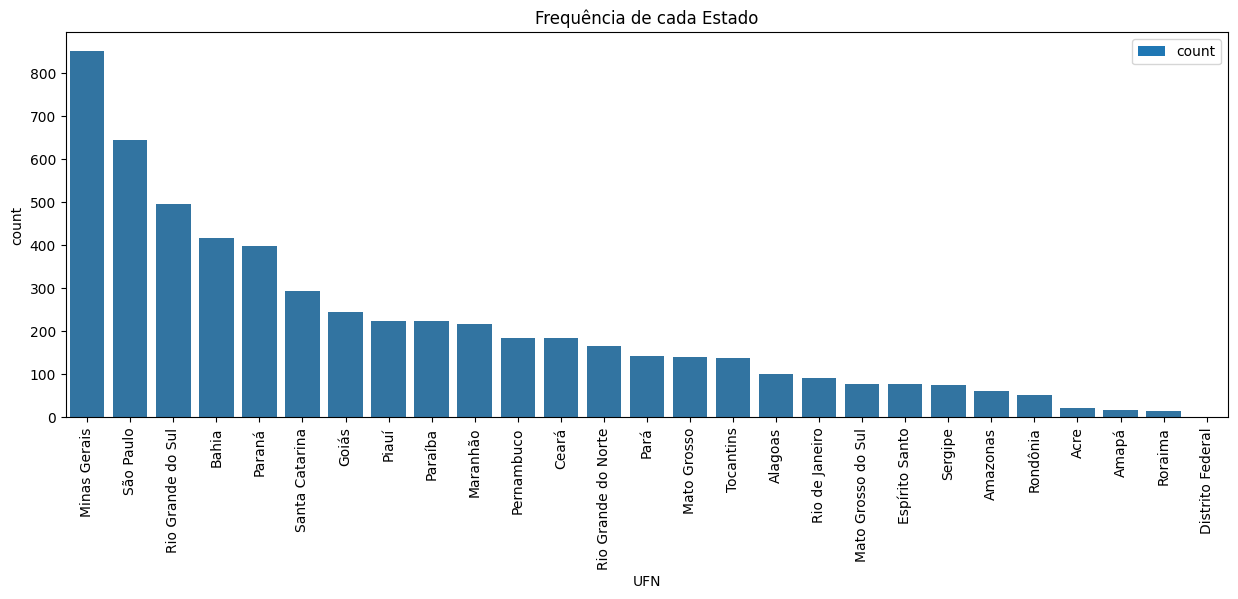

In [24]:
plt.figure(figsize=(15,5))
df['UFN'].value_counts().plot(kind='bar')
sns.barplot(x=df['UFN'].unique(), y=df['UFN'].value_counts())
plt.xticks(rotation = 90)
plt.title('Frequência de cada Estado')
plt.show()

A partir do gráfico vemos que Minas Gerais é o estado brasileiro com maior número de municípios no Brasil e São Paulo é o segundo estado com maior número de municípios no território brasileiro.

Faremos a seguir uma análise exploratória descritiva da variável target POB. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes. Também faremos visualizações de PMPOB, feature da qual POB foi originada.

Geramos um gráfico de barras da média da variável PMPOB por estado.

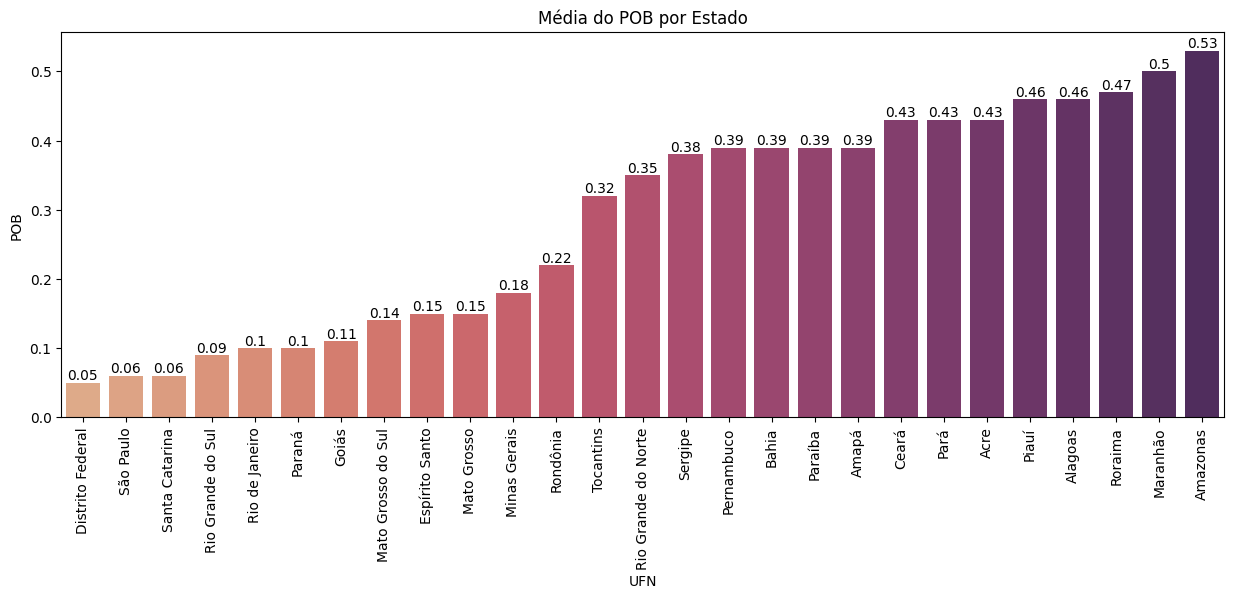

In [25]:
plt.figure(figsize=(15,5))
pob_per_state = df.groupby('UFN')['POB'].mean().reset_index().sort_values('POB')
pob_per_state['POB'] = round(pob_per_state['POB'],2)
ax = sns.barplot(x='UFN',y='POB', data = pob_per_state, palette = "flare", hue = 'UFN')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90)
plt.title('Média do POB por Estado')
plt.show()

Podemos observar que o estado do Amazonas se destaca como sendo o com maior proporção de pobres do país, e o Distrito Federal e São Paulo aparecem como as regiões com menor proporção de pobres.

Geramos um gráfico de barras da mediana da variável PMPOB por estado.

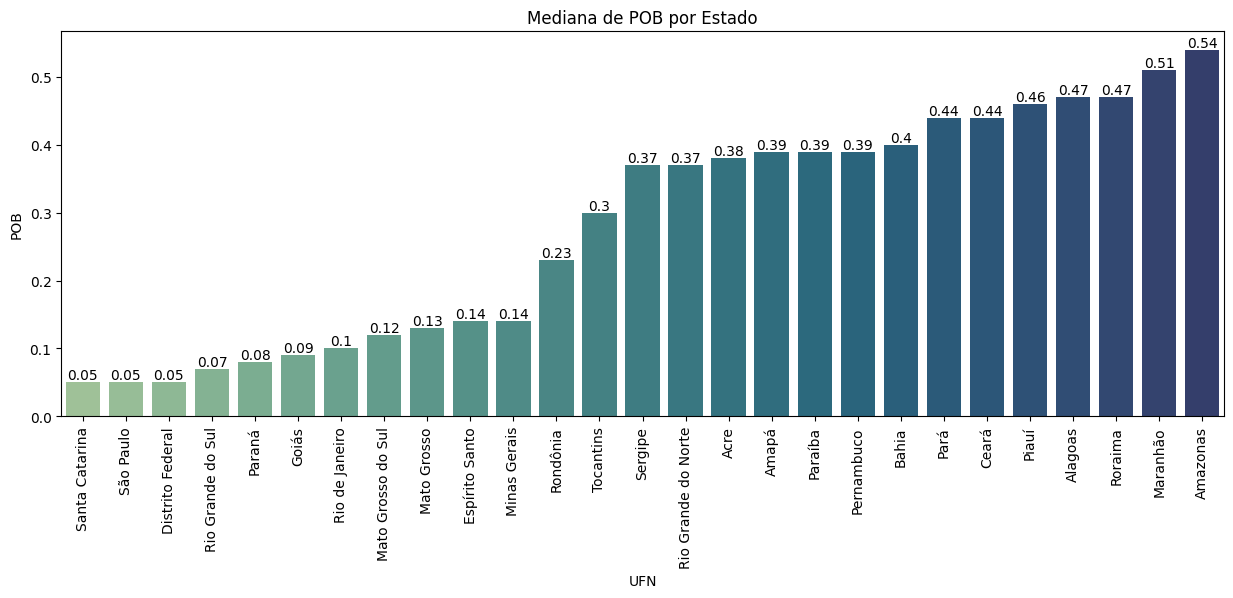

In [26]:
plt.figure(figsize=(15,5))
pob_per_state = df.groupby('UFN')['POB'].median().reset_index().sort_values('POB')
pob_per_state['POB'] = round(pob_per_state['POB'],2)
ax = sns.barplot(x='UFN',y='POB', data = pob_per_state, palette = "crest", hue = 'UFN')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90)
plt.title('Mediana de POB por Estado')
plt.show()

De forma análoga, vemos que os estados com maiores POB pertecem à região Norte e Nordeste do Brasil, e os com menores POB estão na região Centro-sul.

Geramos boxplots das variáveis PMPOB e POB por município.

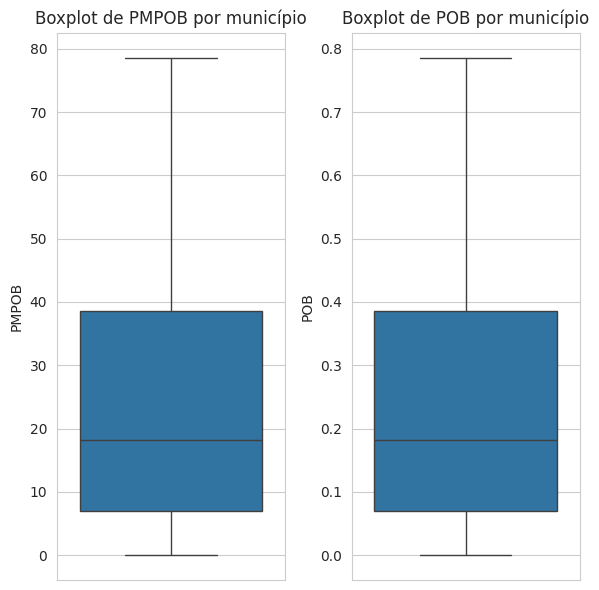

In [27]:
# Definir o estilo do Seaborn
sns.set_style("whitegrid")

# Criar a figura e os subplots
plt.figure(figsize=(6, 6))

# Primeiro subplot - Boxplot de PMPOB
plt.subplot(1, 2, 1)
sns.boxplot(y='PMPOB', data=df)
plt.title('Boxplot de PMPOB por município')

# Segundo subplot - Boxplot de POB
plt.subplot(1, 2, 2)
sns.boxplot(y='POB', data=df)
plt.title('Boxplot de POB por município')

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()


O boxplot nos da uma ideia da distribuição da variável. Podemos ver os limites superior e inferior, aproximadamente entre 0 e 0.8, o primeiro quartil abaixo de 0.1 e o terceiro quartil abaixo de 0.4, e por fim, podemos ver o segundo quartil (mediana) abaixo de 0.2.

Podemos ver também que a distribuição não é simétrica e apresenta caudas pesadas à direita.

Geramos um histograma da variável POB.

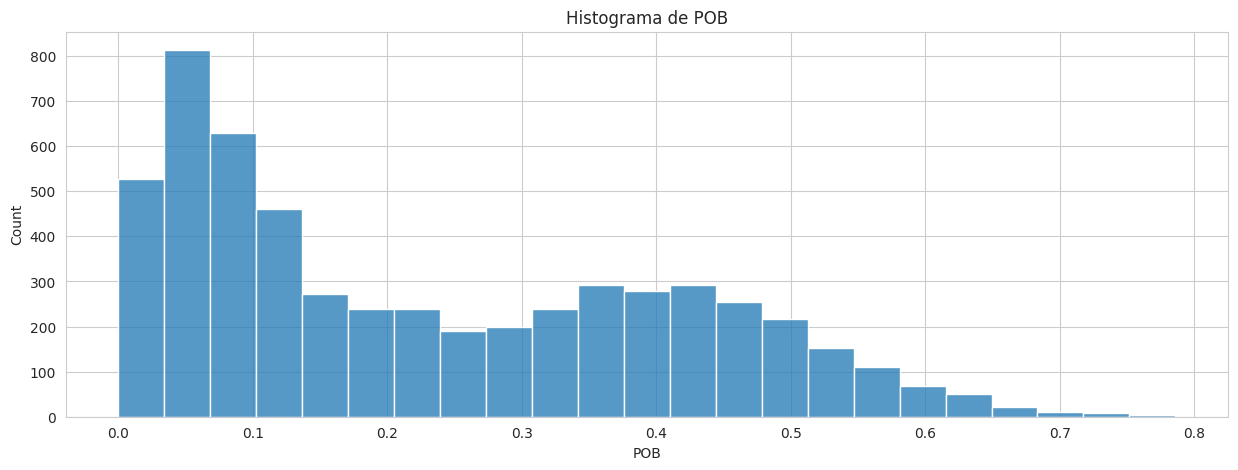

In [28]:
plt.figure(figsize=(15,5))
sns.histplot(df['POB'])
plt.title('Histograma de POB')
plt.show()

O histograma nos da uma ideia da distribuição da variável POB, aparentemente bimodal.

Calculamos algumas estatísticas para as variáveis PMPOB e POB.

In [29]:
print(f"Mediana de PMPOB: {np.median(df['PMPOB'])}")
print(f"Média de PMPOB: {round(np.mean(df['PMPOB']),2)}")
print(f"Moda de PMPOB: {stats.mode(df['PMPOB'])[0]}")

Mediana de PMPOB: 18.14
Média de PMPOB: 23.21
Moda de PMPOB: 3.34


In [30]:
print(f"Mediana de POB: {np.median(df['POB'])}")
print(f"Média de POB: {round(np.mean(df['POB']),2)}")
print(f"Moda de POB: {stats.mode(df['POB'])[0]}")

Mediana de POB: 0.1814
Média de POB: 0.23
Moda de POB: 0.0334


In [31]:
df['POB'].describe()

count    5565.000000
mean        0.232066
std         0.179157
min         0.000000
25%         0.070300
50%         0.181400
75%         0.385200
max         0.785900
Name: POB, dtype: float64

Veja que a maior frequência de valores de PMPOB é no intervalo de 0 a 10, e consequentemente de POB é de 0 a 0.1.

Geramos um barplot para localizar os 20 municípios com maiores proporções de pobres por município.

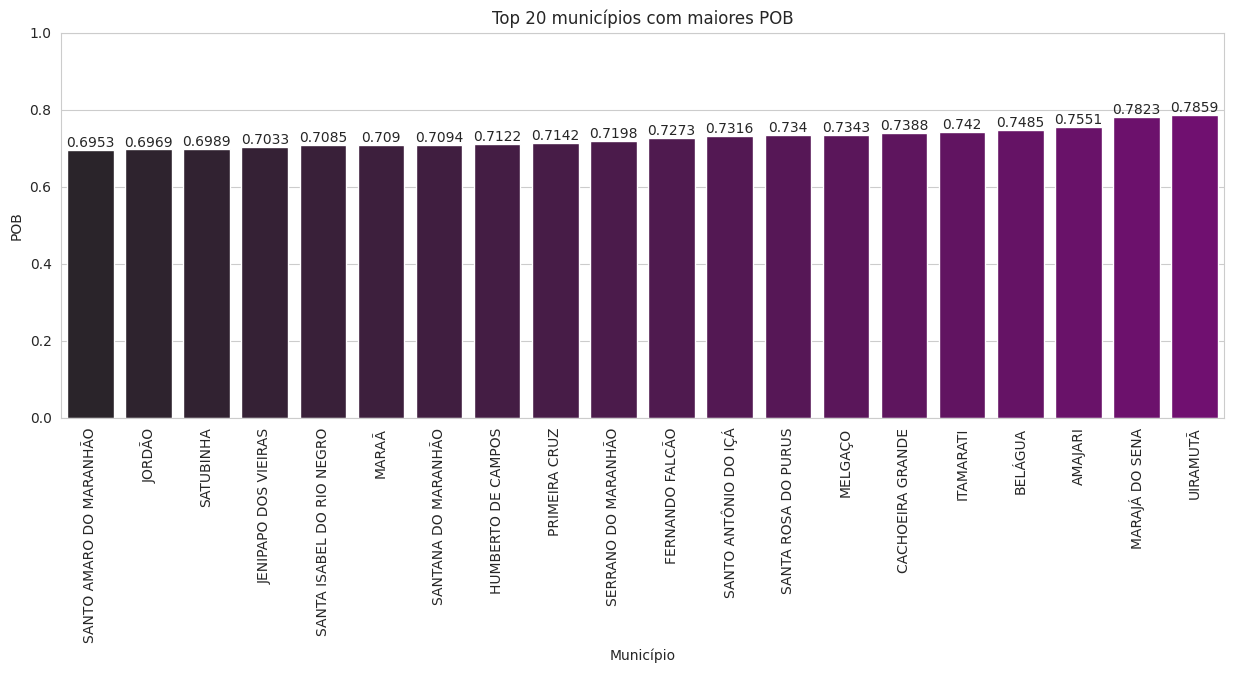

In [32]:
plt.figure(figsize=(15,5))
pob_per_city = df[['POB','Município']].reset_index().sort_values(by='POB', ascending=False).head(20) # Ordenamos a variável POB de forma decrescente
pob_per_city = pob_per_city.sort_values(by='POB', ascending=True)
ax = sns.barplot(x='Município', y='POB', data = pob_per_city, palette='dark:purple', hue ='Município' )
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90)
ax.set_ylim(0, 1)
plt.title('Top 20 municípios com maiores POB')
plt.show()

Dois dos cinco municípios com maior POB estão no estado do Maranhão (Marajá do Sena e Belágua), outros dois dos cinco estão no estado de Roraima (Uiramutã e Amajari). O quinto maior POB corresponde à cidade de Itamarati, localizada no estado do Amazonas.

Em seguida geramos um barplot com os 20 municípios com menores proporções de pobres por município.

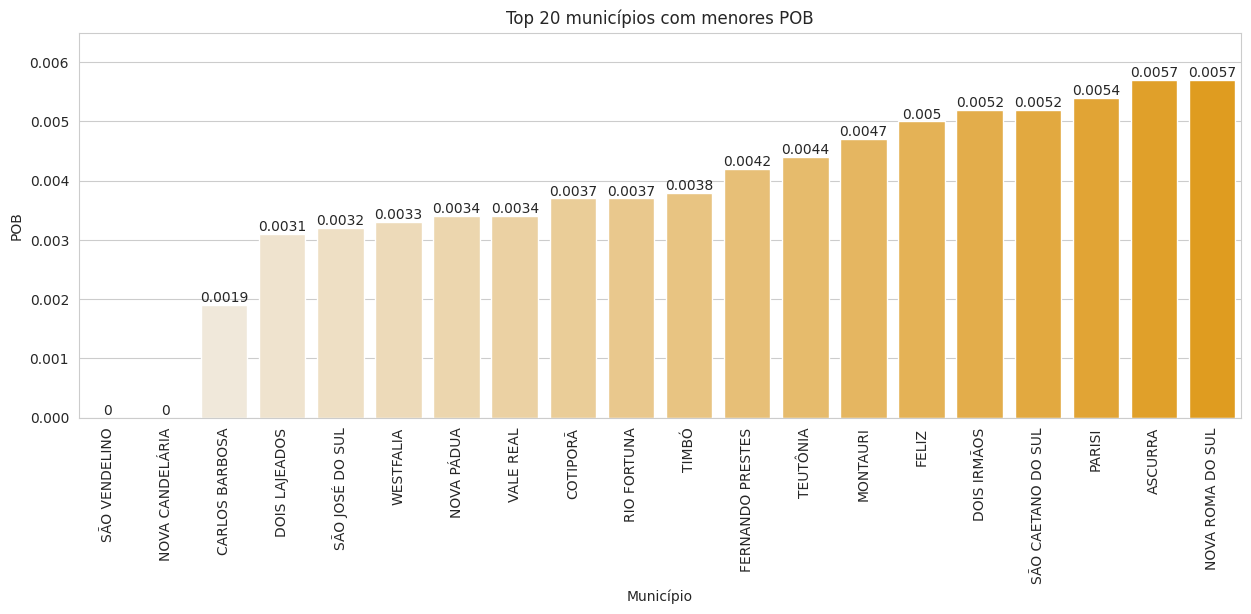

In [33]:
plt.figure(figsize=(15,5))
pob_per_city = df[['POB','Município']].reset_index().sort_values(by='POB', ascending=True).head(20) # Ordenamos a variável POB de forma crescente
ax = sns.barplot(x='Município', y='POB', data = pob_per_city, palette='light:orange', hue ='Município' )
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90)
ax.set_ylim(0, 0.0065)
plt.title('Top 20 municípios com menores POB')
plt.show()

São  Vendelino - RS e Nova Candelária - RS possuem POB igual a zero, o que pode ser um ponto de atenção, pois deve-se investigar se representa um erro. De qualquer forma, ambas as cidades são extremamente pequenas (cerca de 2500 habitantes) e em um dos estados com menor PMPOB e POB, logo a métrica possivelmente é realmente extremamente baixa.

A seguir, mostramos estatísticas das variáveis de IDH.

In [34]:
df[['IDHM','IDHM_E', 'IDHM_L', 'IDHM_R']].describe()

IDHM       IDHM_E       IDHM_L       IDHM_R
count  5565.000000  5565.000000  5565.000000  5565.000000
mean      0.659157     0.559094     0.801564     0.642873
std       0.071997     0.093328     0.044681     0.080662
min       0.418000     0.207000     0.672000     0.400000
25%       0.599000     0.490000     0.769000     0.572000
50%       0.665000     0.560000     0.808000     0.654000
75%       0.718000     0.631000     0.836000     0.707000
max       0.862000     0.825000     0.894000     0.891000

E abaixo temos os boxplots das features relacionadas à IDHM.

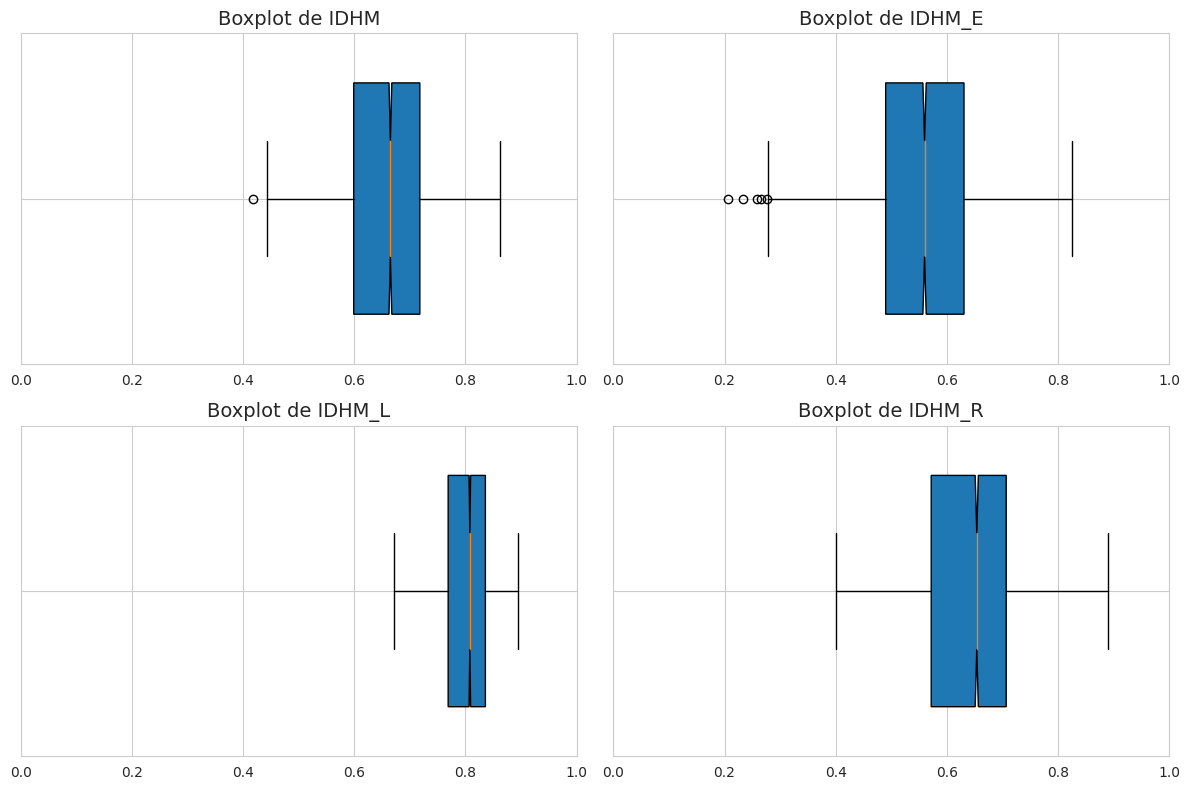

In [35]:
# Definindo a figura e os subplots com 2 linhas e 2 colunas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Lista de colunas e títulos
colunas = ['IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']
titulos = ['IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']

# Iterando sobre as colunas e subplots
for i, (coluna, titulo) in enumerate(zip(colunas, titulos)):
    # Calculando o índice do subplot
    linha = i // 2
    coluna_subplot = i % 2

    # Criando o boxplot no subplot correspondente
    axs[linha, coluna_subplot].boxplot(df[coluna], patch_artist=True, notch=True, vert=False, widths=0.7)
    axs[linha, coluna_subplot].set_title(f'Boxplot de {titulo}', fontsize=14)
    axs[linha, coluna_subplot].set_xlim([0, 1])  # Limitando o eixo x entre 0 e 1
    axs[linha, coluna_subplot].set_yticklabels([])  # Removendo os rótulos do eixo y

# Ajustando layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

Para facilitar, abaixo apresentamos um "dicionário" relacionado ao significado de cada IDHM:

**IDHM** - Índice de Desenvolvimento Humano Municipal. Média geométrica dos índices das dimensões Renda, Educação e Longevidade, com pesos iguais.

**IDHM_E** - Índice sintético da dimensão Educação que é um dos 3 componentes do IDHM. É obtido através da média geométrica do subíndice de frequência de crianças e jovens à escola, com peso de 2/3, e do subíndice de escolaridade da população adulta, com peso de 1/3.

**IDHM_L** - Índice da dimensão Longevidade que é um dos 3 componentes do IDHM. É obtido a partir do indicador Esperança de vida ao nascer, através da fórmula: [(valor observado do indicador) - (valor mínimo)] / [(valor máximo) - (valor mínimo)], onde os valores mínimo e máximo são 25 e 85 anos, respectivamente.

**IDHM_R** - Índice da dimensão Renda que é um dos 3 componentes do IDHM. É obtido a partir do indicador Renda per capita, através da fórmula: [ln (valor observado do indicador) - ln (valor mínimo)] / [ln (valor máximo) - ln (valor mínimo)], onde os valores mínimo e máximo são  8,00 BRL e  4.033,00 BRL (a preços de agosto de 2010).


Veja como em um contexto a nível nacional, o índice de longevidade IDHM_L possui valores mais altos do que se comparado aos demais índices.

O IDHM_E é o que possui maior range de valores à nível nacional. Iremos comparar este IDHM_E entre municípios com grandes valores de POB e baixos valores de POB.

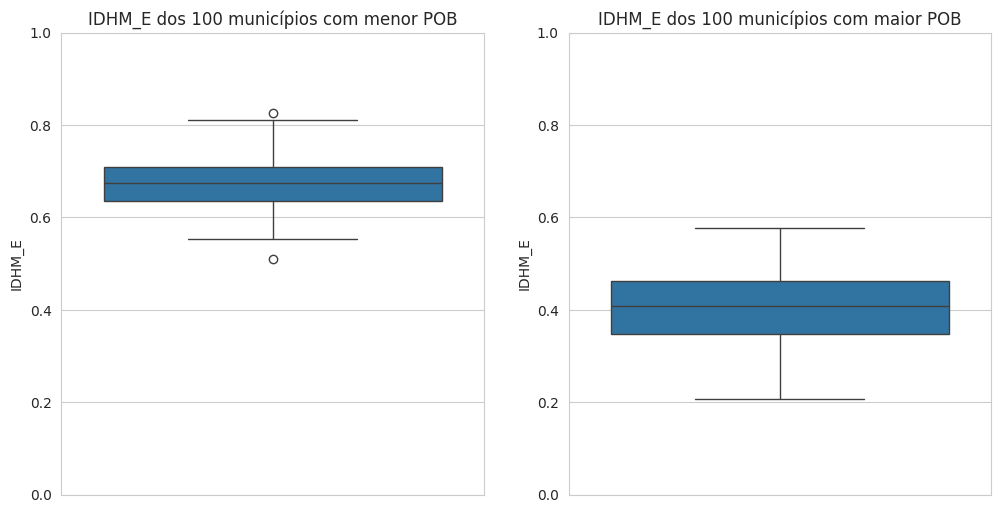

In [36]:
# Definindo os dados para os 100 municípios com menor e maior POB
pob_per_city_low = df[['POB', 'Município', 'IDHM_E']].sort_values(by='POB').head(100)
pob_per_city_high = df[['POB', 'Município', 'IDHM_E']].sort_values(by='POB', ascending=False).head(100)

# Definindo o estilo do Seaborn
sns.set_style("whitegrid")

# Criando a figura e os subplots
plt.figure(figsize=(12, 6))

# Primeiro subplot - Boxplot dos 100 municípios com menor POB
plt.subplot(1, 2, 1)
sns.boxplot(y='IDHM_E', data=pob_per_city_low)
plt.ylim([0, 1])
plt.title('IDHM_E dos 100 municípios com menor POB')

# Segundo subplot - Boxplot dos 100 municípios com maior POB
plt.subplot(1, 2, 2)
sns.boxplot(y='IDHM_E', data=pob_per_city_high)
plt.ylim([0, 1])
plt.title('IDHM_E dos 100 municípios com maior POB')

# Exibindo os gráficos
plt.show()

Podemos observar que dentre os 100 municípios com menor proporção de pobres, temos que a frequência de crianças e jovens à escola e o índice de escolaridade da população adulta é maior do que dentre os 100 municípios com maior proporção de pobres.

A seguir, iremos comparar o IDHM entre municípios com grandes valores de POB e baixos valores de POB.

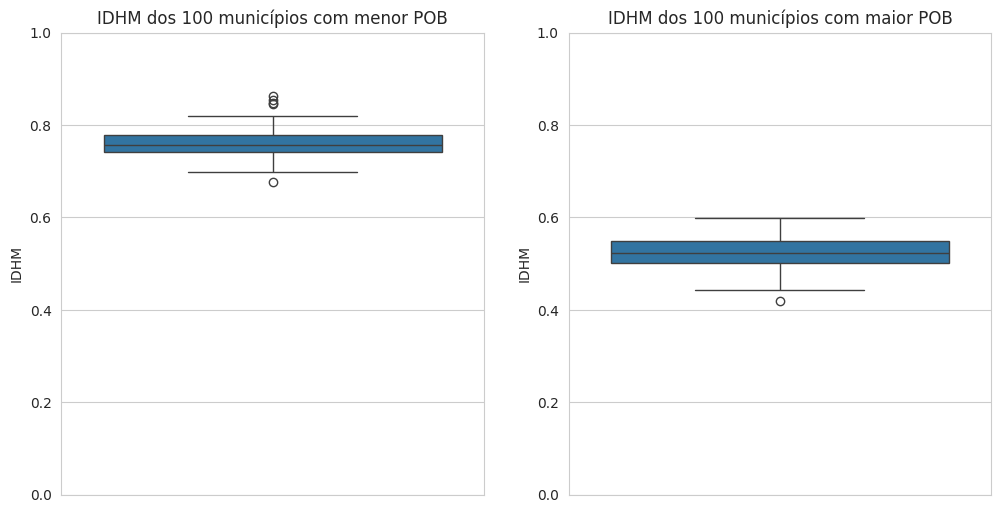

In [37]:
# Definindo os dados para os 100 municípios com menor e maior POB
pob_per_city_low = df[['POB', 'Município', 'IDHM']].sort_values(by='POB').head(100)
pob_per_city_high = df[['POB', 'Município', 'IDHM']].sort_values(by='POB', ascending=False).head(100)

# Definindo o estilo do Seaborn
sns.set_style("whitegrid")

# Criando a figura e os subplots
plt.figure(figsize=(12, 6))

# Primeiro subplot - Boxplot dos 100 municípios com menor POB
plt.subplot(1, 2, 1)
sns.boxplot(y='IDHM', data=pob_per_city_low)
plt.ylim([0, 1])
plt.title('IDHM dos 100 municípios com menor POB')

# Segundo subplot - Boxplot dos 100 municípios com maior POB
plt.subplot(1, 2, 2)
sns.boxplot(y='IDHM', data=pob_per_city_high)
plt.ylim([0, 1])
plt.title('IDHM dos 100 municípios com maior POB')

# Exibindo os gráficos
plt.show()

Podemos observar que que municípios com menor concentração de pobres apresentam maior Renda, Educação e Longevidade, e o inverso ocorre nos municípios com maior concentração de pobres.

A seguir, iremos comparar o IDHM_R entre municípios com grandes valores de POB e baixos valores de POB.


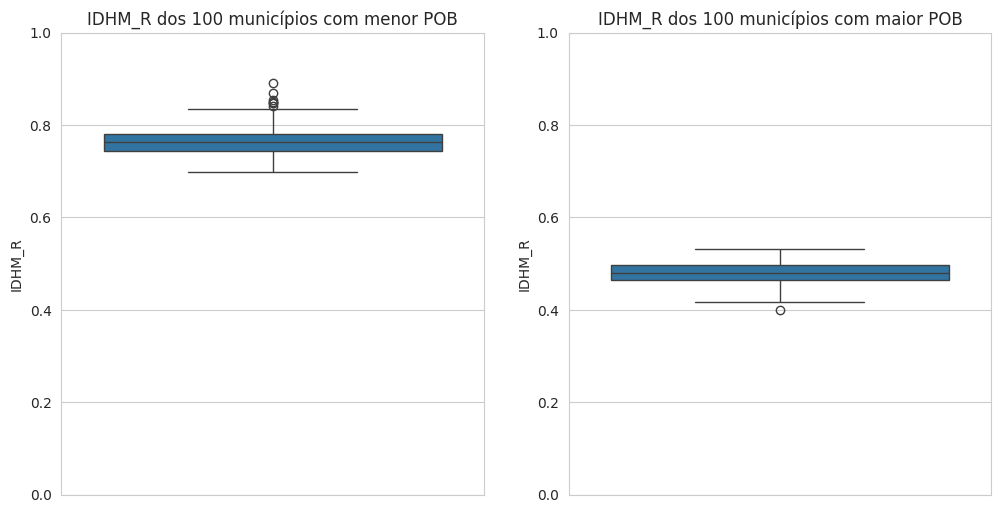

In [38]:
# Definindo os dados para os 100 municípios com menor e maior POB
pob_per_city_low = df[['POB', 'Município', 'IDHM_R']].sort_values(by='POB').head(100)
pob_per_city_high = df[['POB', 'Município', 'IDHM_R']].sort_values(by='POB', ascending=False).head(100)

# Definindo o estilo do Seaborn
sns.set_style("whitegrid")

# Criando a figura e os subplots
plt.figure(figsize=(12, 6))

# Primeiro subplot - Boxplot dos 100 municípios com menor POB
plt.subplot(1, 2, 1)
sns.boxplot(y='IDHM_R', data=pob_per_city_low)
plt.ylim([0, 1])
plt.title('IDHM_R dos 100 municípios com menor POB')

# Segundo subplot - Boxplot dos 100 municípios com maior POB
plt.subplot(1, 2, 2)
sns.boxplot(y='IDHM_R', data=pob_per_city_high)
plt.ylim([0, 1])
plt.title('IDHM_R dos 100 municípios com maior POB')

# Exibindo os gráficos
plt.show()

Podemos observar que que municípios com menor concentração de pobres apresentam maior renda, e o inverso ocorre nos municípios com maior concentração de pobres.

A seguir, iremos comparar o IDHM_L entre municípios com grandes valores de POB e baixos valores de POB.

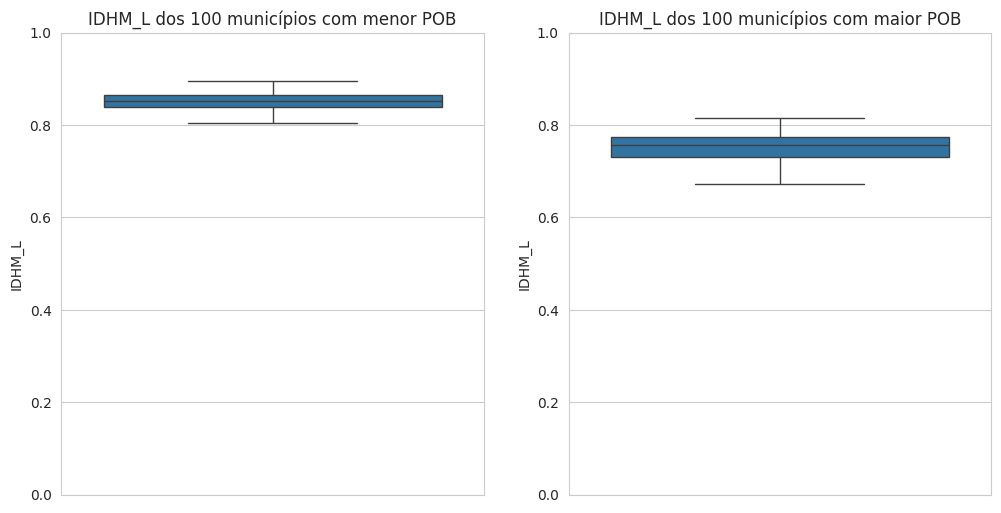

In [39]:
# Definindo os dados para os 100 municípios com menor e maior POB
pob_per_city_low = df[['POB', 'Município', 'IDHM_L']].sort_values(by='POB').head(100)
pob_per_city_high = df[['POB', 'Município', 'IDHM_L']].sort_values(by='POB', ascending=False).head(100)

# Definindo o estilo do Seaborn
sns.set_style("whitegrid")

# Criando a figura e os subplots
plt.figure(figsize=(12, 6))

# Primeiro subplot - Boxplot dos 100 municípios com menor POB
plt.subplot(1, 2, 1)
sns.boxplot(y='IDHM_L', data=pob_per_city_low)
plt.ylim([0, 1])
plt.title('IDHM_L dos 100 municípios com menor POB')

# Segundo subplot - Boxplot dos 100 municípios com maior POB
plt.subplot(1, 2, 2)
sns.boxplot(y='IDHM_L', data=pob_per_city_high)
plt.ylim([0, 1])
plt.title('IDHM_L dos 100 municípios com maior POB')

# Exibindo os gráficos
plt.show()

Podemos observar que que municípios com menor concentração de pobres apresentam maior índice de Longevidade, e o inverso ocorre nos municípios com maior concentração de pobres.

A seguir, representaremos a variável de interesse POB em um mapa do Brasil, para ter uma visualização da proporção de pessoas em situação de pobreza (POB) por município e, consequentemente, ter uma visualização por região.

Para a construção do mapa utilizamos a biblioteca GeoPandas do Python. GeoPandas é um projeto de código aberto para facilitar o trabalho com dados geoespaciais em python. GeoPandas estende os tipos de dados usados pelos pandas para permitir operações espaciais em tipos geométricos. As operações geométricas são realizadas por formas. Geopandas depende ainda de fiona para acesso a arquivos e matplotlib para plotagem. [4]

Fiona, utilizada pelo GeoPandas, transmite dados de recursos simples de e para formatos GIS como GeoPackage e Shapefile. Os recursos simples são semelhantes a registros ou linhas e possuem um único atributo de geometria. [5]



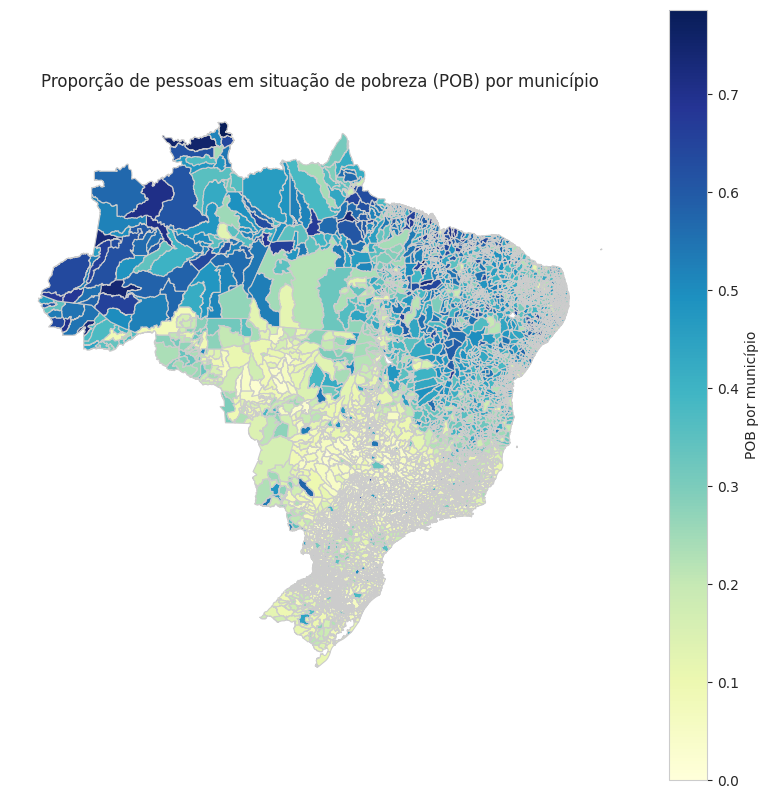

In [40]:
# Deixamos todos os municípios escritos com letras minúsculas para fazer um merge com o data frame com os limites de cada município
df['Município'] = df['Município'].str.lower()

# Carregar o arquivo GeoJSON com os limites dos municípios
mapa_municipios = gpd.read_file('geojs-100-mun.json')
mapa_municipios['name'] = mapa_municipios['name'].str.lower()

# Mesclar o DataFrame do mapa dos municípios com o DataFrame original (df) pelo código do município
mapa_com_dados = mapa_municipios.merge(df, left_on='name', right_on='Município')

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mapa_com_dados.plot(column='POB', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Adicionar título
plt.title('Proporção de pessoas em situação de pobreza (POB) por município')

# Adicionar legenda
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('POB por município')

# Remover os eixos
ax.axis('off')

# Exibir o mapa
plt.show()

O mapa deixa claro que as regiões norte e nordeste do Brasil concentram a maior proporção de pobres por município.

### 5.1.2. Análise da proporção de pobres (POB) por região.

Criamos uma nova coluna chamada "Região" no DataFrame df, onde cada entrada corresponderá à região do Brasil correspondente ao estado na coluna "UFN".

In [41]:
df["UFN"].unique()

array(['São Paulo', 'Santa Catarina', 'Espírito Santo', 'Rio de Janeiro',
       'Distrito Federal', 'Paraná', 'Minas Gerais', 'Rio Grande do Sul',
       'Goiás', 'Tocantins', 'Pernambuco', 'Mato Grosso',
       'Mato Grosso do Sul', 'Sergipe', 'Maranhão', 'Rio Grande do Norte',
       'Paraíba', 'Bahia', 'Ceará', 'Roraima', 'Piauí', 'Pará',
       'Amazonas', 'Rondônia', 'Amapá', 'Acre', 'Alagoas'], dtype=object)

In [42]:
# Dicionário para mapear estados para regiões
regiao_por_estado = {
    'São Paulo': 'Sudeste',
    'Santa Catarina': 'Sul',
    'Espírito Santo': 'Sudeste',
    'Rio de Janeiro': 'Sudeste',
    'Distrito Federal': 'Centro-Oeste',
    'Paraná': 'Sul',
    'Minas Gerais': 'Sudeste',
    'Rio Grande do Sul': 'Sul',
    'Goiás': 'Centro-Oeste',
    'Tocantins': 'Norte',
    'Pernambuco': 'Nordeste',
    'Mato Grosso': 'Centro-Oeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Sergipe': 'Nordeste',
    'Maranhão': 'Nordeste',
    'Rio Grande do Norte': 'Nordeste',
    'Paraíba': 'Nordeste',
    'Bahia': 'Nordeste',
    'Ceará': 'Nordeste',
    'Roraima': 'Norte',
    'Piauí': 'Nordeste',
    'Pará': 'Norte',
    'Amazonas': 'Norte',
    'Rondônia': 'Norte',
    'Amapá': 'Norte',
    'Acre': 'Norte',
    'Alagoas': 'Nordeste'
}

# Adicionando a coluna "Região" com base no mapeamento de estados
df_regiao = df.copy()
df_regiao['Região'] = df_regiao['UFN'].map(regiao_por_estado)
df_regiao

ANO  UF             UFN  Codmun6  Codmun7           Município  ESPVIDA  \
0     2010  35       São Paulo   354880  3548807  são caetano do sul    78.20   
1     2010  35       São Paulo   350060  3500600  águas de são pedro    78.37   
2     2010  42  Santa Catarina   420540  4205407       florianópolis    77.35   
3     2010  32  Espírito Santo   320530  3205309             vitória    76.28   
4     2010  42  Santa Catarina   420200  4202008  balneário camboriú    78.62   
...    ...  ..             ...      ...      ...                 ...      ...   
5560  2010  15            Pará   150250  1502509              chaves    71.15   
5561  2010  21        Maranhão   210635  2106359      marajá do sena    71.44   
5562  2010  13        Amazonas   130020  1300201    atalaia do norte    68.95   
5563  2010  21        Maranhão   210408  2104081     fernando falcão    68.67   
5564  2010  15            Pará   150450  1504505             melgaço    71.57   

      FECTOT  MORT1  MORT5  ...     POP    POPT  I_ESCOLARIDADE  I_FREQ_PROP  \
0       1.30   9.50  11.02  ...  148195  148195           0.762        0.836   
1       1.32   9.30  10.79  ...    2680    2680           0.751        0.864   
2       1.23  10.81  12.14  ...  417579  417546           0.800        0.800   
3       1.38  11.37  13.34  ...  325399  325368           0.789        0.813   
4       1.31   8.70  10.25  ...  107149  107149           0.763        0.803   
...      ...    ...    ...  ...     ...     ...             ...          ...   
5560    2.53  23.50  25.33  ...   20968   16706           0.120        0.327   
5561    4.10  25.00  27.22  ...    8048    6872           0.154        0.417   
5562    3.62  28.60  30.62  ...   15078   11093           0.229        0.275   
5563    3.32  33.80  36.79  ...    9241    8812           0.158        0.384   
5564    3.87  22.40  24.10  ...   24726   23435           0.123        0.268   

       IDHM  IDHM_E  IDHM_L  IDHM_R     POB    Região  
0     0.862   0.811   0.887   0.891  0.0052   Sudeste  
1     0.854   0.825   0.890   0.849  0.0080   Sudeste  
2     0.847   0.800   0.873   0.870  0.0135       Sul  
3     0.845   0.805   0.855   0.876  0.0351   Sudeste  
4     0.845   0.789   0.894   0.854  0.0095       Sul  
...     ...     ...     ...     ...     ...       ...  
5560  0.453   0.234   0.769   0.516  0.6304     Norte  
5561  0.452   0.299   0.774   0.400  0.7823  Nordeste  
5562  0.450   0.259   0.733   0.481  0.6367     Norte  
5563  0.443   0.286   0.728   0.417  0.7273  Nordeste  
5564  0.418   0.207   0.776   0.454  0.7343     Norte  

[5565 rows x 240 columns]

Com a nova coluna "Região" podemos fazer algumas visualizações.

Começamos por um gráfico de barras.

<ipython-input-43-1bb0108fe74c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Região', y='POB', data=df_regiao, palette='viridis')


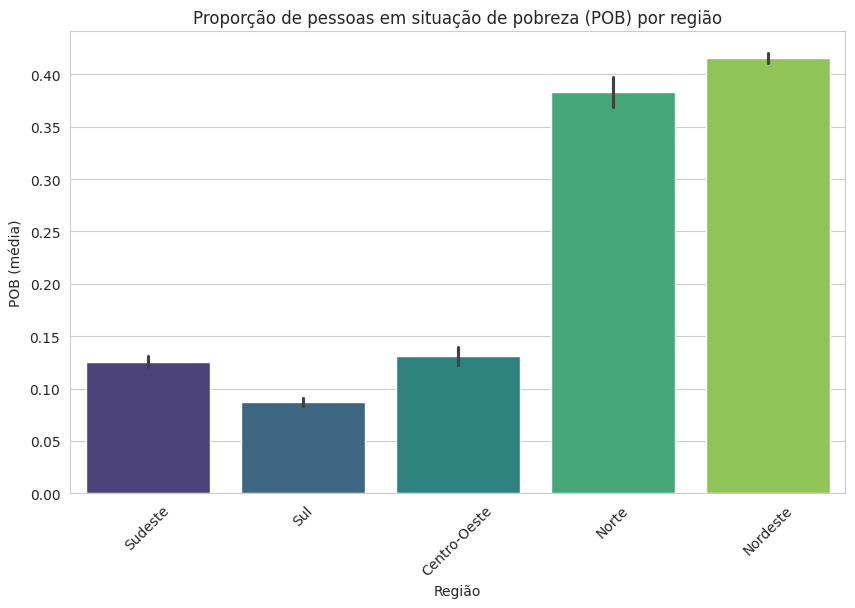

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Região', y='POB', data=df_regiao, palette='viridis')
plt.title('Proporção de pessoas em situação de pobreza (POB) por região')
plt.xlabel('Região')
plt.ylabel('POB (média)')
plt.xticks(rotation=45)
plt.show()

O gráfico deixa claro que a região Nordeste concentra a maior média relacionada à proporção de pobres, seguida pela região Norte do país, enquanto que a região Sul concentra a menor média de proporção de pobres.

Seguimos com o gráfico de violino.

<ipython-input-44-1f800c1cccb2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Região', y='POB', data=df_regiao, palette='viridis', inner='quartile')


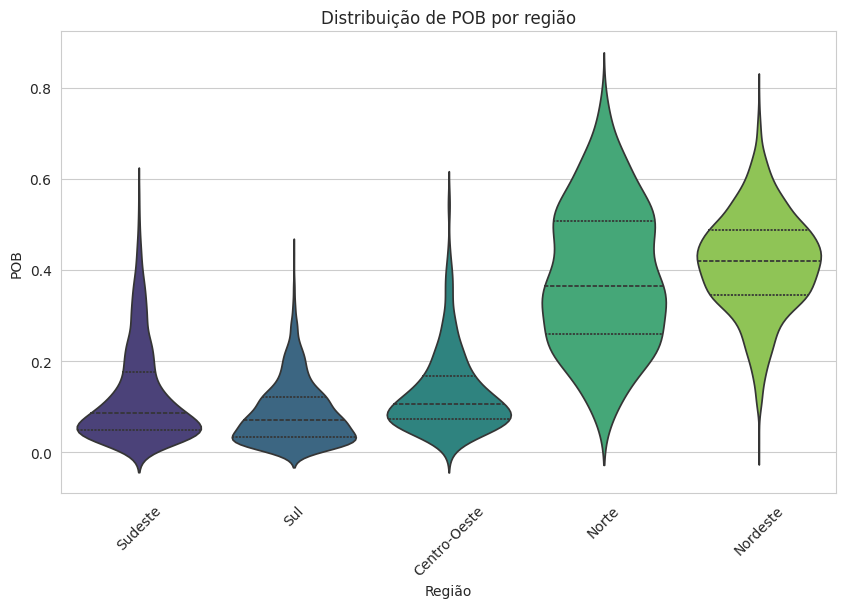

In [44]:
# Violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Região', y='POB', data=df_regiao, palette='viridis', inner='quartile')
plt.title('Distribuição de POB por região')
plt.xlabel('Região')
plt.ylabel('POB')
plt.xticks(rotation=45)
plt.show()

A forma do "violino" representa a distribuição dos dados. Quanto mais largo o violino em uma determinada região, maior é a frequência dos valores da variável 'POB' nessa região. Se o violino for estreito em uma região, significa que os valores estão mais concentrados em uma faixa estreita.

Novamente, constatamos que Nordeste e Norte apresentam maior proporção de pobres, sendo que o Nordeste apresenta a mediana mais alta. E a região Sul, com a menor mediana dentre as regiões, apresenta a menor proporção de pobres.

Em seguida plotamos os boxplots.

<ipython-input-45-e353d951a0ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Região', y='POB', data=df_regiao, palette='viridis')


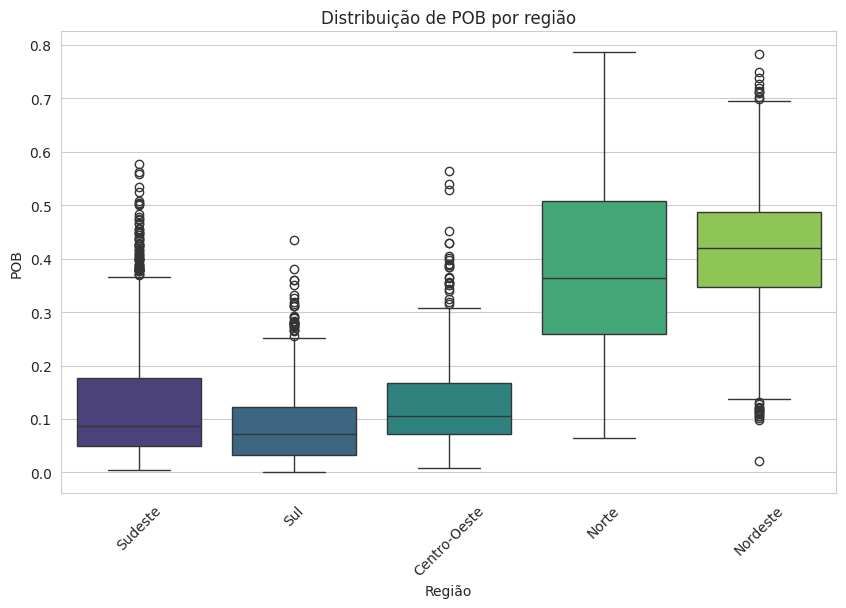

In [45]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Região', y='POB', data=df_regiao, palette='viridis')
plt.title('Distribuição de POB por região')
plt.xlabel('Região')
plt.ylabel('POB')
plt.xticks(rotation=45)
plt.show()

Os boxplots nos dão um bom indicativo dos outliers presentes em cada região. Podemos ver uma quantidade significativa de outliers nas regiões Sudeste e Sul, e nenhum outlier na região Norte, indicando que nas regiões Sul e Sudeste o aumento na proporção de pobres em relação às hastes que se estendem para fora da caixa representando o valor máximo dos dados dentro de 1,5 vezes o IQR, são raros, enquanto que a falta de outliers na região Norte mostra que altos valores da proporção de pobres é a situação normal para esta região.

Podemos notar também que o Nordeste é a única região que apresenta outliers além do valor mínimo dos dados, indicando que é raro, mas existem municípios onde a proporção de pobres é menor nesta região.

Em seguida calculamos a mediana da proporção de pobres (POB) por região e plotamos os resultados em um mapa.

In [46]:
# Calculando a mediana da proporção de pobres por região
populacao_por_regiao = df_regiao.groupby('Região')['POB'].median().reindex(['Sudeste', 'Sul', 'Centro-Oeste', 'Norte', 'Nordeste']).tolist()
print(populacao_por_regiao)

[0.08615, 0.07100000000000001, 0.10605, 0.3644, 0.41950000000000004]


<ipython-input-47-7c3760fce6ba>:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  brasil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


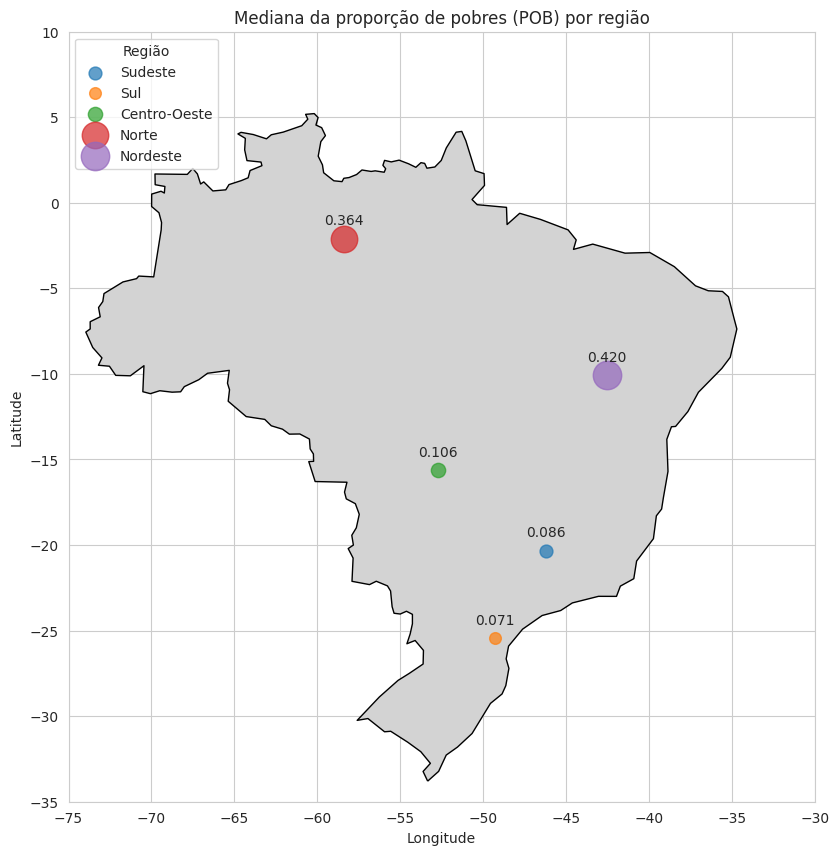

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Dados populacionais
dados_populacionais = {
    'Região': ['Sudeste', 'Sul', 'Centro-Oeste', 'Norte', 'Nordeste'],
    'POB': [0.08615, 0.07100000000000001, 0.10605, 0.3644, 0.41950000000000004],
    'Latitude': [-20.3332, -25.4342, -15.6280, -2.0953, -10.0626],
    'Longitude': [-46.2092, -49.2663, -52.7226, -58.3717, -42.5510]
}

# Criando DataFrame
df_populacao = pd.DataFrame(dados_populacionais)

# Carregando o mapa do Brasil
brasil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrando apenas os dados do Brasil
brasil = brasil[brasil.name == "Brazil"]

# Plotando o mapa do Brasil
fig, ax = plt.subplots(figsize=(10, 10))
brasil.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotando os pontos de população por região
for idx, row in df_populacao.iterrows():
    ax.scatter(row['Longitude'], row['Latitude'], s=row['POB'] * 1000, alpha=0.7, label=row['Região'])
    ax.annotate(f'{row["POB"]:.3f}', (row['Longitude'], row['Latitude']), textcoords="offset points", xytext=(0,10), ha='center')

# Adicionando legenda e título
ax.legend(title='Região', loc='upper left')
plt.title('Mediana da proporção de pobres (POB) por região')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Ajustando os limites do mapa para focar apenas no Brasil
ax.set_xlim([-75, -30])
ax.set_ylim([-35, 10])

# Exibindo o mapa
plt.show()

## 5.2. Seleção De Características

Como nossa base possui 238 covariáveis e uma visualização com todas elas ficaria impraticável, ainda nesta fase vamos fazer uma seleção de covariáveis para análise de suas visualizações e correlações. Nossa ideia é selecionar variáveis que possuam altas e baixas correlações com intuito de prosseguir numa discussão sobre quais variáveis fariam sentido serem selecionadas para o modelo final.

Podemos futuramente aplicar métodos de seleção de variáveis, como por exemplo Random Forest, ou inicialmente realizar apenas uma análise das variáveis mais correlacionadas. Num primeiro momento vamos criar dois conjuntos de covariáveis, escolhidas qualitativamente, para testar suas visualizações/correlações com nossa variável resposta.

In [48]:
var_sel = df[['Município','RDPC','IDHM', 'THEILtrab', 'GINI', 'E_ANOSESTUDO']]
var_sel2 = df[['Município', 'P_COM','pesoRUR','PEA1517','MULHER80']]

### 5.2.1 Correlação e Visualização (Análise de Associação)

Com as variáveis selecionadas no final do exercício anterior vamos gerar algumas visualizações sobre as correlações das covariáveis.

Primeiramente, geramos scatter plots e histogramas.

<Figure size 1500x500 with 0 Axes>

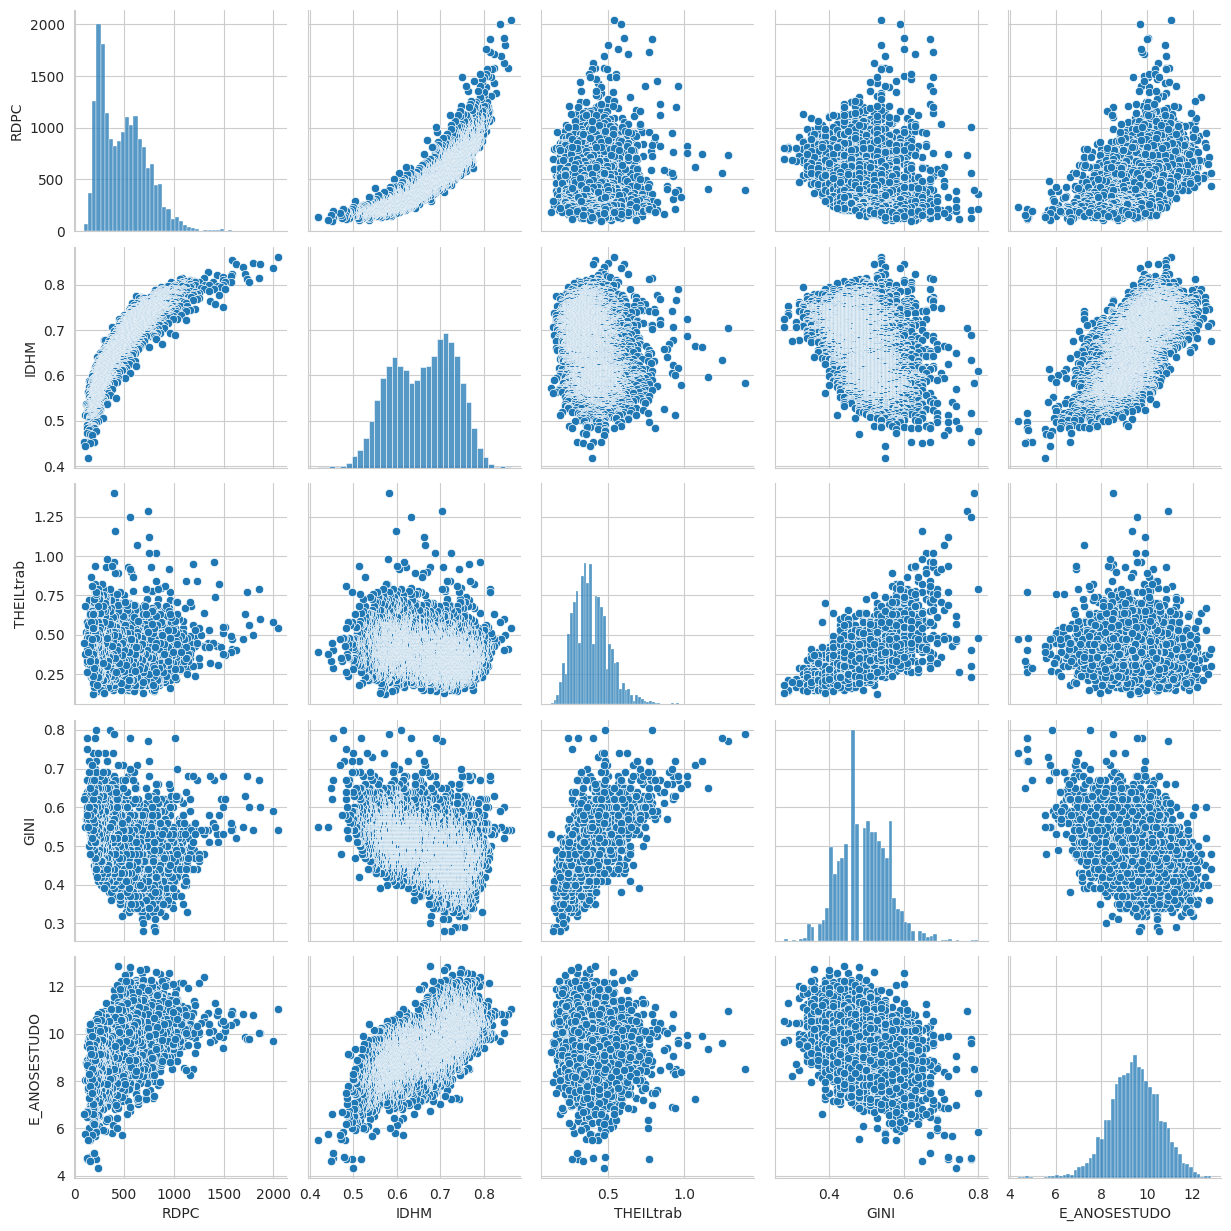

In [49]:
plt.figure(figsize=(15,5))
sns.pairplot(var_sel.iloc[:, 1:]);

Em seguida, geramos um heatmap com as correlações entre as variáveis.

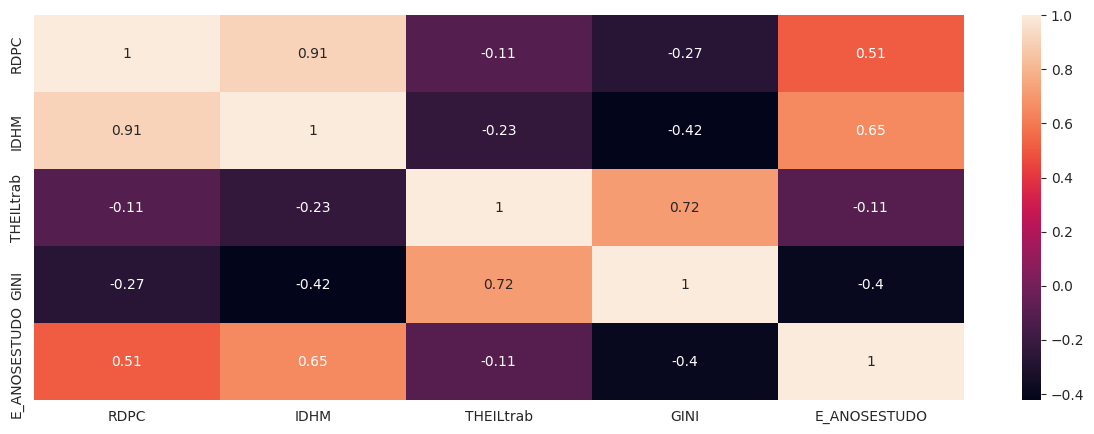

In [50]:
plt.figure(figsize=(15,5))
corr = var_sel.iloc[:, 1:].corr(method='pearson')
sns.heatmap(corr, annot=True);

Como era de se esperar, IDH e RDPC (Renda Média per capita) possuem uma forte correlação negativa com o percentual de pobres enquanto o THEILtrab (desigualdade na distribuição de indivíduos segundo a renda domiciliar per capita) possui uma alta correlação.

Seguimos com as mesmas análises para o segundo grupo de covariáveis:

Primeiramente, geramos um grafíco com scatter plots e histogramas.

<Figure size 1500x500 with 0 Axes>

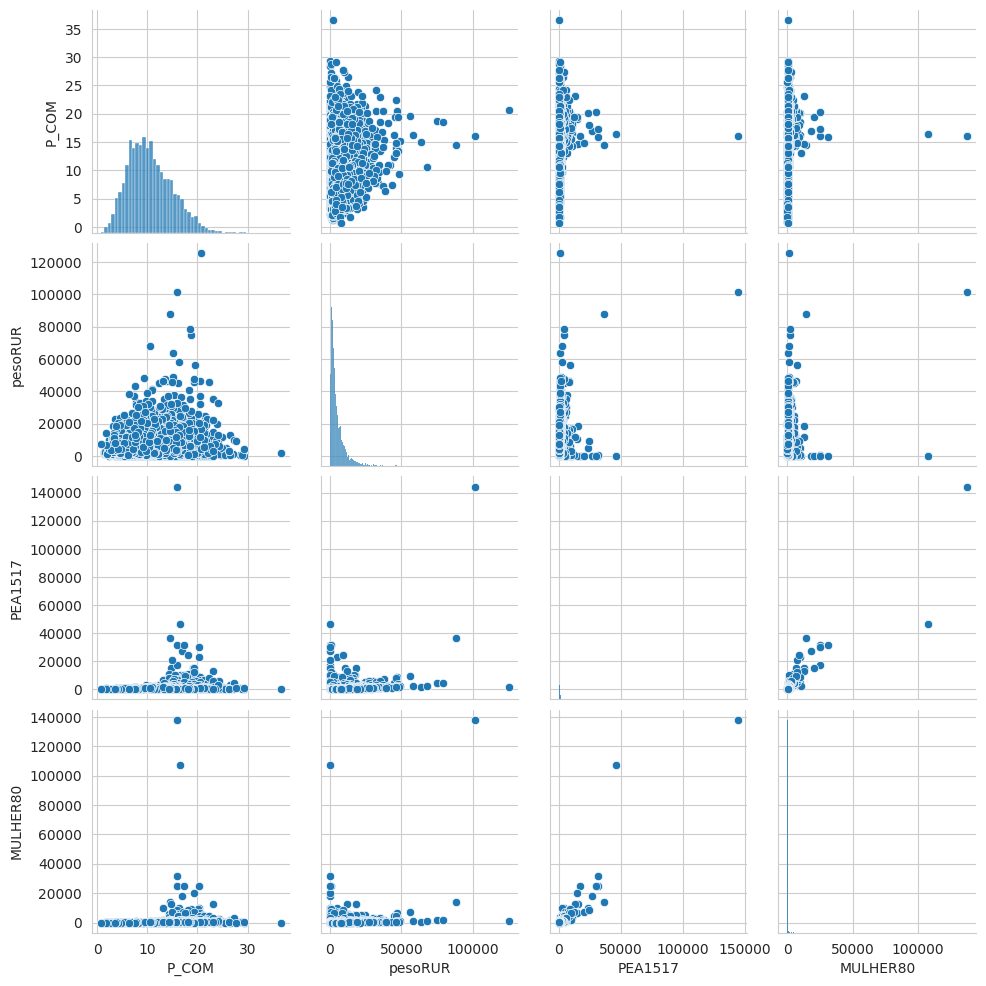

In [51]:
plt.figure(figsize=(15,5))
sns.pairplot(var_sel2.iloc[:, 1:]);

Em seguida, geramos o heatmap com as correlações entre as variáveis.

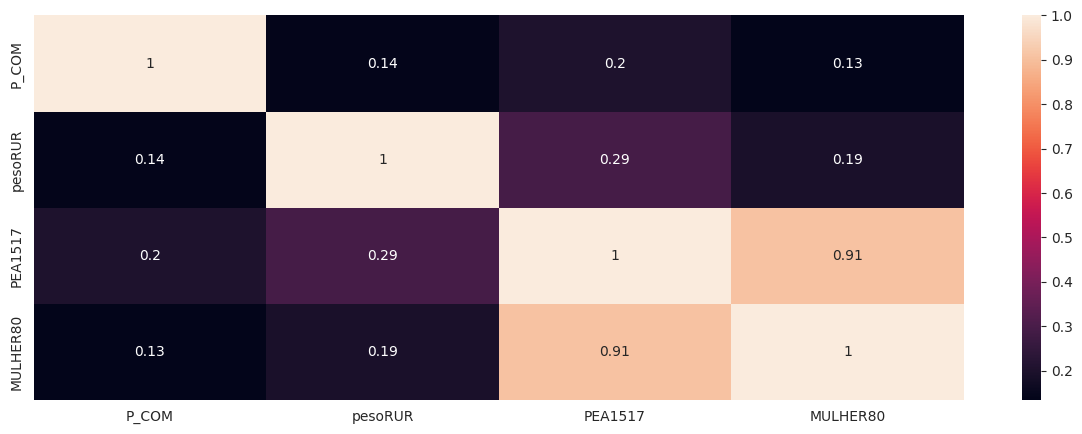

In [52]:
plt.figure(figsize=(15,5))
corr = var_sel2.iloc[:, 1:].corr(method='pearson')
sns.heatmap(corr, annot=True);

Agora, vejamos quais variáveis são **mais** correlacionadas com PMPOB (e consequentemente com POB).

In [53]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Sort correlations with 'PMPOB'
bigger_positcorr = correlation_matrix['PMPOB'].reset_index().sort_values(by='PMPOB', ascending=False).head(12)
bigger_positcorr

index     PMPOB
77                   PMPOB  1.000000
236                    POB  1.000000
78                PMPOBCRI  0.987213
79                    PPOB  0.969626
76                 PINDCRI  0.965922
75                    PIND  0.964346
148   T_FUNDIN_TODOS_MMEIO  0.928837
80                 PPOBCRI  0.926780
116                   REN1  0.885800
153  T_NESTUDA_NTRAB_MMEIO  0.884116
19              T_ANALF25M  0.874621
17              T_ANALF18M  0.868256

Vemos uma correlação alta de 98.7% PMPOB com PMPOBCRI, seguida por correlações altas da ordem de 96% para as variáveis PPOB, PINDCRI e PIND.

Geramos um heatmap com correlações entre as variáveis, para detectar casos de multicolinearidade, a fim de remover variáveis que não acrescentam informações relevantes aos dados.

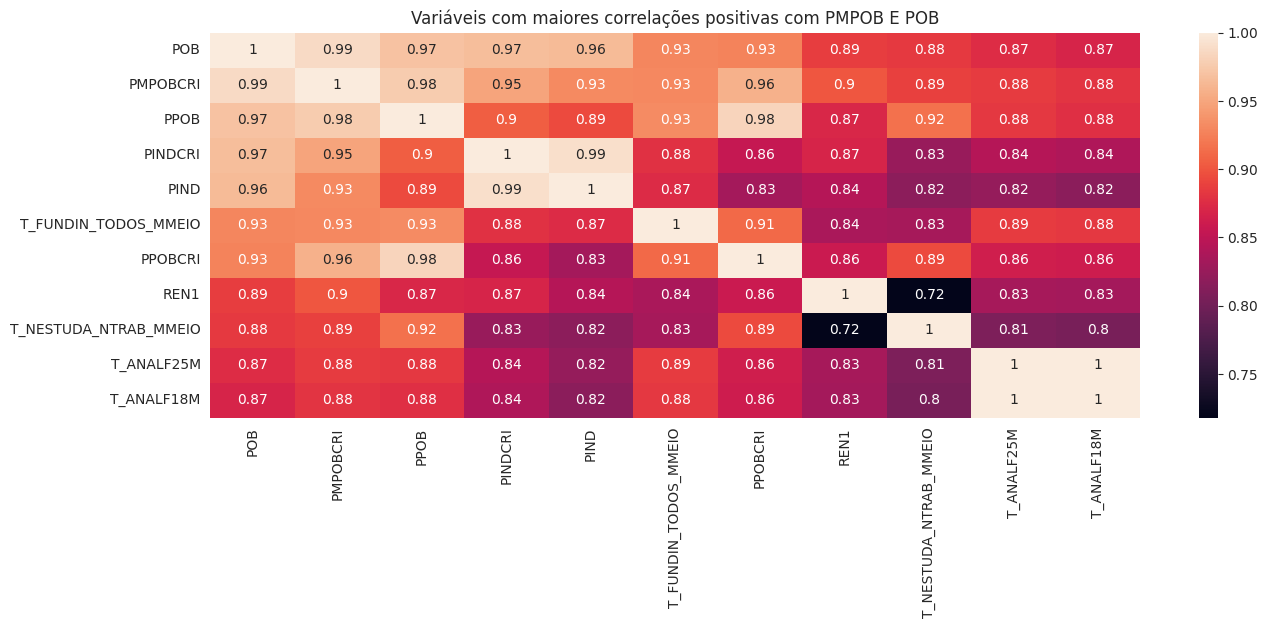

In [54]:
var_sel3 = df[bigger_positcorr['index'].to_list()]
plt.figure(figsize=(15,5))
corr = var_sel3.iloc[:, 1:].corr(method='pearson')
sns.heatmap(corr, annot=True)
plt.title('Variáveis com maiores correlações positivas com PMPOB E POB')
plt.show()

Temos várias variáveis altamente correlacionadas com POB. É prudente removê-las, a fim de evitar multicolinearidade nos modelos de regressão.

Em seguida, verificamos as maiores correlações negativas encontradas quando consideramos a variável PMPOB.

Abaixo, podemos verificar as 10 maiores correlações negativas encontradas.

In [55]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Sort correlations with 'PMPOB'
bigger_negcorr = correlation_matrix['PMPOB'].reset_index().sort_values(by='PMPOB', ascending=True).head(12)
bigger_negcorr

index     PMPOB
100       RPOB -0.962182
235     IDHM_R -0.941841
232       IDHM -0.921648
93       RDPC2 -0.912435
70      CORTE2 -0.910764
94       RDPC3 -0.910376
69      CORTE1 -0.908966
71      CORTE3 -0.901969
91       RDPC1 -0.889768
95       RDPC4 -0.878733
138  T_BANAGUA -0.877405
90        RDPC -0.851740

Aqui, novamente, temos um heatmap com as maiores correlações negativas com PMPOB.

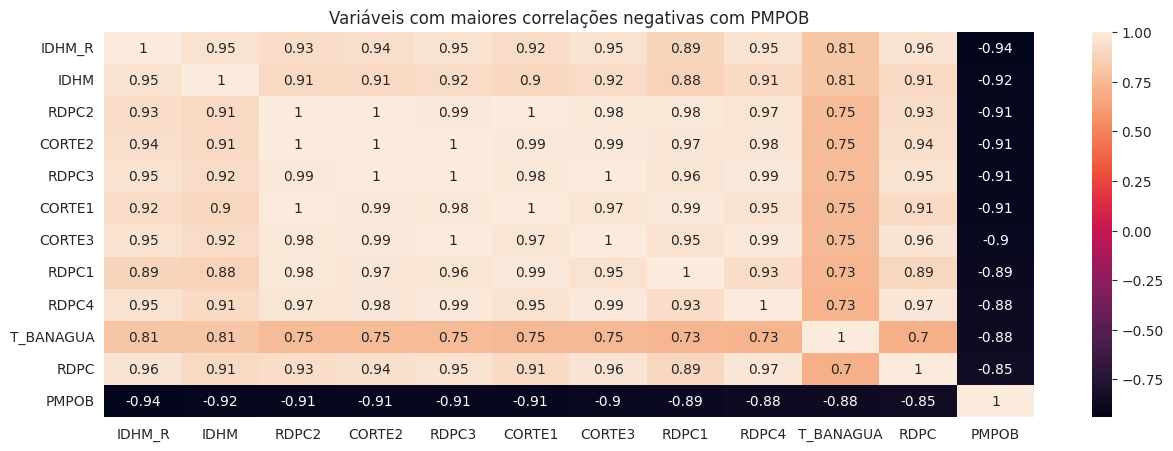

In [56]:
bigger_negcorr_list = bigger_negcorr['index'].to_list()
bigger_negcorr_list.append('PMPOB')
var_sel4 = df[bigger_negcorr_list]
plt.figure(figsize=(15,5))
corr = var_sel4.iloc[:, 1:].corr(method='pearson')
sns.heatmap(corr, annot=True)
plt.title('Variáveis com maiores correlações negativas com PMPOB')
plt.show()

Como esperado, quanto maior o PMPOB, menor as métricas do IDH, uma vez que territórios com alto IDH espera-se ter menor proporção de pobres, pois alta proporção de pobres indica baixa qualidade de vida naquele lugar.

## 5.3. Seleção de variáveis


Baseado nas análises de correlações anterior, podemos excluir as variáveis PMPOB, PMPOBCRI, PPOB, PINDCRI, PIND, T_FUNDIN_TODOS_MMEIO e PPOBCRI, devido à alta correlação com a variável POB.

In [57]:
drop_column_higcorr = bigger_positcorr.head(8)['index'].to_list()
drop_column_higcorr.remove('POB')
drop_column_higcorr

['PMPOB',
 'PMPOBCRI',
 'PPOB',
 'PINDCRI',
 'PIND',
 'T_FUNDIN_TODOS_MMEIO',
 'PPOBCRI']

In [58]:
df = df.drop(columns=drop_column_higcorr)

Também devemos remover as colunas do dataframe com os dados normalizados.

In [59]:
dados_normalizados_df = dados_normalizados_df.drop(columns=drop_column_higcorr)

### 5.3.1. PCA - Análise de componentes principais como uma pré-seleção de variáveis

Podemos diminuir a dimensionalidade dos dados utilizando o método de Análise de Componentes Principais (PCA). PCA é uma técnica estatística utilizada para reduzir a dimensionalidade de conjuntos de dados complexos, enquanto mantém o máximo de informações possíveis. Por meio da transformação linear dos dados originais em um novo conjunto de variáveis (chamadas de componentes principais) o PCA busca representar a estrutura de variância dos dados de forma mais compacta. É muito útil na simplificação de modelos em análise exploratória de dados e aprendizado de máquina. Em essência, o PCA permite uma abordagem eficaz para entender e resumir as relações subjacentes entre as variáveis de um conjunto de dados multidimensional. [3]

Organizamos os dados para realizar o PCA.

In [60]:
df_model = df.iloc[:, 6:]

In [61]:
M = np.matrix(df_model)
S = np.cov(np.transpose(M))
M = np.asarray(M)

In [62]:
df_model.dtypes

ESPVIDA    float64
FECTOT     float64
MORT1      float64
MORT5      float64
RAZDEP     float64
            ...   
IDHM       float64
IDHM_E     float64
IDHM_L     float64
IDHM_R     float64
POB        float64
Length: 226, dtype: object

In [63]:
y = df_model['POB']
X = df_model.drop(columns=['POB'])

In [64]:
# Normalização
normalizador = MinMaxScaler()
dados_normalizados = normalizador.fit_transform(X)

Aplicamos o método PCA aos dados.

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca.fit(dados_normalizados)

PCA(n_components=30)

Obtemos o porcentual da variância explicada por cada componente.

In [66]:
pca.explained_variance_ratio_

np.round(pca.explained_variance_ratio_,2)

array([0.51, 0.08, 0.06, 0.04, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

Obtemos a soma acumulada do porcentual da variância explicada por cada componente.

In [67]:
pca.explained_variance_ratio_.cumsum()

array([0.51227476, 0.58957724, 0.65197965, 0.68969088, 0.721042  ,
       0.74337955, 0.76212149, 0.77824568, 0.79239119, 0.80373502,
       0.81421227, 0.82359714, 0.83278387, 0.84048107, 0.847777  ,
       0.85464236, 0.86099822, 0.86704108, 0.87304616, 0.87888821,
       0.88457922, 0.88970889, 0.89466839, 0.89938967, 0.9038879 ,
       0.90806559, 0.91216015, 0.9159992 , 0.91954194, 0.92289511])

Se quisermos explicar cerca de 85% da variância total dos dados, utilizariamos cerca de 14 componentes principais. Se quisermos explicar cerca de 90% da variância, utilizariamos cerca de 23 componentes principais. Isso representa uma grande redução da dimensionalidade dos nossos dados.

Geramos um scree plot, para visualizar o porcentual da variância explicada por cada componente, e consequentemente analisar o número de componentes principais suficientes para nossa análise.

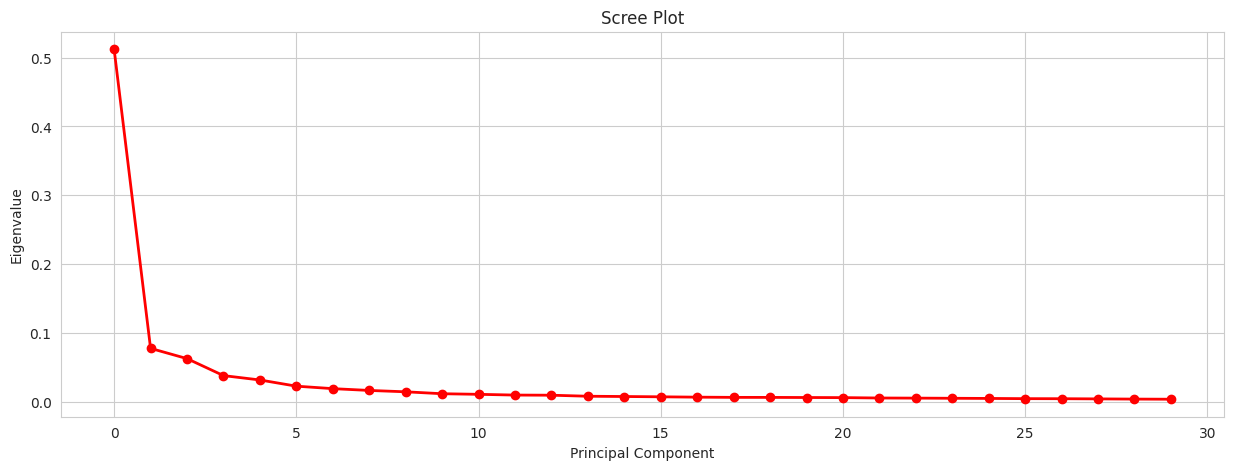

In [68]:
plt.figure(figsize=(15,5))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

Com o scree plot vemos que a partir de 3 componentes não temos muito ganho de informação. Entretanto, podemos utilizar 9 componentes principais, pois assim cerca de 80% da variância é explicada.

Utilizamos o PCA com 9 componentes principais.

In [69]:
pca = PCA(n_components=9)
pca.fit(dados_normalizados)

pca.components_

array([[ 0.13777453, -0.06839291, -0.12531285, ...,  0.11234512,
         0.1379922 ,  0.12528803],
       [ 0.04035607, -0.03870783, -0.06152459, ..., -0.05255512,
         0.04038889,  0.00591689],
       [ 0.10683626,  0.07496397, -0.10713509, ..., -0.0734878 ,
         0.10700447,  0.06097515],
       ...,
       [ 0.27400846,  0.05760591, -0.24491445, ..., -0.01384384,
         0.27443451, -0.06352853],
       [ 0.05744275, -0.1617341 , -0.02857259, ..., -0.06100463,
         0.05750485,  0.07231989],
       [-0.00534326,  0.09116782, -0.00397278, ..., -0.01249308,
        -0.00538744,  0.07966874]])

In [70]:
dados_pca = pca.transform(dados_normalizados)

Criando as componentes:

In [71]:
for i in range(9):
    PCA_col = dados_pca[:, i]
    df[f'PCA{i+1}'] = PCA_col

Colocando em ordem decrescente para a componente 1, por exemplo, temos:

In [72]:
df.sort_values(by='PCA1',ascending=False)

ANO  UF             UFN  Codmun6  Codmun7           Município  ESPVIDA  \
0     2010  35       São Paulo   354880  3548807  são caetano do sul    78.20   
2     2010  42  Santa Catarina   420540  4205407       florianópolis    77.35   
4     2010  42  Santa Catarina   420200  4202008  balneário camboriú    78.62   
1     2010  35       São Paulo   350060  3500600  águas de são pedro    78.37   
5     2010  35       São Paulo   354850  3548500              santos    76.13   
...    ...  ..             ...      ...      ...                 ...      ...   
5559  2010  14         Roraima   140070  1400704            uiramutã    70.95   
5560  2010  15            Pará   150250  1502509              chaves    71.15   
5561  2010  21        Maranhão   210635  2106359      marajá do sena    71.44   
5564  2010  15            Pará   150450  1504505             melgaço    71.57   
5563  2010  21        Maranhão   210408  2104081     fernando falcão    68.67   

      FECTOT  MORT1  MORT5  ...     POB      PCA1      PCA2      PCA3  \
0       1.30   9.50  11.02  ...  0.0052  3.455482 -1.278425  0.200011   
2       1.23  10.81  12.14  ...  0.0135  3.061716 -1.259445  0.435017   
4       1.31   8.70  10.25  ...  0.0095  3.025261 -0.932410  0.380208   
1       1.32   9.30  10.79  ...  0.0080  2.939399 -1.061824 -0.091955   
5       1.25  13.70  15.36  ...  0.0239  2.868728 -1.325178  0.059782   
...      ...    ...    ...  ...     ...       ...       ...       ...   
5559    3.45  22.40  23.93  ...  0.7859 -3.083734  0.303357  1.974750   
5560    2.53  23.50  25.33  ...  0.6304 -3.103852  0.208915  1.409802   
5561    4.10  25.00  27.22  ...  0.7823 -3.152681 -0.314883  0.330047   
5564    3.87  22.40  24.10  ...  0.7343 -3.154789 -0.028266  1.526611   
5563    3.32  33.80  36.79  ...  0.7273 -3.320971  0.157430  0.601379   

          PCA4      PCA5      PCA6      PCA7      PCA8      PCA9  
0     1.324301  0.982745  0.107095 -0.545601  0.939348 -0.328545  
2     1.195867  0.648591  0.060961 -0.661445  0.753639 -0.395232  
4     0.873063  0.655733  0.131140 -0.277902  0.661855 -0.184430  
1     1.031802  0.538091 -0.358138 -0.349599  0.574909 -0.219957  
5     1.103531  0.439089  0.074328 -0.569750  0.686161 -0.157236  
...        ...       ...       ...       ...       ...       ...  
5559  0.853512  0.456642  1.065965  0.826064  0.120088 -0.009163  
5560  0.178958  0.686996  0.567587  0.778161  0.325606 -0.013027  
5561  0.093860  0.518950  0.568856  0.824682  0.467231  0.123062  
5564 -0.322678  0.645082  0.739116  0.692999  0.455021 -0.491735  
5563 -0.036571  0.723487  0.450846 -0.051489  0.088436 -0.668977  

[5565 rows x 241 columns]

- Imprimimos os primeiros 20 municípios e respectiva porcentagem de pobres considerando a primeira componente principal ordenada decrescentemente.

In [73]:
df[['Município','POB','PCA1']].head(20)

Município     POB      PCA1
0    são caetano do sul  0.0052  3.455482
1    águas de são pedro  0.0080  2.939399
2         florianópolis  0.0135  3.061716
3               vitória  0.0351  2.823365
4    balneário camboriú  0.0095  3.025261
5                santos  0.0239  2.868728
6               niterói  0.0334  2.729749
7               joaçaba  0.0261  2.691986
8              brasília  0.0493  2.283225
9              curitiba  0.0173  2.720198
10              jundiaí  0.0187  2.679643
11             valinhos  0.0117  2.670120
12              vinhedo  0.0135  2.538909
13           araraquara  0.0264  2.447436
14          santo andré  0.0324  2.526274
15  santana de parnaíba  0.0471  2.198757
16            nova lima  0.0284  2.020727
17        ilha solteira  0.0258  2.304728
18            americana  0.0139  2.620942
19       belo horizonte  0.0380  2.262280

Imprimimos os últimos 20 municípios e respectiva porcentagem de pobres considerando a primeira componente principal ordenada decrescentemente.

In [74]:
df[['Município','POB','PCA1']].tail(20)

Município     POB      PCA1
5545                          caxingó  0.5680 -2.782643
5546                           manari  0.6091 -2.763627
5547                        itapicuru  0.5729 -2.661521
5548  são francisco de assis do piauí  0.6537 -2.771157
5549                          amajari  0.7551 -2.700416
5550                           anajás  0.6202 -2.765193
5551                           inhapi  0.6508 -2.814308
5552                           portel  0.6055 -2.651856
5553                          ipixuna  0.6807 -2.676962
5554        santa isabel do rio negro  0.7085 -2.741917
5555                        itamarati  0.7420 -3.066771
5556               cachoeira do piriá  0.6743 -2.691294
5557                            bagre  0.5968 -2.530767
5558                           jordão  0.6969 -2.807932
5559                         uiramutã  0.7859 -3.083734
5560                           chaves  0.6304 -3.103852
5561                   marajá do sena  0.7823 -3.152681
5562                 atalaia do norte  0.6367 -3.082443
5563                  fernando falcão  0.7273 -3.320971
5564                          melgaço  0.7343 -3.154789

Geramos um heatmap com matriz de correlações entre a variável POB e as 9 componentes principais.

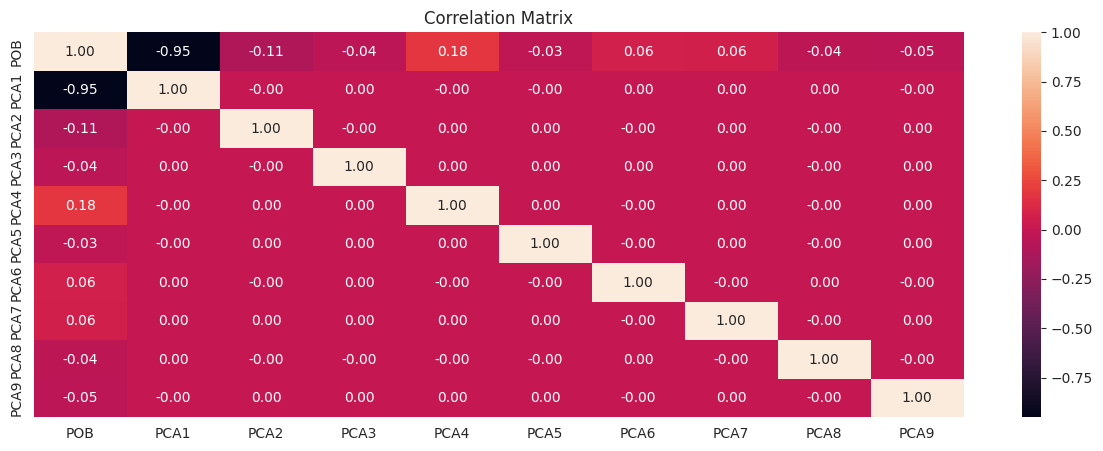

In [75]:
# Select relevant columns for correlation analysis (excluding 'Município')
columns_for_corr = ['POB', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9']
df_pca_1 = df[columns_for_corr]

# Calculate correlation matrix
corr = df_pca_1.corr(method='pearson')

# Create heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Analisando apenas o dataframe temos uma indicação de que a primeira componente principal pode ter relação com o valor de POB. Analisando a matriz de correlação podemos ver a alta correlação **positiva** entre POB e PCA1.

Veja que para o caso deste trabalho, uma das formas de seleção de variáveis seria através de variáveis estatisticamente significativas com a análise dos modelos estatísticos. Isso será abordado com detalhes quando chegarmos na parte de modelagem deste projeto.

### 5.3.2. LASSO (Least Absolute Shrinkage and Selection Operator)

Ajustamos um modelo de regressão LASSO para penalizar os coeficientes das variáveis menos importantes, levando a uma seleção automática de variáveis.

Para isso importamos a classe Lasso do módulo linear_model da biblioteca scikit-learn, que implementa a regressão Lasso e a classe SelectFromModel do módulo feature_selection da biblioteca scikit-learn, que permite selecionar características com base nos coeficientes do modelo.

Primeiramente, realizamos uma busca pelos melhores parâmetros para o modelo Lasso utilizando validação cruzada, para isso importamos as bibliotecas necessárias, incluindo GridSearchCV para a busca de grade, Lasso para o modelo de regressão Lasso e SelectFromModel para selecionar recursos baseados nos coeficientes do modelo.

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Defina os valores que você deseja testar para o parâmetro alpha
param_grid = {
    'alpha': [0.00001, 0.00003, 0.00005, 0.00007, 0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.1]  # Valores para alpha
}

# Crie uma instância do modelo Lasso
lasso_model = Lasso()

# Crie um objeto GridSearchCV
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5)

# Realize a busca pelos melhores parâmetros
grid_search.fit(dados_normalizados_df, df['POB'])

# Exiba o melhor parâmetro alpha encontrado
print("Melhor parâmetro alpha encontrado:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.592e-02, tolerance: 1.297e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.998e-01, tolerance: 1.485e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e-01, tolerance: 1.679e

Melhor parâmetro alpha encontrado: {'alpha': 1e-05}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.005e-01, tolerance: 1.786e-02
  model = cd_fast.enet_coordinate_descent(


In [77]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Criar um modelo de regressão Lasso
lasso_model = Lasso(alpha=1e-05)  # Defina o valor de alpha conforme desejado

# Ajustar o modelo aos dados
lasso_model.fit(dados_normalizados_df, df['POB'])

# Criar um seletor de variáveis baseado nos coeficientes do modelo Lasso
selector = SelectFromModel(lasso_model, prefit=True)

# Obter as variáveis selecionadas
variaveis_selecionadas_lasso = dados_normalizados_df.columns[selector.get_support()]

# Imprimir as variáveis selecionadas
print("Variáveis selecionadas pelo Lasso:")
print(variaveis_selecionadas_lasso)

Variáveis selecionadas pelo Lasso:
Index(['UF', 'ESPVIDA', 'FECTOT', 'MORT1', 'RAZDEP', 'SOBRE40', 'T_ENV',
       'E_ANOSESTUDO', 'T_ANALF15M', 'T_ANALF18A24', 'T_ANALF25A29',
       'T_ATRASO_1_FUND', 'T_ATRASO_1_MED', 'T_ATRASO_2_MED', 'T_FBMED',
       'T_FBSUPER', 'T_FLBAS', 'T_FLPRE', 'T_FREQ0A3', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FREQ25A29', 'T_FREQ5A6', 'T_FREQ6', 'T_FREQ6A17',
       'T_FREQFUND1824', 'T_FREQFUND45', 'T_FREQMED1824', 'T_FUND12A14',
       'T_FUND15A17', 'T_FUND16A18', 'T_FUND18M', 'T_MED18A20', 'T_MED18A24',
       'T_SUPER25M', 'CORTE4', 'CORTE9', 'PREN20', 'PREN20RICOS', 'PREN60',
       'PREN80', 'R2040', 'RDPC1', 'RDPC2', 'RDPC4', 'RIND', 'RMPOB', 'RPOB',
       'THEIL', 'CPR', 'P_COM', 'P_CONSTR', 'P_FORMAL', 'P_TRANSF', 'REN0',
       'REN1', 'REN2', 'REN3', 'REN5', 'T_ATIV1014', 'T_ATIV18M', 'T_DES1824',
       'TRABPUB', 'T_DENS', 'T_LIXO', 'T_LUZ', 'AGUA_ESGOTO', 'PAREDE',
       'T_CRIFUNDIN_TODOS', 'T_FUNDIN18MINF', 'T_M10A14CF', 'T_M15A17CF',

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.005e-01, tolerance: 1.786e-02
  model = cd_fast.enet_coordinate_descent(


### 5.3.3. Ridge Regression

Realizamos a seleção de variáveis utilizando o método Ridge.

Para isso importamos a classe SelectFromModel do módulo feature_selection da biblioteca scikit-learn, essa classe permite selecionar características com base nos coeficientes do modelo.

In [78]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

# Criar um modelo de regressão Ridge
ridge_model = Ridge()

# Ajustar o modelo aos dados
ridge_model.fit(dados_normalizados_df, df['POB'])

# Criar um seletor de variáveis baseado nos coeficientes do modelo Ridge
selector = SelectFromModel(ridge_model, prefit=True)

# Obter as variáveis selecionadas
variaveis_selecionadas_ridge = dados_normalizados_df.columns[selector.get_support()]

# Imprimir as variáveis selecionadas
print("Variáveis selecionadas pelo Ridge:")
print(variaveis_selecionadas_ridge)

Variáveis selecionadas pelo Ridge:
Index(['MORT1', 'RAZDEP', 'SOBRE40', 'T_ENV', 'E_ANOSESTUDO', 'T_ANALF15M',
       'T_ANALF25M', 'T_FBMED', 'T_FREQ18A24', 'T_FREQFUND1824',
       'T_FREQMED1824', 'T_FUND18M', 'T_SUPER25M', 'CORTE1', 'CORTE3',
       'CORTE4', 'GINI', 'PREN10RICOS', 'PREN20', 'PREN20RICOS', 'PREN40',
       'PREN60', 'PREN80', 'RDPC1', 'RDPC10', 'RDPC2', 'RDPC4', 'RDPC5',
       'RMPOB', 'RPOB', 'THEIL', 'CPR', 'P_FORMAL', 'P_FUND', 'REN1', 'REN3',
       'RENOCUP', 'T_ATIV', 'T_DES', 'T_DES1824', 'T_DES18M', 'T_FUNDIN_TODOS',
       'T_FUNDIN18MINF', 'T_NESTUDA_NTRAB_MMEIO', 'T_RMAXIDOSO',
       'I_ESCOLARIDADE', 'IDHM', 'IDHM_E', 'IDHM_R'],
      dtype='object')


### 5.3.4. Elastic net

Realizamos a seleção de variáveis utilizando o método Elastic Net.

Para isso importamos a classe ElasticNet do módulo linear_model da biblioteca scikit-learn. O Elastic Net é um método de regularização que combina penalidades L1 e L2.

Importamos também a classe SelectFromModel do módulo feature_selection da biblioteca scikit-learn. Essa classe permite selecionar características com base nos coeficientes do modelo.

Primeiramente, realizamos uma busca pelos melhores parâmetros para o modelo Elastic net utilizando validação cruzada, para isso importamos a biblioteca GridSearchCV para a busca de grade.

In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Defina os valores que você deseja testar para os parâmetros alpha e l1_ratio
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],        # Valores para alpha
    'l1_ratio': [0.01, 0.05, 0.1, 0.2, 0.5]     # Valores para l1_ratio
}

# Crie uma instância do modelo ElasticNet
elastic_net_model = ElasticNet()

# Crie um objeto GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=5)

# Realize a busca pelos melhores parâmetros
grid_search.fit(dados_normalizados_df, df['POB'])

# Exiba os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:", grid_search.best_params_)

Melhores parâmetros encontrados: {'alpha': 0.01, 'l1_ratio': 0.2}


In [80]:
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel

# Criar um modelo de regressão Elastic Net
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.2)  # Defina os valores de alpha e l1_ratio conforme desejado

# Ajustar o modelo aos dados
elastic_net_model.fit(dados_normalizados_df, df['POB'])

# Criar um seletor de variáveis baseado nos coeficientes do modelo Elastic Net
selector = SelectFromModel(elastic_net_model, prefit=True)

# Obter as variáveis selecionadas
variaveis_selecionadas_elastnet = dados_normalizados_df.columns[selector.get_support()]

# Imprimir as variáveis selecionadas
print("Variáveis selecionadas pelo Elastic Net:")
print(variaveis_selecionadas_elastnet)

Variáveis selecionadas pelo Elastic Net:
Index(['UF', 'Codmun6', 'Codmun7', 'ESPVIDA', 'MORT1', 'T_ANALF15M',
       'T_ANALF18M', 'T_ANALF25A29', 'T_ANALF25M', 'T_ATRASO_0_BASICO',
       'T_FREQFUND1517', 'CORTE1', 'PREN20', 'PREN40', 'RDPC2', 'RPOB',
       'P_FORMAL', 'REN1', 'T_ATIV1824', 'T_BANAGUA', 'T_DENS',
       'T_NESTUDA_NTRAB_MMEIO', 'T_RMAXIDOSO', 'IDHM', 'IDHM_L', 'IDHM_R'],
      dtype='object')


### 5.3.5. Random Forest

Ajustamos um modelo RandomForestRegressor aos dados e depois identificamos as características mais importantes para a predição do alvo. As características selecionadas são aquelas que possuem uma importância maior que um limite pré-estabelecido.

Para isso importamos a classe RandomForestRegressor do módulo ensemble do scikit-learn. O RandomForestRegressor é um modelo de aprendizado de máquina baseado em árvores de decisão que é usado para tarefas de regressão.

Primeiramente, realizamos uma busca pelos melhores parâmetros para o **modelo** utilizando validação cruzada, para isso importamos a biblioteca GridSearchCV para a busca de grade.

**O código abaixo está comentado pois demorou 1h para rodar, então não precisamos rodá-lo novamente.**

In [81]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Defina os valores que você deseja testar para os parâmetros n_estimators e max_depth
# param_grid = {
#     'n_estimators': [50, 100, 150],  # Valores para o número de árvores na floresta
#     'max_depth': [None, 10, 20]       # Valores para a profundidade máxima das árvores
# }

# # Crie uma instância do modelo RandomForestRegressor
# random_forest_model = RandomForestRegressor(random_state=42)

# # Crie um objeto GridSearchCV
# grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)

# # Realize a busca pelos melhores parâmetros
# grid_search.fit(dados_normalizados_df, df['POB'])

# # Exiba os melhores parâmetros encontrados
# print("Melhores parâmetros encontrados:", grid_search.best_params_)

# # Use os melhores parâmetros encontrados para criar o modelo final
# melhores_parametros = grid_search.best_params_
# modelo_final = RandomForestRegressor(n_estimators=melhores_parametros['n_estimators'],
#                                       max_depth=melhores_parametros['max_depth'],
#                                       random_state=42)

# # Ajuste o modelo final aos dados
# modelo_final.fit(dados_normalizados_df, df['POB'])

# # Obter a importância das características
# importancias_caracteristicas = modelo_final.feature_importances_

# # Selecione as características mais importantes com base no limite de importância
# limite_importancia = 0.01  # Defina um limite de importância conforme necessário
# variaveis_selecionadas = dados_normalizados_df.columns[importancias_caracteristicas > limite_importancia]

# # Imprima as características selecionadas
# print("Variáveis selecionadas pelo Random Forest:")
# print(variaveis_selecionadas)

In [82]:
from sklearn.ensemble import RandomForestRegressor

# Criar uma instância do modelo Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar o modelo aos dados
random_forest_model.fit(dados_normalizados_df
                        , df['POB'])

# Obter a importância das características
importancias_caracteristicas = random_forest_model.feature_importances_

# Selecionar as características mais importantes
limite_importancia = 0.01  # Defina um limite de importância conforme necessário
variaveis_selecionadas_random_forest = dados_normalizados_df.columns[importancias_caracteristicas > limite_importancia]

# Imprimir as características selecionadas
print("Variáveis selecionadas pelo Random Forest:")
print(variaveis_selecionadas_random_forest)

Variáveis selecionadas pelo Random Forest:
Index(['CORTE1', 'CORTE2', 'RDPC1', 'RDPC2', 'RDPC3'], dtype='object')


# 6. Análises de Agrupamento e Redução de Dimensionalidade

##6.1 Análise de Agrupamento

### Agrupamento não-hierárquico

Um método de agrupamento não-hierárquico aplica uma análise de cluster buscando dividir um conjunto de dados em grupos (ou clusters), de modo que os dados de cada grupo sejam mais semelhantes entre si do que com os de outros grupos. Diferentemente dos métodos hierárquicos, os quais criam uma estrutura de árvore que mostra as relações entre os clusters em vários níveis de similaridade, os métodos não-hierárquicos formam clusters em um único nível.

Aqui, utilizaremos o método k-means, onde "k" representa o número de clusters desejados. Neste método, o processo começa com a seleção aleatória de k centros de cluster, e cada observação é atribuído ao centro mais próximo, formando k clusters. Em seguida, os centros são recalculados como o centroide de todos os pontos atribuídos a cada cluster, e o processo se repete até que os clusters não mudem mais ou até que um número máximo de iterações seja alcançado.[12]

In [83]:
#Chamando a normalização novamente, para não precisar rodar partes distintas do notebook.

from sklearn.preprocessing import StandardScaler, MinMaxScaler

colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.drop('POB')

# Normalização
normalizador = MinMaxScaler()
dados_normalizados = normalizador.fit_transform(df[colunas_numericas])

# Padronização
padronizador = StandardScaler()
dados_padronizados = padronizador.fit_transform(df[colunas_numericas])

dados_normalizados_df = pd.DataFrame(dados_normalizados, columns=colunas_numericas)
dados_padronizados_df = pd.DataFrame(dados_padronizados, columns=colunas_numericas)

dados_normalizados_df.head(), dados_padronizados_df.head()

(   ANO        UF   Codmun6   Codmun7   ESPVIDA    FECTOT     MORT1     MORT5  \
 0  0.0  0.571429  0.583033  0.583033  0.967016  0.024457  0.026364  0.025391   
 1  0.0  0.571429  0.571557  0.571555  0.979760  0.029891  0.021143  0.019775   
 2  0.0  0.738095  0.739363  0.739363  0.903298  0.005435  0.060559  0.052734   
 3  0.0  0.500000  0.501249  0.501249  0.823088  0.046196  0.075176  0.082031   
 4  0.0  0.738095  0.738553  0.738553  0.998501  0.027174  0.005482  0.006592   
 
      RAZDEP   SOBRE40  ...    IDHM_R      PCA1      PCA2      PCA3      PCA4  \
 0  0.133903  0.842615  ...  1.000000  1.000000  0.145584  0.424720  0.924583   
 1  0.265556  0.853511  ...  0.914460  0.923842  0.203699  0.333062  0.828780   
 2  0.055249  0.799031  ...  0.957230  0.941892  0.150676  0.498497  0.882517   
 3  0.098121  0.518160  ...  0.969450  0.906719  0.074733  0.478564  0.924439   
 4  0.062001  0.858354  ...  0.924644  0.936512  0.238422  0.481291  0.776788   
 
        PCA5      PCA6  

Para a escolha do **k clusters** ideal vamos utilizar os **Métodos Elbow** (cotovelo).

O **método Elbow** geralmente envolve traçar a soma dos quadrados das distâncias intra-cluster em relação ao número de clusters. Isso é chamado de soma dos quadrados intra-cluster. O objetivo é escolher um número de clusters onde a adição de um cluster adicional não resulte em uma redução significativa na soma dos quadrados intra-cluster. A "curva" do gráfico dessa relação, frequentemente parece um cotovelo, daí o nome "método do cotovelo".

Para fazer as análises, utilizamos as bibliotecas a seguir.

 - `Kmeans` de `sklearn.cluster`: É uma ferramenta para realizar a tarefa de clustering, que é um tipo de aprendizado não supervisionado. Os hiperparâmetros desta função são,

**n_clusters**: número de clusters desejados.

**init**: método de inicialização dos centróides. Pode ser 'k-means++' (default), 'random' ou um array numpy com os centróides iniciais.

**n_init**: número de vezes que o algoritmo será executado com diferentes centroides iniciais. O resultado final será o melhor output em termos de inércia.

**max_iter**: número máximo de iterações do algoritmo K-Means para uma execução.

**tol**: tolerância para declarar convergência.

**random_state**: semente do gerador de números aleatórios para inicialização.

Neste trabalho, utilizamos apenas o random_state.

- `KElbowVisualizer` de `yellowbrick.cluster`: É uma ferramenta visual que ajuda a encontrar o número ideal de clusters para um modelo de clustering (como o K-Means). Esse método é comumente chamado de "método do cotovelo" porque o gráfico gerado frequentemente mostra uma inflexão ou "cotovelo", que indica o ponto em que adicionar mais clusters não traz uma melhoria significativa na modelagem dos dados. Os hiperparâmetros desta função são,

**estimator**: O modelo de clustering a ser usado (neste caso, KMeans). Deve ser proveniente do scikit-learn.

**k**: Intervalo de valores de k a serem avaliados. Pode ser um valor máximo (por exemplo, 10), uma tupla com valores mínimo e máximo (por exemplo, (2, 10)), ou uma lista de valores específicos (por exemplo, [2, 4, 6, 8, 10]).

**timings**: Se é igual a `True`, exibe o tempo de ajuste para cada valor de k.

**metric**: A métrica a ser usada para avaliação (por exemplo, distortion, silhouette, etc.). Por padrão, usa-se distortion (inércia).

**locate_elbow**: Encontra automaticamente o "cotovelo", que provavelmente corresponde ao valor ótimo de k usando o "knee point detection algorithm".


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

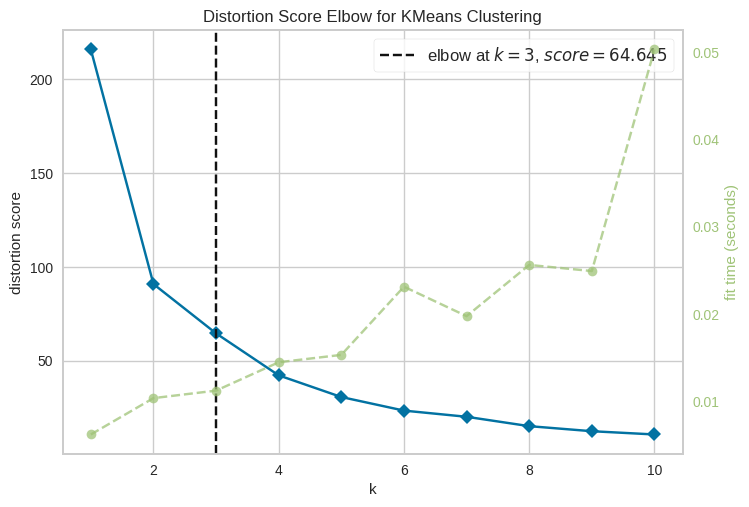

In [84]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# Precisamos definir uma lista de variáveis que achemos relevantes para a clusterização. Primeira tentativa:
variables = ['E_ANOSESTUDO', 'GINI', 'RDPC', 'T_AGUA', 'ESPVIDA', 'UFN', 'MORT1', 'IDHM','T_ANALF25M']
df_selected = df[variables].dropna()

df4 = df_selected.groupby('UFN').median()

# Não sei se da diferença padronizar e depois agrupar, mas na dúvida, farei separado

df_scaled = df4.copy() # Mantenho o df4 pra eu usar depois
df_scaled.iloc[:,:] = StandardScaler().fit_transform(df4)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)


km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,11))

visualizer.fit(df_scaled)
visualizer.show();

Inicialmente escolhemos k = 4, pois já observamos que o Distrito Federal ficará sempre sozinho em um cluster, e se escolhermos k=3 o resto dos estados brasileiros estarão todos divididos em apenas 2 clusters.

In [85]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(df_scaled)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 1, 3, 3, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 1, 1, 1, 0, 0, 0,
       3, 0, 1, 0, 0], dtype=int32)

Exibindo os estados em cada cluster:

In [86]:
#adicionando a coluna do cluster
df_scaled['Cluster_k4'] = clusters

states = list(df_scaled.index)
groups = df_scaled['Cluster_k4']

grouped_states_nh = {i: [] for i in range(optimal_k)}

for state, group in zip(states, groups):
    grouped_states_nh[group].append(state)

for gp, ctr in grouped_states_nh.items():
    print(f'Cluster {gp}: {ctr}\n')

Cluster 0: ['Espírito Santo', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Santa Catarina', 'São Paulo', 'Tocantins']

Cluster 1: ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']

Cluster 2: ['Distrito Federal']

Cluster 3: ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Roraima']



Agora, para k = 5

In [87]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

df_scaled['Cluster_k6'] = clusters

states = list(df_scaled.index)
groups = df_scaled['Cluster_k6']

grouped_states_nh = {i: [] for i in range(optimal_k)}

for state, group in zip(states, groups):
    grouped_states_nh[group].append(state)

for gp, ctr in grouped_states_nh.items():
    print(f'Cluster {gp}: {ctr}\n')

Cluster 0: ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']

Cluster 1: ['Goiás', 'Paraná', 'Rio Grande do Sul', 'Santa Catarina', 'São Paulo']

Cluster 2: ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Roraima']

Cluster 3: ['Espírito Santo', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Rio de Janeiro', 'Rondônia', 'Tocantins']

Cluster 4: ['Distrito Federal']



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Criando o mapa com os clusters obtidos**

Para a construção do mapa, utilizamos a biblioteca `geobr` de `geopandas`. Esta é uma biblioteca que obtém informações oficiais de dados espaciais do Brasil, incluindo os dados geométricos (polígonos), utilizados para construir as delimitações dos territórios no mapa. Veja mais em https://ipeagit.github.io/geobr/articles/python-intro/py-intro-to-geobr.html. [16]

Importamos as informações espaciais existentes no pacote com a função `read_state`.

In [88]:
import geopandas
import geobr

states_df = geobr.read_state(year=2019)
states_df

code_state abbrev_state           name_state  code_region   name_region  \
0         11.0           RO             Rondônia          1.0         Norte   
1         12.0           AC                 Acre          1.0         Norte   
2         13.0           AM             Amazônas          1.0         Norte   
3         14.0           RR              Roraima          1.0         Norte   
4         15.0           PA                 Pará          1.0         Norte   
5         16.0           AP                Amapá          1.0         Norte   
6         17.0           TO            Tocantins          1.0         Norte   
7         21.0           MA             Maranhão          2.0      Nordeste   
8         22.0           PI                Piauí          2.0      Nordeste   
9         23.0           CE                Ceará          2.0      Nordeste   
10        24.0           RN  Rio Grande Do Norte          2.0      Nordeste   
11        25.0           PB              Paraíba          2.0      Nordeste   
12        26.0           PE           Pernambuco          2.0      Nordeste   
13        27.0           AL              Alagoas          2.0      Nordeste   
14        28.0           SE              Sergipe          2.0      Nordeste   
15        29.0           BA                Bahia          2.0      Nordeste   
16        31.0           MG         Minas Gerais          3.0       Sudeste   
17        32.0           ES       Espírito Santo          3.0       Sudeste   
18        33.0           RJ       Rio De Janeiro          3.0       Sudeste   
19        35.0           SP            São Paulo          3.0       Sudeste   
20        41.0           PR               Paraná          4.0           Sul   
21        42.0           SC       Santa Catarina          4.0           Sul   
22        43.0           RS    Rio Grande Do Sul          4.0           Sul   
23        50.0           MS   Mato Grosso Do Sul          5.0  Centro Oeste   
24        51.0           MT          Mato Grosso          5.0  Centro Oeste   
25        52.0           GO                Goiás          5.0  Centro Oeste   
26        53.0           DF     Distrito Federal          5.0  Centro Oeste   

                                             geometry  
0   MULTIPOLYGON (((-65.38150 -10.42907, -65.37916...  
1   MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ...  
2   MULTIPOLYGON (((-69.83766 -3.68659, -69.71230 ...  
3   MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...  
4   MULTIPOLYGON (((-51.43248 -0.47334, -51.42843 ...  
5   MULTIPOLYGON (((-50.45011 2.10924, -50.44252 2...  
6   MULTIPOLYGON (((-48.23163 -5.94614, -48.22940 ...  
7   MULTIPOLYGON (((-44.53830 -2.02124, -44.53542 ...  
8   MULTIPOLYGON (((-42.91539 -6.64607, -42.91722 ...  
9   MULTIPOLYGON (((-41.18292 -4.01797, -41.18862 ...  
10  MULTIPOLYGON (((-37.04412 -4.81854, -37.04501 ...  
11  MULTIPOLYGON (((-34.79576 -7.35000, -34.79614 ...  
12  MULTIPOLYGON (((-32.39240 -3.82372, -32.39320 ...  
13  MULTIPOLYGON (((-35.75791 -9.69285, -35.75839 ...  
14  MULTIPOLYGON (((-36.91665 -10.84277, -36.91854...  
15  MULTIPOLYGON (((-38.69616 -17.97901, -38.69629...  
16  MULTIPOLYGON (((-50.74208 -19.21384, -50.74289...  
17  MULTIPOLYGON (((-40.75189 -20.92722, -40.75601...  
18  MULTIPOLYGON (((-41.82923 -22.78453, -41.82976...  
19  MULTIPOLYGON (((-48.03716 -25.35794, -48.03822...  
20  MULTIPOLYGON (((-48.40736 -25.84270, -48.40920...  
21  MULTIPOLYGON (((-48.60084 -28.35222, -48.60143...  
22  MULTIPOLYGON (((-49.70392 -29.34774, -49.70499...  
23  MULTIPOLYGON (((-57.83371 -20.93628, -57.84443...  
24  MULTIPOLYGON (((-52.61926 -9.68225, -52.00032 ...  
25  MULTIPOLYGON (((-52.36102 -16.08160, -52.35780...  
26  MULTIPOLYGON (((-47.81455 -16.04995, -48.27781...

Olhamos as informações básicas da tabela states_df. Os tipos das colunas estão condizentes com seus conteúdos, como por exemplo, `code_state`, que está como float64. Logo, podemos prosseguir com o uso desta tabela.

In [154]:
states_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code_state    27 non-null     float64 
 1   abbrev_state  27 non-null     object  
 2   name_state    27 non-null     object  
 3   code_region   27 non-null     float64 
 4   name_region   27 non-null     object  
 5   geometry      27 non-null     geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 1.4+ KB


Agora, colocamos o código do município ('UF') no dataframe em que estão mapeados os clusters.

In [90]:
df_scaled_uf_code = pd.merge( df_scaled.reset_index(), df[['UFN','UF']], how='left', left_on='UFN', right_on='UFN')
df_scaled_uf_code.drop_duplicates(inplace=True)

Fazemos o merge do dataframe com os clusters e o dataframe com os dados espaciais fornececidos pelo `geobr`, através do código da unidade federativa. Plotamos os clusters.

**Para k = 4**

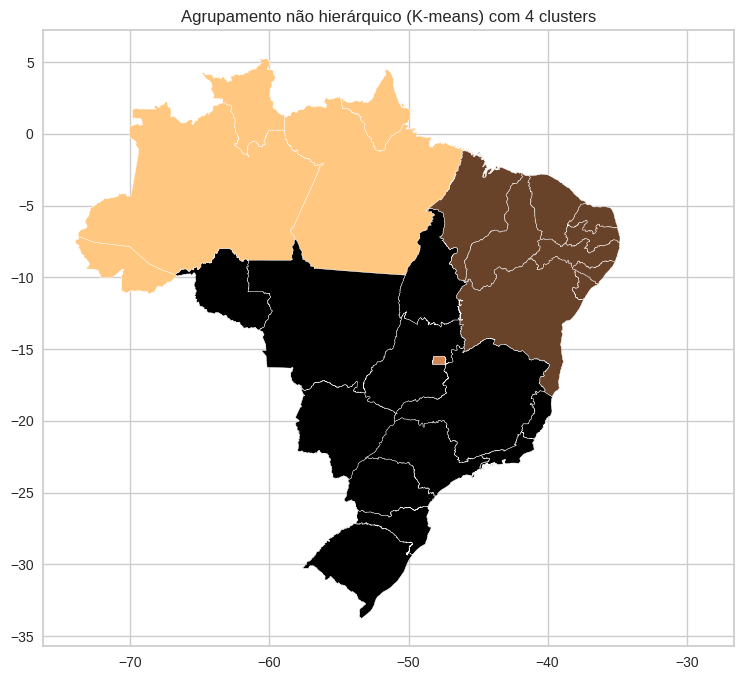

In [91]:
# Merge dos dois conjuntos
all_data = pd.merge(states_df, df_scaled_uf_code.reset_index(), how='left', left_on='code_state', right_on='UF')

# Plotando o mapa com os clusters
all_data.plot(column='Cluster_k4', figsize=(18, 8), cmap='copper')
plt.title('Agrupamento não hierárquico (K-means) com 4 clusters')
plt.show()

É evidente como o nordeste brasileiro está agrupado em um único cluster, indicando similaridades marcantes entre os estados dessa região em relação às variáveis analisadas. Quase toda a região Norte (com exceção do estado de Goiânia) também se encontra em um cluster. De maneira similar, o Sul do Brasil forma outro cluster, englobando também São Paulo, Goiás e DF. Notavelmente, esse cluster abrange estados com menor POB. Entretanto, veja que Rio de Janeiro possui POB menor do que de Goiás, porém de acordo com as variáveis selecionadas anteriormente, este estado se enquadraria em um cluster diferente, junto de Minas Gerais, Espirito Santo, Mto Grosso, Mato Grosso do Sul, Tocantins e Rondônia.

###Agrupamento Hierárquico

Métodos de agrupamento hierárquico são uma categoria de técnicas de análise de cluster que visam construir uma hierarquia de clusters. É possível visualizar essa hierarquização através de um dendrograma, que é um diagrama em forma de árvore mostrando a ordem e os níveis de agrupamento.

Além das métricas, os métodos hierárquicos também usam diferentes critérios de ligação (ou distância) para decidir quais clusters combinar durante o agrupamento aglomerativo. Os principais critérios são:

**Single** (Ligação Simples): Este método utiliza a menor distância entre quaisquer dois pontos nos dois clusters como a distância entre os clusters. É sensível a outliers, pois pode levar à formação de clusters alongados e finos.

**Complete** (Ligação Completa): Utiliza a maior distância entre quaisquer dois pontos nos dois clusters para medir a distância entre os clusters. É menos sensível a outliers comparado ao método de ligação simples e tende a encontrar grupos mais compactos e bem separados.

**Average** (Ligação Média): Calcula a média das distâncias de todos os pares de pontos entre dois clusters. Este método pode ser visto como um compromisso entre os métodos de ligação simples e completa, e é menos sensível a outliers em comparação com a ligação simples.

**Weighted** (Ligação Ponderada): Semelhante ao método de ligação média, mas com pesos que podem variar dependendo da estrutura dos dados. Neste método, a distância entre dois clusters é a média das distâncias entre todos os pares de pontos, ajustada por pesos que dependem do número de pontos em cada cluster.

**Centroid** (Ligação por Centróide): Utiliza a distância entre os centróides dos clusters como a medida de distância entre eles. Os centróides são calculados como o ponto médio entre todos os pontos em cada cluster. Este método pode resultar em inversões no dendrograma, onde clusters mais distantes podem ser fundidos antes dos mais próximos.

**Median** (Ligação por Mediana): Semelhante ao método de ligação por centróide, mas o centróide é recalculado como a mediana dos pontos após cada fusão. Este método também pode levar a inversões no dendrograma.

**Ward** (Ligação de Ward): Minimiza a soma dos quadrados dentro de todos os clusters combinados. Ou seja, este método funde os clusters que resultam no mínimo aumento possível da soma total dos quadrados das distâncias de cada ponto ao centróide do novo cluster formado. É particularmente útil para identificar clusters que são globulares e de tamanho similar.[13]

Utilizamos o método `hierarchy` de `scipy.cluster`. A função `linkage` é usada para realizar o clustering hierárquico. Existem vários métodos de linkage que você pode usar, como 'single', 'complete', 'average', 'ward', etc. A função `dendogram` plota o dendograma.

In [92]:
#Função que será utilizada para plotagem dos dendogramas
from scipy.cluster import hierarchy
def plot_dendogram(df, method):
    '''
    Plota o dendograma a partir de um determinado método de distância
    '''
    Z = hierarchy.linkage(df, method)
    plt.figure(figsize=(16,10))
    plt.grid(axis = 'y')
    dn = hierarchy.dendrogram(Z, labels=list(df_scaled.index),
                              leaf_font_size=8)
    plt.show()

Fazemos os agrupamentos e os dendogramas com todos os métodos (armazenado em `methods`).

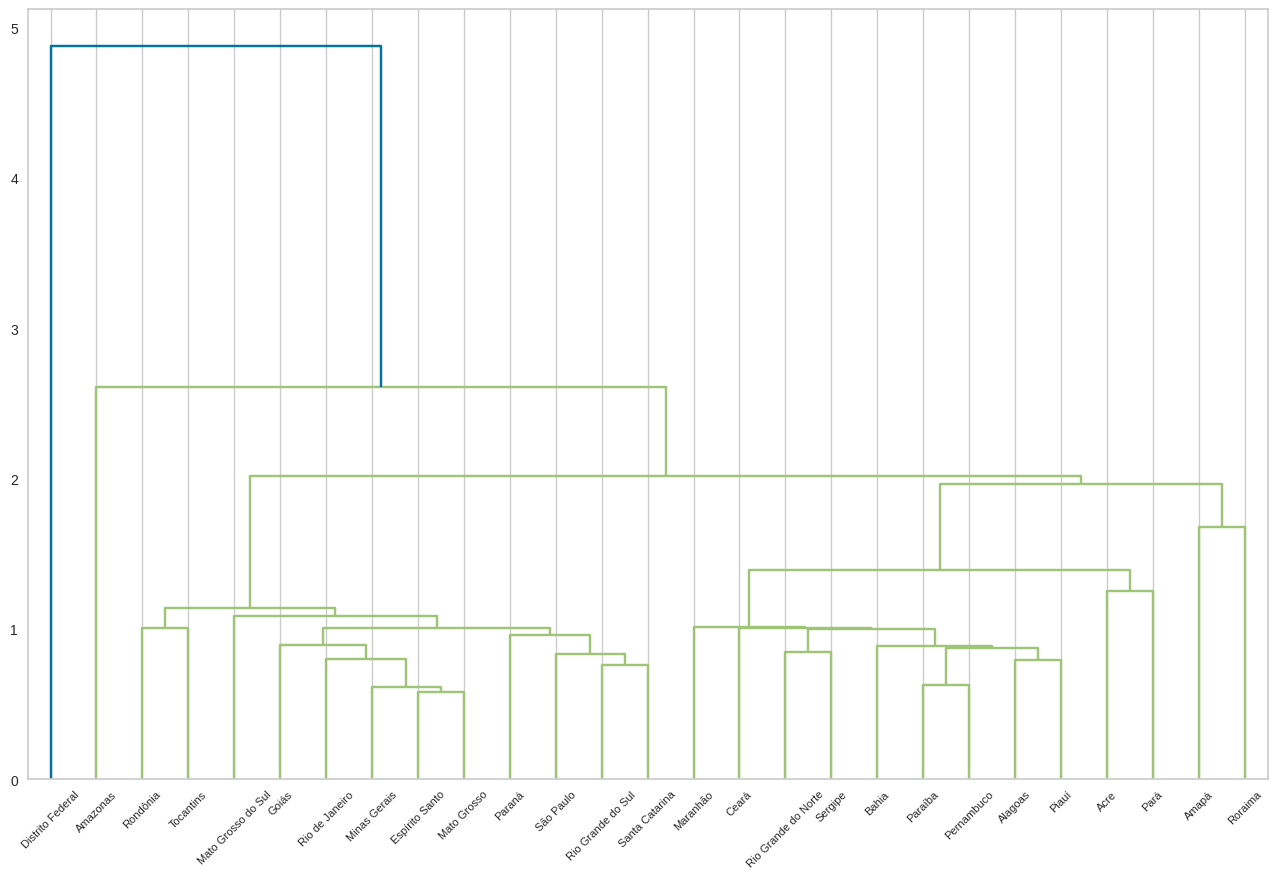

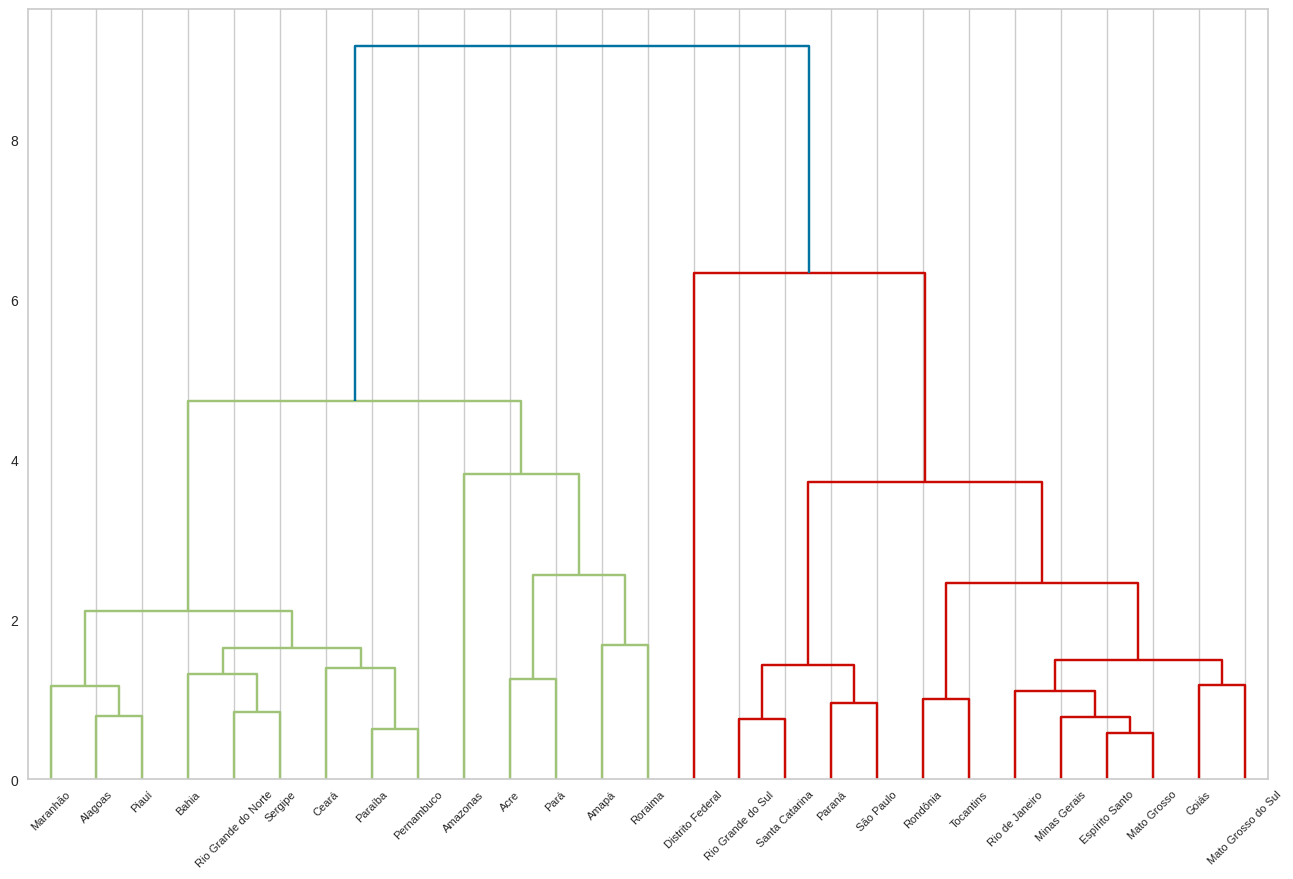

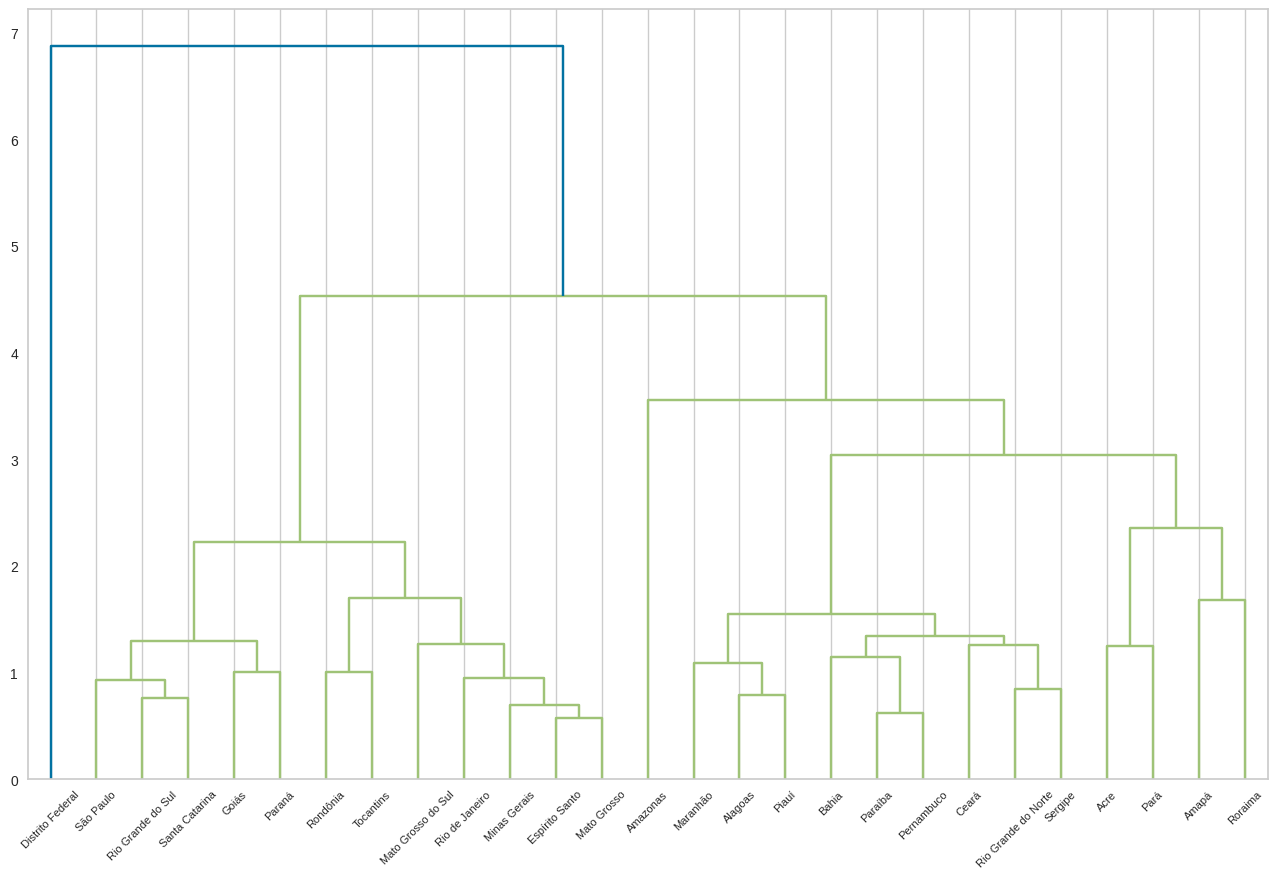

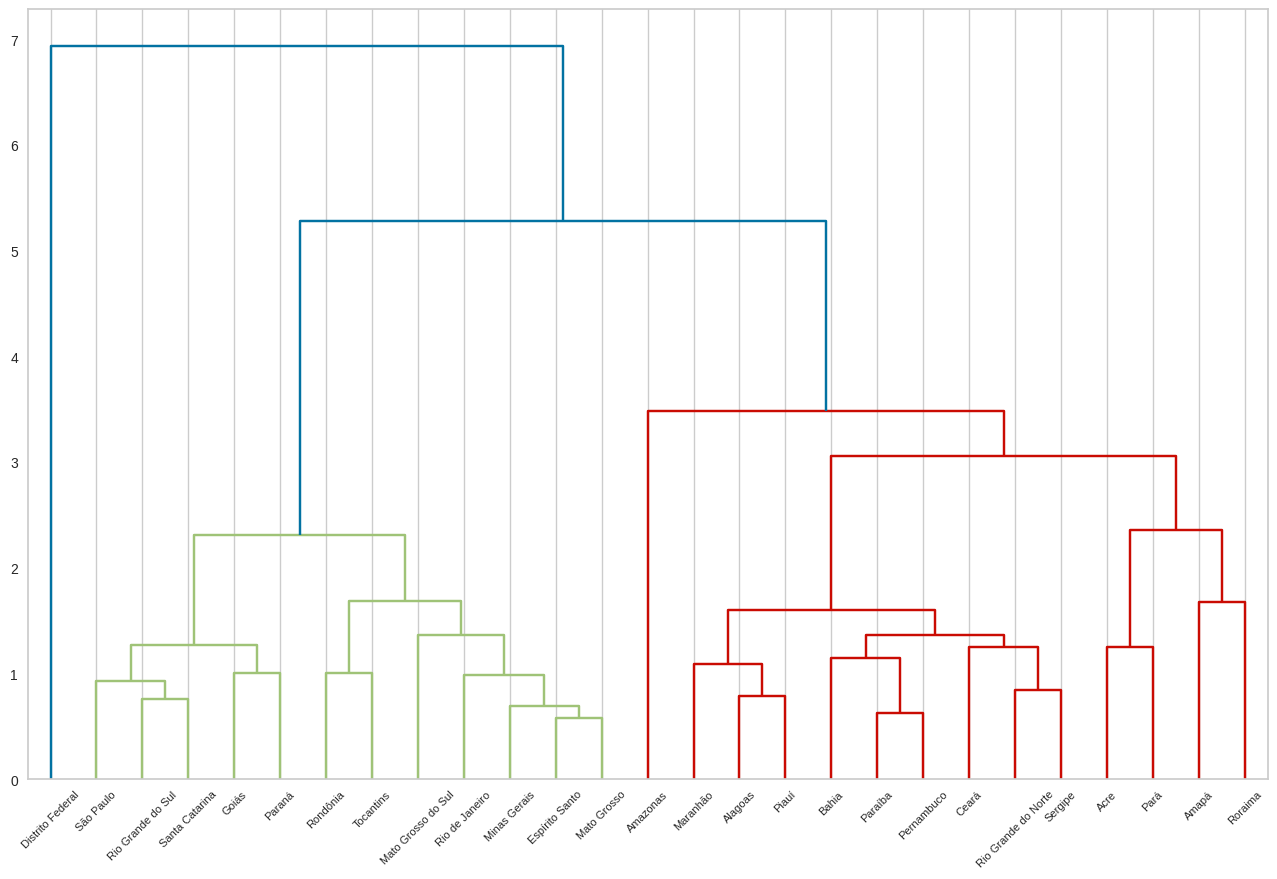

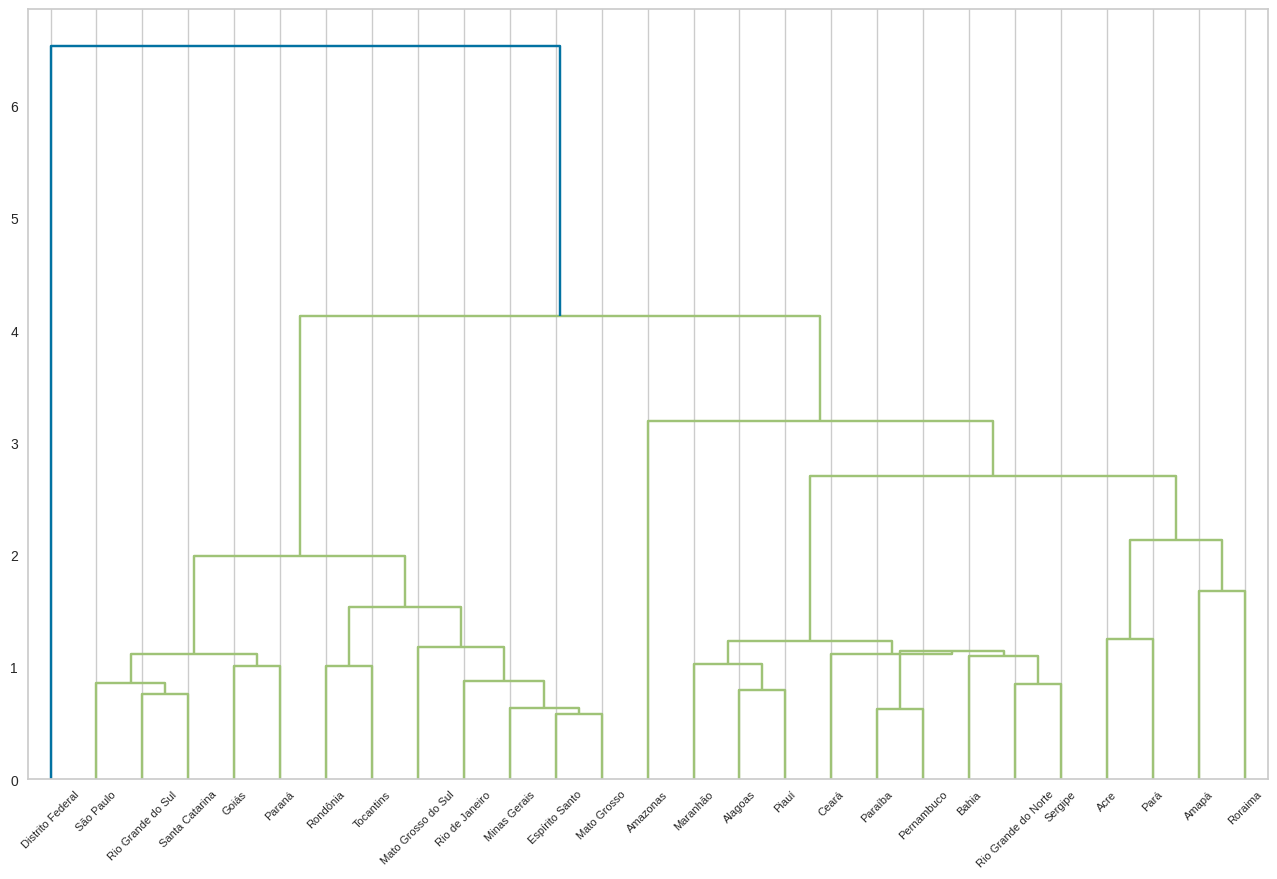

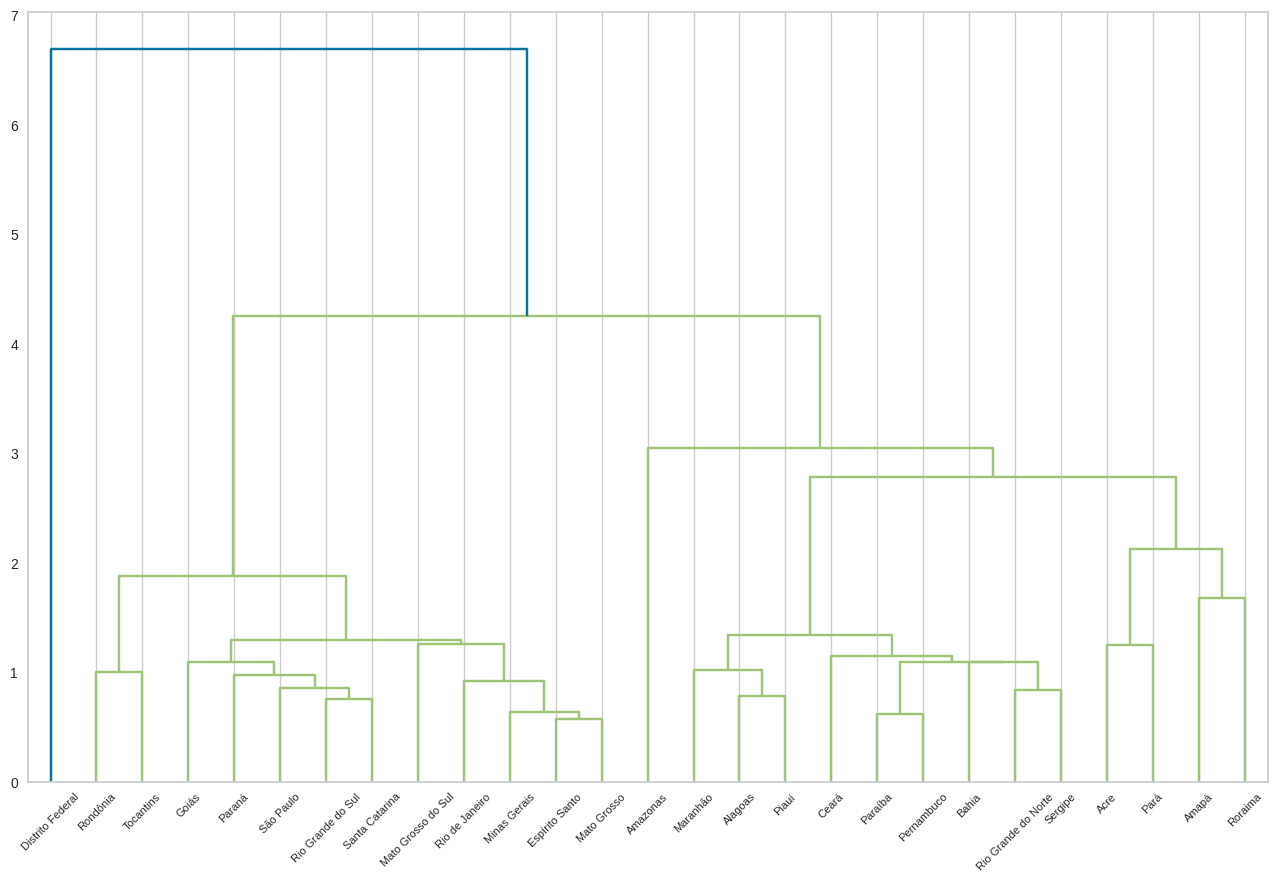

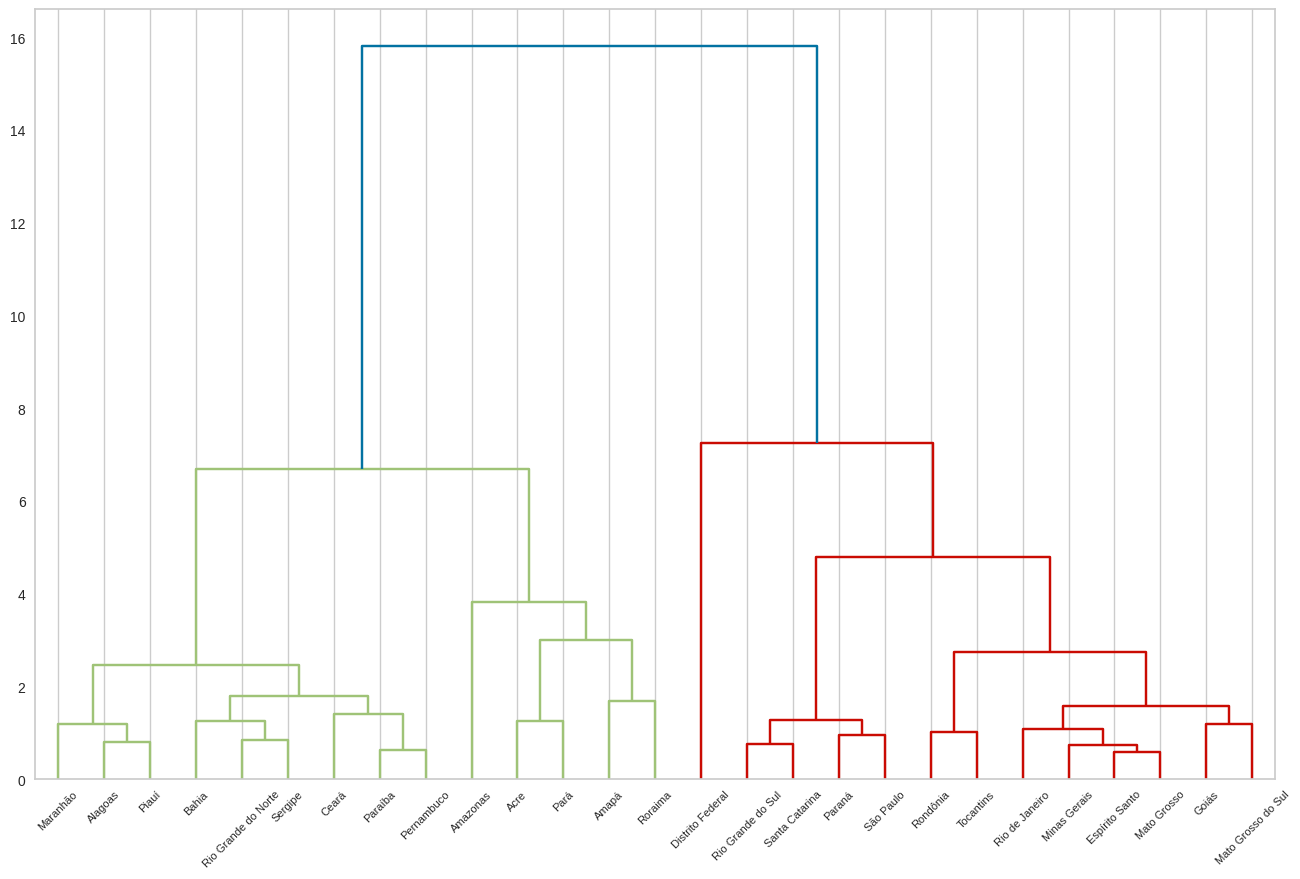

In [93]:
df2_scaled = df4.copy()
df2_scaled.iloc[:,:] = StandardScaler().fit_transform(df4)


methods = ['single', 'complete', 'average', 'weighted',
           'centroid', 'median', 'ward']

for method in methods:
    plot_dendogram(df2_scaled, method)

Aqui foram selecionados alguns  métodos de ligação em *methods* . Dentro todos os exibidos, escolhemos o método Ward. Então, criamos os clusters, escolhendo um total de 4 clusters.

In [94]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

n_clusters = 4
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
groups = cluster.fit_predict(df2_scaled)

#Estados por cluster
states = list(df2_scaled.index)
grouped_states_h = {i: [] for i in range(n_clusters)}
for state, group in zip(states, groups):
    grouped_states_h[group].append(state)
grouped_states_nh_hier = grouped_states_h

for gp, ctr in grouped_states_h.items():
    print(f'Cluster {gp}: {ctr}\n')

Cluster 0: ['Espírito Santo', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Santa Catarina', 'São Paulo', 'Tocantins']

Cluster 1: ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Roraima']

Cluster 2: ['Distrito Federal']

Cluster 3: ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']



Começamos importando alguma bibliotecas necessárias para realizar o agrupamento. AgglomerativeClustering e KMeans são algoritmos de clusterização da biblioteca sklearn. KElbowVisualizer e SilhouetteVisualizer são ferramentas da biblioteca yellowbrick que ajudam a determinar o número ideal de clusters e a avaliar a qualidade dos clusters, respectivamente.

Definimos o número de clusters desejados como 4. Utilizamos o algoritmo AgglomerativeClustering com o método de ligação 'ward' para realizar a clusterização hierárquica. O método fit_predict ajusta o modelo aos dados (df2_scaled) e retorna um array contendo os rótulos dos clusters para cada estado

Por fim, organizamos os estados de acordo com os clusters aos quais foram atribuídos. Criamos uma lista contendo os índices dos dados.

Incluimos os clusters no nosso dataframe. E partindo para uma melhor visualização:

In [95]:
df_scaled_uf_code['Cluster_k4_hierarquico'] = groups

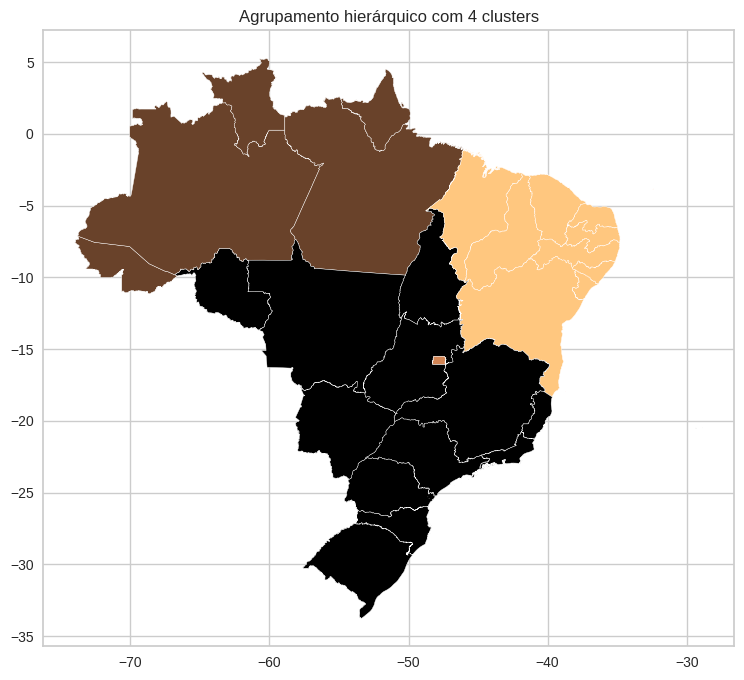

In [96]:
# Merge dos dois conjuntos
all_data = pd.merge(states_df, df_scaled_uf_code.reset_index(), how='left', left_on='code_state', right_on='UF')

# Plotando o mapa com os clusters
all_data.plot(column='Cluster_k4_hierarquico', figsize=(18, 8), cmap='copper')
plt.title("Agrupamento hierárquico com 4 clusters")
plt.show()

O agrupamento hierárquico se assemelha um pouco com a divisão macrorregional geoeconômica do Brasil, em que divide-se o território brasileiro em 3 áreas: Amazônia, Nordeste e Centro-Sul. Vemos que o DF encontra-se em um cluster separado, algo esperado, uma vez que este estado consiste em apenas uma cidade. Mais uma vez o Nordeste fica em apenas um cluster, e quase toda região Norte também. Essa recorrência de diferença entre regiões e agrupamentos intra-regiões nos mostra como as diferenças regionais socioeconômicas brasileiras são relevantes.


##6.2 Redução de dimensionalidade

###6.2.2 Análise de Componentes Principais (PCA)

A **Análise de Componentes Principais** (**PCA**) é uma técnica de redução de dimensionalidade usada em estatística e aprendizado de máquina para simplificar um conjunto de dados complexo, preservando ao máximo a variabilidade original. Ela é especialmente útil quando se trabalha com dados de alta dimensionalidade, ou seja, com muitas variáveis.

O PCA funciona projetando os dados em um espaço de dimensão inferior, de forma que as novas dimensões, conhecidas como **componentes principais**, sejam **combinações lineares das variáveis originais**. As componentes são ordenadas de forma que a primeiro componente principal captura a maior parte da variabilidade dos dados, a segundo componente principal captura a maior parte da variabilidade restante, e assim por diante.

Vamos realizar **duas** análises de componentes principais. A **primeira** utilizando a base toda (todas covariáveis), onde buscamos ter uma noção da redução máxima de dimensionalidade considerando-se todas variáveis explicativas. E uma **segunda** utilizando um bloco de variáveis selecionadas das quais já avaliamos a relevância e aplicaremos mais avaliações:

In [97]:
df_numerico = df.select_dtypes(include=['number'])
df3_scaled = df_numerico.copy()
df3_scaled.iloc[:,:] = StandardScaler().fit_transform(df_numerico)

y = df3_scaled['POB']
X = df3_scaled.drop('POB', axis = 1)
X.head()

ANO        UF   Codmun6   Codmun7   ESPVIDA    FECTOT     MORT1     MORT5  \
0    0  0.267337  0.300428  0.300430  1.906754 -1.769568 -1.365889 -1.436020   
1    0  0.267337  0.251466  0.251461  1.970176 -1.729806 -1.393915 -1.467436   
2    0  0.979510  0.967411  0.967413  1.589646 -1.908734 -1.182312 -1.283038   
3    0 -0.037880 -0.048504 -0.048499  1.190463 -1.610521 -1.103837 -1.119129   
4    0  0.979510  0.963957  0.963961  2.063443 -1.749687 -1.477996 -1.541195   

     RAZDEP   SOBRE40  ...    IDHM_R      PCA1      PCA2      PCA3      PCA4  \
0 -1.163988  1.599912  ...  3.076420  2.778274 -2.646041  0.460755  3.924365   
1  0.143522  1.671577  ...  2.555680  2.363334 -2.197728 -0.211832  3.057589   
2 -1.945141  1.313252  ...  2.816050  2.461679 -2.606758  1.002128  3.543771   
3 -1.519362 -0.534115  ...  2.890441  2.270040 -3.192596  0.855857  3.923060   
4 -1.878089  1.703428  ...  2.617672  2.432369 -1.929871  0.875867  2.587189   

       PCA5      PCA6      PCA7      PCA8      PCA9  
0  3.193981  0.412352 -2.293434  4.257019 -1.589657  
1  1.748828 -1.378956 -1.469540  2.605421 -1.064256  
2  2.107959  0.234720 -2.780381  3.415406 -1.912324  
3  1.929764  0.151251 -3.644854  3.444162 -0.239783  
4  2.131171  0.504936 -1.168162  2.999453 -0.892360  

[5 rows x 238 columns]

In [98]:
#Aplicação do PCA
import random
from sklearn.decomposition import PCA
random.seed(202)

pca = PCA(n_components = 20)
X_pca = pca.fit_transform(X)

variance_ratio = pca.explained_variance_ratio_
print('Proporção da Variância Explicada:')
for i, ratio in enumerate(variance_ratio):
    print(f'Componente Principal {i+1}: {ratio:.5f}')

pca.explained_variance_ratio_.sum()

Proporção da Variância Explicada:
Componente Principal 1: 0.33146
Componente Principal 2: 0.26468
Componente Principal 3: 0.05419
Componente Principal 4: 0.04909
Componente Principal 5: 0.03305
Componente Principal 6: 0.02440
Componente Principal 7: 0.02282
Componente Principal 8: 0.01652
Componente Principal 9: 0.01444
Componente Principal 10: 0.01423
Componente Principal 11: 0.00884
Componente Principal 12: 0.00846
Componente Principal 13: 0.00788
Componente Principal 14: 0.00694
Componente Principal 15: 0.00618
Componente Principal 16: 0.00569
Componente Principal 17: 0.00542
Componente Principal 18: 0.00494
Componente Principal 19: 0.00448
Componente Principal 20: 0.00447


0.8881552665348929

Com 20 componentes conseguimos explicar 88,66% da variância dos dados representando uma possível redução de 10x em relação ao número total de covariáveis. A ideia aqui é mostrar que com um número reduzido de componentes conseguimos representar uma porcentagem bem alta dos dados

Agora, sabendo que existe muita redundância nos dados, vamos aplicar o PCA para um grupo menor de variáveis já selecionadas:

In [99]:
df_numerico = df.select_dtypes(include=['number'])
df5_scaled = df_numerico.copy()
df5_scaled.iloc[:,:] = StandardScaler().fit_transform(df_numerico)

variables = ['UF', 'MORT1', 'IDHM','T_RMAXIDOSO','E_ANOSESTUDO', 'GINI', 'T_AGUA', 'ESPVIDA','P_FORMAL','T_ANALF25M','T_NESTUDA_NTRAB_MMEIO']

y = df3_scaled['POB']
X = df[variables]
X.head()

UF  MORT1   IDHM  T_RMAXIDOSO  E_ANOSESTUDO  GINI  T_AGUA  ESPVIDA  \
0  35   9.50  0.862         0.75         11.04  0.54   99.99    78.20   
1  35   9.30  0.854         0.55         10.83  0.54  100.00    78.37   
2  42  10.81  0.847         0.38         10.79  0.54   96.35    77.35   
3  32  11.37  0.845         0.85         10.04  0.60   99.92    76.28   
4  42   8.70  0.845         0.31         10.47  0.52   99.03    78.62   

   P_FORMAL  T_ANALF25M  T_NESTUDA_NTRAB_MMEIO  
0     75.02        1.76                   1.16  
1     68.33        1.61                   3.56  
2     75.24        2.47                   2.60  
3     76.32        3.59                   5.15  
4     71.87        1.80                   1.76

In [100]:
#Aplicação do PCA
import random
from sklearn.decomposition import PCA
random.seed(202)

pca = PCA(n_components = 8)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_.sum()

0.9996268005682466

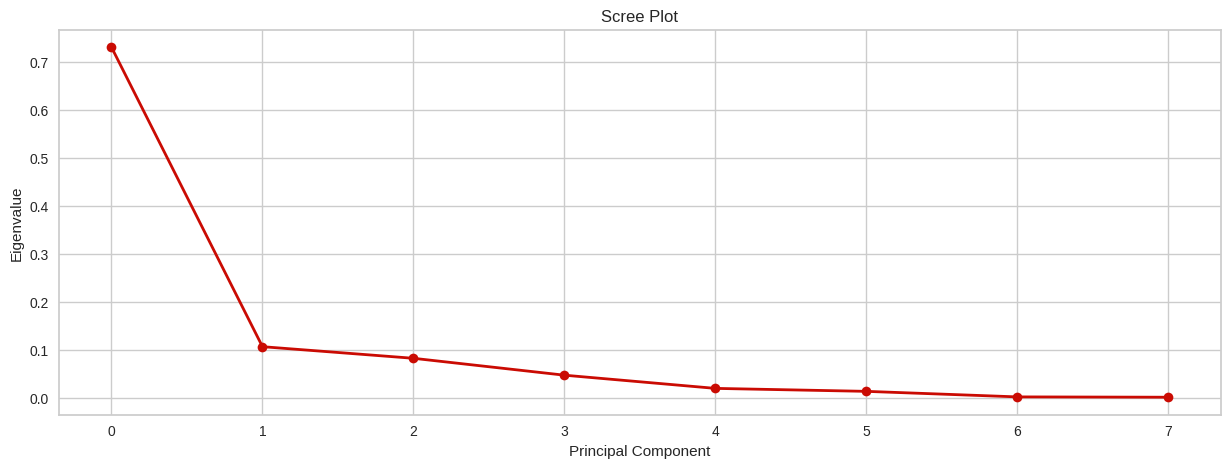

Proporção da Variância Explicada:
Componente Principal 1: 0.73016
Componente Principal 2: 0.10615
Componente Principal 3: 0.08195
Componente Principal 4: 0.04674
Componente Principal 5: 0.01924
Componente Principal 6: 0.01305
Componente Principal 7: 0.00152
Componente Principal 8: 0.00082


In [101]:
variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(15,5))

plt.plot(variance_ratio,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

print('Proporção da Variância Explicada:')
for i, ratio in enumerate(variance_ratio):
    print(f'Componente Principal {i+1}: {ratio:.5f}')

A análise do scree plot acima e a soma da variância explicada indicam que 3 componentes principais serão suficientes para nossa análise.

In [102]:
# Obtendo os pesos das variáveis na primeira componente principal
weights = pca.components_[0]

# Imprimindo os pesos das variáveis na primeira componente principal
print('Pesos das Variáveis na Primeira Componente Principal:')
print('\n')
df_pesos = pd.DataFrame(columns = ['variavel', 'peso'])
for i, var in enumerate(X.columns):
    df_pesos.loc[i] = [var, round(weights[i],4)]

display(df_pesos.sort_values('peso', ascending = False))

Pesos das Variáveis na Primeira Componente Principal:




variavel    peso
9              T_ANALF25M  0.4281
10  T_NESTUDA_NTRAB_MMEIO  0.2671
1                   MORT1  0.2148
3             T_RMAXIDOSO  0.0749
5                    GINI  0.0012
2                    IDHM -0.0025
4            E_ANOSESTUDO -0.0218
7                 ESPVIDA -0.0819
0                      UF -0.2330
6                  T_AGUA -0.4270
8                P_FORMAL -0.6707

Avaliando o peso de algumas covariáveis na primeira componente principal podemos ver uma alta relevância de pelo menos três variáveis explicativas:

1) T_ANALF25M: Razão entre a população de 25 anos ou mais de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária

2) P_FORMAL: Grau de formalização dos ocupados - 18 anos ou mais

3) T_AGUA: % da população em domicílios com água encanada

Agora relacionando as **3 componentes principais** com nossa variável resposta **POB**

In [103]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

data_principal = pd.DataFrame({'Componente_Principal_1': X_pca[:, 0],
                     'Componente_Principal_2': X_pca[:, 1],
                     'Componente_Principal_3': X_pca[:, 2],
                     'POB': y})

# Modelo de regressão linear com ANOVA
modelo = ols('POB ~ Componente_Principal_1 + Componente_Principal_2 + Componente_Principal_3', data=data_principal).fit()

# Análise de Variância (ANOVA)
anova_tabela = sm.stats.anova_lm(modelo, typ=2)
anova_tabela

sum_sq      df             F         PR(>F)
Componente_Principal_1  4767.425057     1.0  44598.263357   0.000000e+00
Componente_Principal_2    34.990634     1.0    327.330056   3.890412e-71
Componente_Principal_3   168.129531     1.0   1572.816562  3.920733e-303
Residual                 594.454778  5561.0           NaN            NaN

Neste trecho, criamos um DataFrame chamado data_principal, que contém as três primeiras componentes principais resultantes da Análise de Componentes Principais (PCA), além da variável resposta, POB. Utilizamos a função ols para ajustar um modelo de regressão linear onde a variável resposta POB é explicada pelas três componentes principais. O método fit() ajusta o modelo aos dados presentes no DataFrame data_principal.

Com o modelo ajustado, utilizamos a função anova_lm de statsmodels para realizar uma Análise de Variância (ANOVA) do modelo ajustado. A ANOVA é usada para avaliar a significância dos preditores no modelo. A tabela resultante é armazenada na variável anova_tabela, que contém informações sobre a significância estatística de cada componente principal.

Através da geração de uma tabela ANOVA, vemos que as componentes principais 1, 2 e 3 são estatitsticamente significativas, com 5% de significância. As três componentes apresentam valor-p. Portanto, há uma relação significativa entre os componentes principais e a variável dependente e acreditamos que um modelo com as três componentes pode ser aplicado.

# 7. Modelo de Regressão Beta utilizando a função 'minimize' do SciPy

A ideia geral da regressão beta é usar uma função de ligação g (por exemplo, o logit) para mapear do nosso espaço limitado [0,1] para os números reais. Lá realizaremos uma regressão assumindo que nossos dados são distribuídos beta, maximizando a probabilidade correspondente. Para interpretar os coeficientes em nosso espaço limitado [0,1], precisamos mapear os dados usando a função exit. Como realizamos a regressão no espaço dos números reais e só depois mapeamos de volta ao nosso espaço limitado, podemos garantir que quaisquer previsões do nosso modelo também serão limitadas ao intervalo [0,1].

Um papel crucial na execução de uma regressão em dados limitados é desempenhado pela função de ligação g que mapeia do intervalo limitado [0,1] para os números reais:
g: [0,1] → R.

Uma função proeminente que faz esse trabalho é a função logit. Podemos fazer o oposto usando o inverso do logit, que é chamado de função expit ou sigmóide.

A função logit é íngreme nas bordas do intervalo [0,1] e, portanto, mapeia valores próximos de 1 para grandes números reais (por exemplo, logit(0,99) = 4,60). A função exit, no entanto, é plana para valores muito altos ou muito baixos, aproximando-se lentamente de 0 e 1 (por exemplo, expit(5) = 0,993).

Além das funções logit e exit trabalharemos com a distribuição beta. A distribuição beta é especialmente útil na modelagem de probabilidades, pois funciona no intervalo [0,1]. A distribuição beta assume dois parâmetros de forma α e β, e é definida da seguinte forma,

$$ f_X(x:\alpha,\beta) = \frac{\Gamma(\alpha +
\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1 - x)^{\beta - 1} $$

Porém, iremos utilizá-lo com uma parametrização ligeiramente diferente substituindo µ=α/(α+β) e ϕ=α+β. Neste caso µ pode ser interpretado como a média da distribuição e ϕ como sua precisão. [11]

Importante mencionar que o código a seguir realiza a otimização da função de verossimilhança para uma regressão beta utilizando o método de otimização Nelder-Mead.

A função minimize realiza a minimização de uma função objetivo sujeita a restrições, utilizando diferentes métodos de otimização. Neste caso, estamos minimizando a função logLikelihood.

A função logLikelihood de verossimilhança está sendo maximizada ou minimizada. Neste contexto, é a função de verossimilhança para uma regressão beta.

O method='Nelder-Mead' especifica o método de otimização a ser utilizado. Nelder-Mead é um método direto (ou sem derivadas) que é adequado para otimização de funções não suaves ou não diferenciáveis.

Por fim, options={'maxiter': 10000} define opções adicionais para o algoritmo de otimização. Neste caso, estamos limitando o número máximo de iterações para 10000.

No geral, o objetivo desta otimização é encontrar os valores ótimos para os parâmetros do modelo que maximizam a verossimilhança dos dados observados, o que, por sua vez, resulta em um modelo de regressão beta que se ajusta melhor aos dados. O método de Nelder-Mead é um algoritmo popular para otimização de funções em problemas onde a função objetivo não é suave ou diferenciável. [15]

Começamos dividindo os dados em treinamento e teste.

In [104]:
from sklearn.model_selection import train_test_split

# Divide os dados normalizados em conjuntos de treinamento e teste
X_train_norm, X_test_norm, y_train, y_test = train_test_split(dados_normalizados_df, df['POB'], test_size=0.2, random_state=42)

## 7.1. Modelo de Regressão Beta considerando a seleção de variáveis feita pelo LASSO.

In [105]:
import numpy as np
from scipy.special import loggamma, expit
from scipy.optimize import minimize
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Define the log likelihood function for beta regression
def logLikelihood(params, y, X):
    b = np.array(params[:-1])  # beta parameters of the regression model
    phi = params[-1]           # phi parameter
    mu = expit(np.dot(X, b))   # link function

    eps = 1e-6  # safety epsilon to avoid inf in log functions
    res = -np.sum(loggamma(phi + eps) - loggamma(mu * phi + eps)
                   - loggamma((1 - mu) * phi + eps)
                   + (mu * phi - 1) * np.log(y + eps)
                   + ((1 - mu) * phi - 1) * np.log(1 - y + eps))

    return res

# Define your data (X and y)

# Train the Lasso model for feature selection on the normalized training data
lasso_model = Lasso(alpha=3e-05) # Utilizamos alpha=3e-05
lasso_model.fit(X_train_norm, y_train)

# Select features based on the Lasso coefficients
selector = SelectFromModel(lasso_model, prefit=True)
X_train_selected = selector.transform(X_train_norm)
X_test_selected = selector.transform(X_test_norm)

# Initial parameters for optimization
phi = 0.5
b0 = 0.5
x0 = np.array([b0] * X_train_selected.shape[1] + [phi])

# Perform optimization for beta regression
res = minimize(logLikelihood, x0=x0, args=(y_train, X_train_selected),
               bounds=[(None, None)] * X_train_selected.shape[1] + [(0, None)],
               method='Nelder-Mead', options={'maxiter': 10000})

# Extract the optimal parameters
b = res.x[:-1]  # Optimal regression parameters
phi = res.x[-1]  # Phi parameter

# Print the results
print("Optimal beta parameters:", b)
print("Optimal phi parameter:", phi)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.790e-02, tolerance: 1.420e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Optimal beta parameters: [ 3.25229189e-01  2.41580038e+00  7.05987095e-01  8.00731927e-02
  2.59944160e+00 -1.34765680e+00 -1.65097580e+00  1.08202975e+00
 -1.91232693e-02  5.91944317e-01 -2.56060815e+00  1.90003556e+00
  5.40185054e-01  1.67544334e-01  1.85247787e+00  1.56742998e-01
  1.53782921e-02  3.21263349e-01 -2.35894160e+00  3.98435451e-01
  3.65110493e+00  2.48621261e+00  8.52299460e-01 -1.20570993e-01
  2.22944727e+00  2.14270880e+00  9.82345689e-01  9.39770134e-01
  9.10179677e-01 -7.46362748e+00 -1.01278255e+00 -2.56603121e+00
  8.39998134e-01  1.16240289e+00  2.86449201e+00 -5.08105172e-01
  3.38853777e-01  1.83636436e+00  1.55292759e+00  6.79392050e-04
  2.72165140e+00  2.74930141e+00  2.17682946e+00  2.35894654e+00
 -9.06833784e+00 -7.15793127e-01  9.74609092e-01  4.17012727e-01
 -8.24300285e-01  1.63285618e+00 -2.76552254e+00  7.04214288e-01
 -6.14690825e-01  1.66926276e+00  1.79924112e+00  3.48376750e+00
 -2.81118258e+00 -7.86698112e-01  2.47088122e-01  2.21896277e+00


O parâmetro phi é uma medida de dispersão para a distribuição beta. Um valor alto de phi indica que os dados têm baixa dispersão em relação à distribuição beta. Aqui, o valor de phi é de aproximadamente 7.82.

Portanto, quando dizemos que o "Optimal phi parameter" é 7.82, isso significa que estamos modelando uma distribuição beta com uma precisão relativamente alta, o que sugere que os dados estão mais concentrados ao redor da média.

In [106]:
# Print the final model
print("Final Model:")
print("Beta Parameters:")
for i, beta in enumerate(b):
    print(f"Beta_{i+1}: {beta}")

print(f"Phi Parameter: {phi}")

Final Model:
Beta Parameters:
Beta_1: 0.32522918913504406
Beta_2: 2.4158003777672175
Beta_3: 0.7059870945077127
Beta_4: 0.08007319273347316
Beta_5: 2.5994416028975866
Beta_6: -1.3476568029929372
Beta_7: -1.6509757956416187
Beta_8: 1.0820297512796508
Beta_9: -0.01912326931670391
Beta_10: 0.5919443170280001
Beta_11: -2.5606081464789465
Beta_12: 1.900035561330779
Beta_13: 0.5401850542129103
Beta_14: 0.1675443337886915
Beta_15: 1.8524778673820883
Beta_16: 0.1567429984478026
Beta_17: 0.015378292149286488
Beta_18: 0.32126334906124554
Beta_19: -2.3589416037858326
Beta_20: 0.3984354506977119
Beta_21: 3.6511049305596393
Beta_22: 2.486212609498307
Beta_23: 0.8522994600986729
Beta_24: -0.12057099257701169
Beta_25: 2.2294472705671637
Beta_26: 2.1427088028211827
Beta_27: 0.9823456889805016
Beta_28: 0.9397701340905293
Beta_29: 0.910179676744199
Beta_30: -7.4636274773076465
Beta_31: -1.012782547265021
Beta_32: -2.5660312059502006
Beta_33: 0.839998133695596
Beta_34: 1.162402893210014
Beta_35: 2.864492

### 7.1.1. Verificação do ajuste do modelo

Podemos verificar o ajuste do modelo ao visualizar as previsões do modelo em comparação com os valores reais da variável de resposta, o que é feito a seguir.

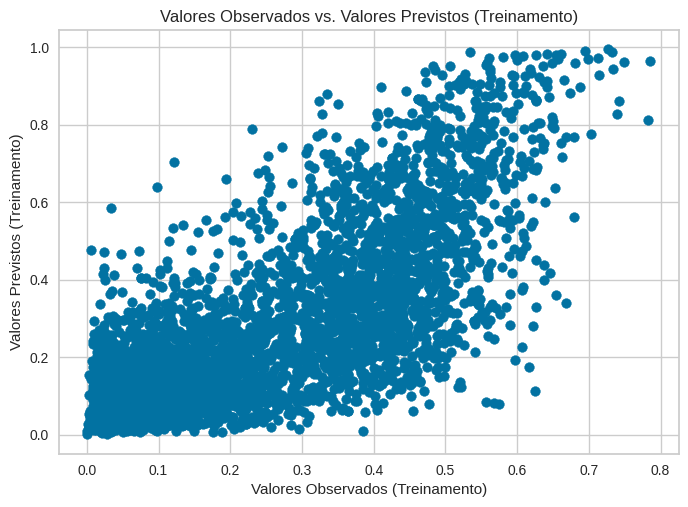

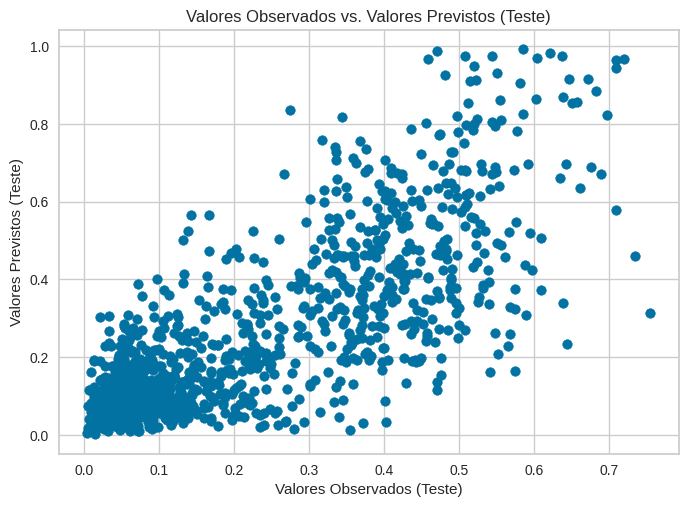

In [107]:
import matplotlib.pyplot as plt

# Calcular as previsões do modelo nos dados de treinamento
mu_predicted_train = expit(np.dot(X_train_selected, b))
y_predicted_train = mu_predicted_train * phi / (mu_predicted_train * phi + (1 - mu_predicted_train) * phi)

# Plotar valores observados versus valores previstos nos dados de treinamento
plt.scatter(y_train, y_predicted_train)
plt.xlabel("Valores Observados (Treinamento)")
plt.ylabel("Valores Previstos (Treinamento)")
plt.title("Valores Observados vs. Valores Previstos (Treinamento)")
plt.show()

# Calcular as previsões do modelo nos dados de teste
mu_predicted_test = expit(np.dot(X_test_selected, b))
y_predicted_test = mu_predicted_test * phi / (mu_predicted_test * phi + (1 - mu_predicted_test) * phi)

# Plotar valores observados versus valores previstos nos dados de teste
plt.scatter(y_test, y_predicted_test)
plt.xlabel("Valores Observados (Teste)")
plt.ylabel("Valores Previstos (Teste)")
plt.title("Valores Observados vs. Valores Previstos (Teste)")
plt.show()

**Deviance Residuals:** Os resíduos de deviance são calculados como a diferença entre a função de log-verossimilhança para o modelo completo e o modelo nulo. Valores menores indicam um melhor ajuste.

In [108]:
# Calcular os resíduos de deviance nos dados de treinamento
deviance_residuals_train = 2 * (logLikelihood(res.x, y_train, X_train_selected) - logLikelihood([0] * (X_train_selected.shape[1] + 1), y_train, np.ones_like(X_train_selected)))

# Calcular os resíduos de deviance nos dados de teste
deviance_residuals_test = 2 * (logLikelihood(res.x, y_test, X_test_selected) - logLikelihood([0] * (X_test_selected.shape[1] + 1), y_test, np.ones_like(X_test_selected)))

print("Deviance Residuals (Treinamento):", deviance_residuals_train)
print("Deviance Residuals (Teste):", deviance_residuals_test)

Deviance Residuals (Treinamento): -109281.57824990162
Deviance Residuals (Teste): -27287.38557006078


Os resíduos de deviance são uma medida de ajuste do modelo, medindo o quanto os valores observados diferem dos valores previstos pelo modelo. Um valor negativo indica que o modelo está superestimando os resultados.

**Pseudo R-squared:** Existem várias maneiras de calcular um R-quadrado ajustado para modelos de regressão beta. Uma abordagem comum é usar o pseudo R-quadrado de Cox-Snell:

In [109]:
# Calcular os resíduos de deviance nos dados de teste
deviance_residuals_test = 2 * (logLikelihood(res.x, y_test, X_test_selected) - logLikelihood([0] * (X_test_selected.shape[1] + 1), y_test, np.ones_like(X_test_selected)))

# Calcular o pseudo R-squared (Cox-Snell)
pseudo_r_squared = 1 - np.exp((2 / len(y_test)) * deviance_residuals_test.sum())

print("Pseudo R-squared (Cox-Snell):", pseudo_r_squared)

Pseudo R-squared (Cox-Snell): 1.0


Uma pseudo R-squared de 1.0 indica um ajuste perfeito do modelo aos dados.

**Likelihood Ratio Test:** O teste da razão de verossimilhança compara a verossimilhança do modelo ajustado com a do modelo nulo. Um valor p baixo sugere que o modelo ajustado é estatisticamente significativo.

Para calcular o valor p, precisamos comparar a diferença nas funções de verossimilhança com a distribuição qui-quadrado:

In [110]:
likelihood_ratio_test = -2 * (logLikelihood(res.x, y_train, X_train_selected) - logLikelihood([0] * (X_train_selected.shape[1] + 1), y_train, np.ones_like(X_train_selected)))
p_value = 1 - stats.chi2.cdf(likelihood_ratio_test, df=X_train_selected.shape[1])
print("Likelihood Ratio Test p-value:", p_value)

Likelihood Ratio Test p-value: 0.0


O valor p do teste de razão de verossimilhança, que testa a significância global do modelo. Um valor de p próximo de zero indica que o modelo é significativo.

Em seguida, calculamos o coeficiente de determinação (R²), o erro quadrático médio (MSE) e o erro absoluto médio (MAE).

O R² indica a proporção da variabilidade na variável dependente que é explicada pelo modelo. O MSE e o MAE indicam a média dos quadrados dos erros ou a média dos valores absolutos dos erros entre as previsões do modelo e os valores reais, respectivamente. Quanto mais próximo de 1 o R² e quanto menores o MSE e o MAE, melhor é o ajuste do modelo aos dados.

In [111]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predictions on the test set
y_pred = expit(np.dot(X_test_selected, b))  # Using the link function to transform predictions

# Calculating R²
r2 = r2_score(y_test, y_pred)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)

# Calculating MAE
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)

R²: 0.37688211982848474
MSE: 0.020477912713357596
MAE: 0.10574122614558328


Um R² de aproximadamente 0.38 indica que o modelo é capaz de explicar cerca de 38% da variabilidade dos dados, o que sugere um ajuste moderado.

No caso apresentado, um MSE de aproximadamente 0.02 indica que, em média, o modelo erra em torno de 0.02 unidades quadradas em suas previsões. Um MSE baixo sugere que o modelo tem um bom desempenho em fazer previsões precisas.

Um MAE de aproximadamente 0.1057 indica que, em média, o modelo erra cerca de 0.1057 unidades em suas previsões. Um MAE mais baixo sugere que o modelo tem um desempenho melhor em fazer previsões próximas aos valores reais.

Em resumo, o modelo parece ter um ajuste moderado aos dados, explicando cerca de 38% da variabilidade dos dados, com erros de previsão relativamente baixos (MSE e MAE baixos).

## 7.2. Modelo de Regressão Beta considerando a seleção de variáveis feita pelo Ridge


Neste caso, realizamos a otimização para a regressão beta com mais iterações e usando o método Nelder-Mead para melhorar o processo de otimização.

In [120]:
import numpy as np
from scipy.special import loggamma, expit
from scipy.optimize import minimize
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
from scipy.optimize import minimize

# Definir uma semente aleatória
np.random.seed(42)

# Função de probabilidade logarítmica para a regressão beta
def logLikelihood(params, y, X):
    b = params[:-1]  # parâmetros beta do modelo de regressão
    phi = params[-1]  # o parâmetro phi
    mu = expit(np.dot(X, b))

    eps = 1e-6  # usado para segurança das funções gamma e log evitando inf
    res = -np.sum(loggamma(phi + eps)
                   - loggamma(mu*phi + eps)
                   - loggamma((1 - mu)*phi + eps)
                   + (mu*phi - 1)*np.log(y + eps)
                   + ((1 - mu)*phi - 1)*np.log(1 - y + eps))

    return res

# Treine o modelo Ridge para seleção de recursos
ridge_model = Ridge()
ridge_model.fit(X_train_norm, y_train)

# Selecione os recursos com base nos coeficientes Ridge
selector = SelectFromModel(ridge_model, prefit=True)
X_train_selected = selector.transform(X_train_norm)
X_test_selected = selector.transform(X_test_norm)

# Inicializar os parâmetros
phi_init = 0.5
b0_init = 0.5
x0 = np.array([b0_init] * X_train_selected.shape[1] + [phi_init])

# Realizar a otimização para a regressão beta com mais iterações e usando o método Nelder-Mead
res = minimize(logLikelihood, x0=x0, args=(y_train, X_train_selected),
               bounds=[(None, None)] * X_train_selected.shape[1] + [(0, None)],
               method='Nelder-Mead', options={'maxiter': 10000})

# Extrair os parâmetros ótimos
b = res.x[:-1]  # parâmetros de regressão ótimos
phi = res.x[-1]  # parâmetro phi

# Imprimir os resultados
print("Parâmetros beta ótimos:", b)
print("Parâmetro phi ótimo:", phi)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Parâmetros beta ótimos: [-8.10685221e-01  2.37592310e+00 -9.22371941e-01 -7.64169510e-01
  3.96319553e+00 -3.83598267e+00  3.47716003e+00  2.09427978e+00
  4.75984341e+00 -1.85655776e+00  1.96580207e+00  6.05203672e-01
  1.36790587e+00  4.19726857e+00  3.53245125e+00  4.31761088e+00
 -4.15306714e+00 -3.62970658e+00  2.46252546e+00 -4.91966051e+00
 -3.89333447e+00 -2.77592135e+00 -2.07529671e+00 -4.53485260e+00
 -6.74350957e-01  1.70685270e+00  1.15184863e+00 -2.09215302e-01
  2.45812974e+00 -6.05170783e-01  7.08291100e+00  9.18289493e-01
 -9.16851947e-01 -4.95856584e+00 -3.27131166e-01  2.76941114e+00
  1.89828701e+00 -4.49259895e+00 -2.04581404e+00  1.55943951e+00
 -2.96853060e-02 -2.85844982e-01  2.88543565e+00 -3.35822236e-01
  4.78081759e-03  3.75003930e+00  1.45930922e+00  3.07617657e-01
  1.07368610e+00 -2.06923808e-01  6.75726775e-01 -1.24988933e+00
  2.28322940e+00 -1.97561291e-01  1.18005829e+00]
Parâmetro phi ótimo: 6.732227635669322


O parâmetro phi é uma medida de dispersão para a distribuição beta. Quanto maior o valor de phi, menor a dispersão. Aqui, phi é de aproximadamente 6.73, menor do que o caso anterior.

Portanto, quando dizemos que o "Optimal phi parameter" é 6.73, isso significa que estamos modelando uma distribuição beta com uma precisão relativamente alta, o que sugere que os dados estão mais concentrados ao redor da média.

In [113]:
# Print the final model
print("Final Model:")
print("Beta Parameters:")
for i, beta in enumerate(b):
    print(f"Beta_{i+1}: {beta}")

print(f"Phi Parameter: {phi}")

Final Model:
Beta Parameters:
Beta_1: -0.8106852210438115
Beta_2: 2.3759231042134163
Beta_3: -0.9223719409452653
Beta_4: -0.7641695104992945
Beta_5: 3.9631955301267006
Beta_6: -3.8359826728513617
Beta_7: 3.4771600341669187
Beta_8: 2.0942797809602816
Beta_9: 4.759843410110053
Beta_10: -1.8565577647620883
Beta_11: 1.965802069420644
Beta_12: 0.6052036723103249
Beta_13: 1.3679058708678975
Beta_14: 4.197268572987949
Beta_15: 3.532451251163647
Beta_16: 4.317610881617712
Beta_17: -4.153067143906475
Beta_18: -3.6297065788440976
Beta_19: 2.462525463796821
Beta_20: -4.919660509875207
Beta_21: -3.893334473767154
Beta_22: -2.7759213536158587
Beta_23: -2.0752967139933687
Beta_24: -4.534852595411233
Beta_25: -0.674350957054554
Beta_26: 1.7068527014982044
Beta_27: 1.151848630781935
Beta_28: -0.20921530166437616
Beta_29: 2.4581297415383045
Beta_30: -0.6051707834280209
Beta_31: 7.082910995638997
Beta_32: 0.9182894928230849
Beta_33: -0.9168519467511341
Beta_34: -4.958565835571312
Beta_35: -0.32713116643

### 7.2.1.Verificação do ajuste do modelo

Podemos verificar o ajuste do modelo ao visualizar as previsões do modelo em comparação com os valores reais da variável de resposta, o que é feito a seguir.

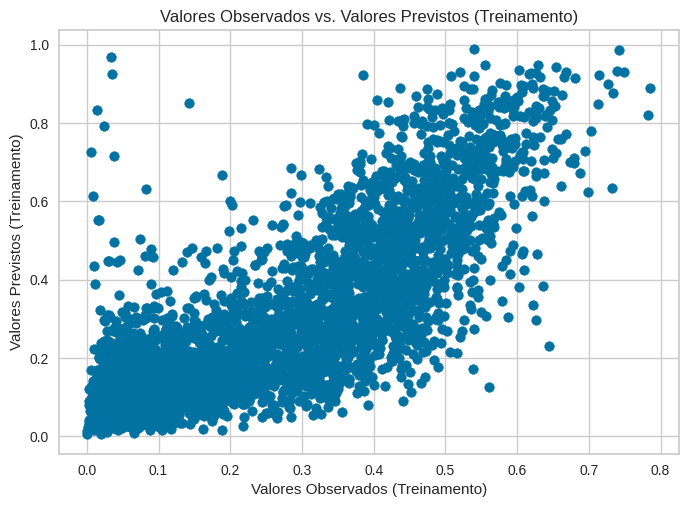

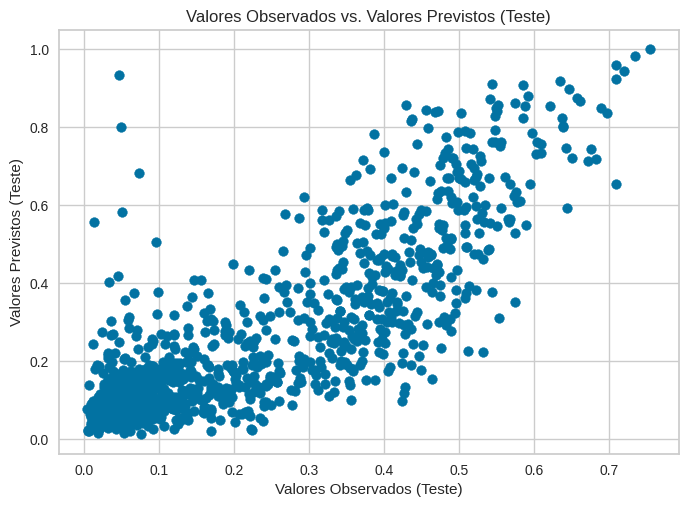

In [114]:
import matplotlib.pyplot as plt

# Calcular as previsões do modelo nos dados de treinamento
mu_predicted_train = expit(np.dot(X_train_selected, b))
y_predicted_train = mu_predicted_train * phi / (mu_predicted_train * phi + (1 - mu_predicted_train) * phi)

# Plotar valores observados versus valores previstos nos dados de treinamento
plt.scatter(y_train, y_predicted_train)
plt.xlabel("Valores Observados (Treinamento)")
plt.ylabel("Valores Previstos (Treinamento)")
plt.title("Valores Observados vs. Valores Previstos (Treinamento)")
plt.show()

# Calcular as previsões do modelo nos dados de teste
mu_predicted_test = expit(np.dot(X_test_selected, b))
y_predicted_test = mu_predicted_test * phi / (mu_predicted_test * phi + (1 - mu_predicted_test) * phi)

# Plotar valores observados versus valores previstos nos dados de teste
plt.scatter(y_test, y_predicted_test)
plt.xlabel("Valores Observados (Teste)")
plt.ylabel("Valores Previstos (Teste)")
plt.title("Valores Observados vs. Valores Previstos (Teste)")
plt.show()

**Deviance Residuals:** Os resíduos de deviance são calculados como a diferença entre a função de log-verossimilhança para o modelo completo e o modelo nulo. Valores menores indicam um melhor ajuste.

In [115]:
# Calcular os resíduos de deviance nos dados de treinamento
deviance_residuals_train = 2 * (logLikelihood(res.x, y_train, X_train_selected) - logLikelihood([0] * (X_train_selected.shape[1] + 1), y_train, np.ones_like(X_train_selected)))

# Calcular os resíduos de deviance nos dados de teste
deviance_residuals_test = 2 * (logLikelihood(res.x, y_test, X_test_selected) - logLikelihood([0] * (X_test_selected.shape[1] + 1), y_test, np.ones_like(X_test_selected)))

print("Deviance Residuals (Treinamento):", deviance_residuals_train)
print("Deviance Residuals (Teste):", deviance_residuals_test)

Deviance Residuals (Treinamento): -110245.48228282016
Deviance Residuals (Teste): -27471.773740490702


Os resíduos de deviance são uma medida de ajuste do modelo, medindo o quanto os valores observados diferem dos valores previstos pelo modelo. Um valor negativo indica que o modelo está superestimando os resultados.

**Pseudo R-squared:** Existem várias maneiras de calcular um R-quadrado ajustado para modelos de regressão beta. Uma abordagem comum é usar o pseudo R-quadrado de Cox-Snell:

In [116]:
# Calcular os resíduos de deviance nos dados de teste
deviance_residuals_test = 2 * (logLikelihood(res.x, y_test, X_test_selected) - logLikelihood([0] * (X_test_selected.shape[1] + 1), y_test, np.ones_like(X_test_selected)))

# Calcular o pseudo R-squared (Cox-Snell)
pseudo_r_squared = 1 - np.exp((2 / len(y_test)) * deviance_residuals_test.sum())

print("Pseudo R-squared (Cox-Snell):", pseudo_r_squared)

Pseudo R-squared (Cox-Snell): 1.0


**Likelihood Ratio Test:** O teste da razão de verossimilhança compara a verossimilhança do modelo ajustado com a do modelo nulo. Um valor p baixo sugere que o modelo ajustado é estatisticamente significativo.

Para calcular o valor p, precisamos comparar a diferença nas funções de verossimilhança com a distribuição qui-quadrado:

In [117]:
likelihood_ratio_test = -2 * (logLikelihood(res.x, y_train, X_train_selected) - logLikelihood([0] * (X_train_selected.shape[1] + 1), y_train, np.ones_like(X_train_selected)))
p_value = 1 - stats.chi2.cdf(likelihood_ratio_test, df=X_train_selected.shape[1])
print("Likelihood Ratio Test p-value:", p_value)

Likelihood Ratio Test p-value: 0.0


Em seguida, calculamos o coeficiente de determinação (R²), o erro quadrático médio (MSE) e o erro absoluto médio (MAE).

O R² indica a proporção da variabilidade na variável dependente que é explicada pelo modelo. O MSE e o MAE indicam a média dos quadrados dos erros ou a média dos valores absolutos dos erros entre as previsões do modelo e os valores reais, respectivamente. Quanto mais próximo de 1 o R² e quanto menores o MSE e o MAE, melhor é o ajuste do modelo aos dados.

In [118]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Previsões no conjunto de teste
mu_pred = expit(np.dot(X_test_selected, b))  # Usando a função de ligação para transformar as previsões
y_pred = mu_pred * phi / (mu_pred * phi + (1 - mu_pred) * phi)  # Ajustando as previsões para a distribuição beta

# Calculando R²
r2 = r2_score(y_test, y_pred)

# Calculando MSE
mse = mean_squared_error(y_test, y_pred)

# Calculando MAE
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)

R²: 0.49533450386255873
MSE: 0.016585137914035184
MAE: 0.09309287248651231


Um R² de aproximadamente 0.5 indica que o modelo é capaz de explicar cerca de 50% da variabilidade dos dados.

Um MSE de aproximadamente 0.016 indica que o modelo tem um bom desempenho em fazer previsões precisas, com erros quadráticos médios relativamente baixos.

Um MAE de aproximadamente 0.093 indica que o modelo tem um bom desempenho em fazer previsões próximas aos valores reais, com erros absolutos médios relativamente baixos.

Em resumo, os resultados sugerem que o modelo apresenta um ajuste razoavelmente bom aos dados, explicando cerca de 55% da variabilidade dos dados e fazendo previsões precisas com erros relativamente baixos, podemos pontuar também que este modelo utilizando regularização Ridge performou melhor do que o modelo que utilizou regularização Lasso.

## 7.3. Modelo de Regressão Beta considerando a seleção de variáveis feita pelo Elastic net.

In [121]:
import numpy as np
from scipy.special import loggamma, expit
from scipy.optimize import minimize
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel

# Define a função de probabilidade logarítmica para a regressão beta
def log_likelihood(params, y, X):
    b = params[:-1]                   # Parâmetros beta do modelo de regressão
    phi = params[-1]                  # Parâmetro phi
    mu = expit(np.dot(X, b))
    eps = 1e-6                        # Epsilon para evitar problemas numéricos

    res = -np.sum(loggamma(phi + eps)
                   - loggamma(mu*phi + eps)
                   - loggamma((1 - mu)*phi + eps)
                   + (mu*phi - 1)*np.log(y + eps)
                   + ((1 - mu)*phi - 1)*np.log(1 - y + eps))

    return res

# Treine o modelo Elastic Net para seleção de recursos
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.2)
elastic_net_model.fit(X_train_norm, y_train)

# Selecione os recursos com base nos coeficientes Elastic Net
selector = SelectFromModel(elastic_net_model, prefit=True)
X_train_selected = selector.transform(X_train_norm)
X_test_selected = selector.transform(X_test_norm)

# Parâmetros iniciais para a otimização da regressão beta
phi_init = 0.5
b0_init = 0.5
x0 = np.array([b0_init] * X_train_selected.shape[1] + [phi_init])

# Realize a otimização para a regressão beta
res = minimize(log_likelihood, x0=x0, args=(y_train, X_train_selected),
               bounds=[(None, None)] * X_train_selected.shape[1] + [(0, None)],
               method='Nelder-Mead', options={'maxiter': 10000})

# Extrair os parâmetros ótimos
b = res.x[:-1]  # Parâmetros de regressão ótimos
phi = res.x[-1]  # Parâmetro phi

# Imprima os resultados
print("Optimal beta parameters:", b)
print("Optimal phi parameter:", phi)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Optimal beta parameters: [ 13.07953697  -9.56408919  -3.83903532 -14.95204702  -1.8111942
 -14.79281036   6.48009105   0.75470473   7.07639114   0.92749811
   1.24050363   2.06962077  -2.01817279  -0.41696997  -2.90310114
   1.59271259   1.2485354    1.91478834   1.02713986  -0.63770929
   2.59930879  -0.17321854   7.05085018  13.7403631   -4.08910611
  -7.93420124]
Optimal phi parameter: 28.24513358567333


O parâmetro ϕ é uma medida de dispersão para a distribuição beta. Quanto maior o valor de phi, menor a dispersão. Aqui, phi é de aproximadamente 28.245, maior que os dois casos anteriores.

Portanto, quando dizemos que o "Optimal phi parameter" é 28.245, isso significa que estamos modelando uma distribuição beta com uma precisão relativamente alta, o que sugere que os dados estão mais concentrados ao redor da média.

In [122]:
# Print the final model
print("Final Model:")
print("Beta Parameters:")
for i, beta in enumerate(b):
    print(f"Beta_{i+1}: {beta}")

print(f"Phi Parameter: {phi}")

Final Model:
Beta Parameters:
Beta_1: 13.079536973161893
Beta_2: -9.564089191505708
Beta_3: -3.8390353171814144
Beta_4: -14.952047021549937
Beta_5: -1.8111942049563545
Beta_6: -14.79281036110688
Beta_7: 6.480091050708243
Beta_8: 0.7547047276176824
Beta_9: 7.076391138438021
Beta_10: 0.9274981134642468
Beta_11: 1.2405036319655296
Beta_12: 2.069620772859886
Beta_13: -2.0181727914454335
Beta_14: -0.41696997243032663
Beta_15: -2.9031011437614875
Beta_16: 1.5927125857381284
Beta_17: 1.2485353981708847
Beta_18: 1.9147883433193904
Beta_19: 1.0271398608526074
Beta_20: -0.6377092897306182
Beta_21: 2.5993087854191526
Beta_22: -0.17321853743625382
Beta_23: 7.050850178744685
Beta_24: 13.740363095999903
Beta_25: -4.0891061050061985
Beta_26: -7.934201242944859
Phi Parameter: 28.24513358567333


### 7.3.1. Verificação do ajuste do modelo.

Podemos verificar o ajuste do modelo ao visualizar as previsões do modelo em comparação com os valores reais da variável de resposta, o que é feito a seguir.

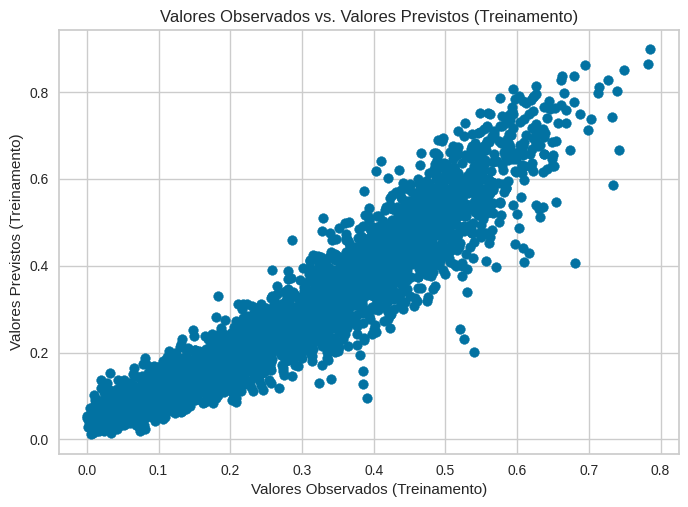

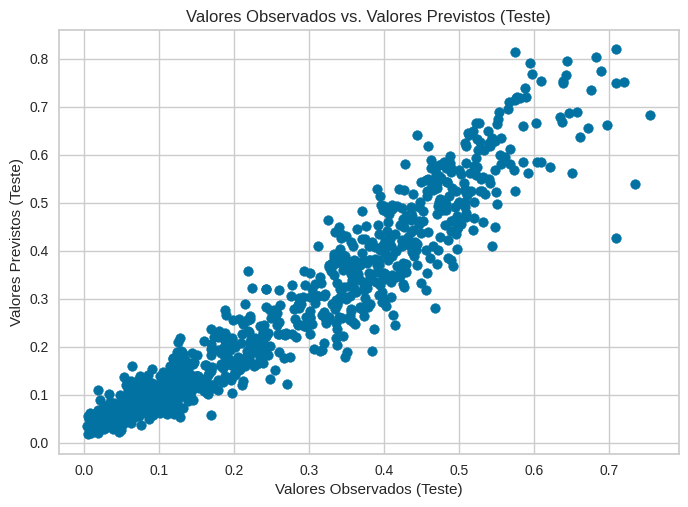

In [123]:
import matplotlib.pyplot as plt

# Calcular as previsões do modelo nos dados de treinamento
mu_predicted_train = expit(np.dot(X_train_selected, b))
y_predicted_train = mu_predicted_train * phi / (mu_predicted_train * phi + (1 - mu_predicted_train) * phi)

# Plotar valores observados versus valores previstos nos dados de treinamento
plt.scatter(y_train, y_predicted_train)
plt.xlabel("Valores Observados (Treinamento)")
plt.ylabel("Valores Previstos (Treinamento)")
plt.title("Valores Observados vs. Valores Previstos (Treinamento)")
plt.show()

# Calcular as previsões do modelo nos dados de teste
mu_predicted_test = expit(np.dot(X_test_selected, b))
y_predicted_test = mu_predicted_test * phi / (mu_predicted_test * phi + (1 - mu_predicted_test) * phi)

# Plotar valores observados versus valores previstos nos dados de teste
plt.scatter(y_test, y_predicted_test)
plt.xlabel("Valores Observados (Teste)")
plt.ylabel("Valores Previstos (Teste)")
plt.title("Valores Observados vs. Valores Previstos (Teste)")
plt.show()

**Deviance Residuals:** Os resíduos de deviance são calculados como a diferença entre a função de log-verossimilhança para o modelo completo e o modelo nulo. Valores menores indicam um melhor ajuste.

In [124]:
# Calcular os resíduos de deviance nos dados de treinamento
deviance_residuals_train = 2 * (logLikelihood(res.x, y_train, X_train_selected) - logLikelihood([0] * (X_train_selected.shape[1] + 1), y_train, np.ones_like(X_train_selected)))

# Calcular os resíduos de deviance nos dados de teste
deviance_residuals_test = 2 * (logLikelihood(res.x, y_test, X_test_selected) - logLikelihood([0] * (X_test_selected.shape[1] + 1), y_test, np.ones_like(X_test_selected)))

print("Deviance Residuals (Treinamento):", deviance_residuals_train)
print("Deviance Residuals (Teste):", deviance_residuals_test)

Deviance Residuals (Treinamento): -117821.2220866669
Deviance Residuals (Teste): -29430.56972347608


Os resíduos de deviance são uma medida de ajuste do modelo, medindo o quanto os valores observados diferem dos valores previstos pelo modelo. Um valor negativo indica que o modelo está superestimando os resultados.

**Pseudo R-squared:** Existem várias maneiras de calcular um R-quadrado ajustado para modelos de regressão beta. Uma abordagem comum é usar o pseudo R-quadrado de Cox-Snell:

In [125]:
# Calcular os resíduos de deviance nos dados de teste
deviance_residuals_test = 2 * (logLikelihood(res.x, y_test, X_test_selected) - logLikelihood([0] * (X_test_selected.shape[1] + 1), y_test, np.ones_like(X_test_selected)))

# Calcular o pseudo R-squared (Cox-Snell)
pseudo_r_squared = 1 - np.exp((2 / len(y_test)) * deviance_residuals_test.sum())

print("Pseudo R-squared (Cox-Snell):", pseudo_r_squared)

Pseudo R-squared (Cox-Snell): 1.0


**Likelihood Ratio Test:** O teste da razão de verossimilhança compara a verossimilhança do modelo ajustado com a do modelo nulo. Um valor p baixo sugere que o modelo ajustado é estatisticamente significativo.

Para calcular o valor p, precisamos comparar a diferença nas funções de verossimilhança com a distribuição qui-quadrado:

In [126]:
likelihood_ratio_test = -2 * (logLikelihood(res.x, y_train, X_train_selected) - logLikelihood([0] * (X_train_selected.shape[1] + 1), y_train, np.ones_like(X_train_selected)))
p_value = 1 - stats.chi2.cdf(likelihood_ratio_test, df=X_train_selected.shape[1])
print("Likelihood Ratio Test p-value:", p_value)

Likelihood Ratio Test p-value: 0.0


Em seguida, calculamos o coeficiente de determinação (R²), o erro quadrático médio (MSE) e o erro absoluto médio (MAE).

O R² indica a proporção da variabilidade na variável dependente que é explicada pelo modelo. O MSE e o MAE indicam a média dos quadrados dos erros ou a média dos valores absolutos dos erros entre as previsões do modelo e os valores reais, respectivamente. Quanto mais próximo de 1 o R² e quanto menores o MSE e o MAE, melhor é o ajuste do modelo aos dados.

In [127]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predictions on the test set
y_pred = expit(np.dot(X_test_selected, b))  # Using the link function to transform predictions

# Calculating R²
r2 = r2_score(y_test, y_pred)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)

# Calculating MAE
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)

R²: 0.9149980292241131
MSE: 0.002793472942122705
MAE: 0.03828695410274946


Um R² de aproximadamente 0.915 indica que o modelo é capaz de explicar cerca de 91.5% da variabilidade dos dados.

Um MSE de aproximadamente 0.0028 indica que o modelo tem um bom desempenho em fazer previsões precisas, com erros quadráticos médios relativamente baixos.

Um MAE de aproximadamente 0.0383 indica que o modelo tem um bom desempenho em fazer previsões próximas aos valores reais, com erros absolutos médios relativamente baixos.

Em resumo, os resultados sugerem que o modelo de regressão beta, treinado com seleção de recursos usando Elastic Net, apresenta um ajuste bastante razoável aos dados, explicando cerca de 91.5% da variabilidade dos dados e fazendo previsões precisas com erros relativamente baixos. Ao comparar os resultados deste modelo com os dois anteriores, percebemos que ele performou melhor.

## 7.4. Modelo de Regressão Beta considerando a seleção de variáveis feita pelo PCA.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.special import loggamma, expit
from scipy.optimize import minimize
from sklearn.decomposition import PCA

# Dados originais
df_model = df.iloc[:, 6:]

# Separação dos dados em features (X) e target (y)
y = df_model['POB']
X = df_model.drop(columns=['POB'])

# Normalização dos dados
normalizador = MinMaxScaler()
dados_normalizados = normalizador.fit_transform(X)

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(dados_normalizados, y, test_size=0.2, random_state=42)

# Aplicação do PCA
pca = PCA(n_components=5) # Consideramos 5 componentes principais
dados_pca_train = pca.fit_transform(X_train)
dados_pca_test = pca.transform(X_test)

# Função de probabilidade logarítmica para a regressão beta
def logLikelihood(params, y, X):
    b = np.array(params[:-1])  # parâmetros beta do modelo de regressão
    phi = params[-1]           # parâmetro phi
    mu = expit(np.dot(X, b))   # função de ligação

    eps = 1e-6  # epsilon de segurança para evitar inf nas funções de log
    res = -np.sum(loggamma(phi + eps)
                   - loggamma(mu * phi + eps)
                   - loggamma((1 - mu) * phi + eps)
                   + (mu * phi - 1) * np.log(y + eps)
                   + ((1 - mu) * phi - 1) * np.log(1 - y + eps))

    return res

# Parâmetros iniciais para a otimização da regressão beta nos dados de treino após o PCA
phi_init = 2
b0_init = 2
x0 = np.array([b0_init] * dados_pca_train.shape[1] + [phi_init])

# Realize a otimização para a regressão beta nos dados de treino após o PCA
res = minimize(logLikelihood, x0=x0, args=(y_train, dados_pca_train),
               bounds=[(None, None)] * dados_pca_train.shape[1] + [(0, None)],
               method='Nelder-Mead', options={'maxiter': 10000})

# Extrair os parâmetros ótimos
b = res.x[:-1]  # Parâmetros de regressão ótimos
phi = res.x[-1]  # Parâmetro phi

# Imprima os resultados
print("Optimal beta parameters:", b)
print("Optimal phi parameter:", phi)

Optimal beta parameters: [-0.62014569 -0.16362442 -0.03624744  0.37071597 -0.18695106]
Optimal phi parameter: 2.572877564644891


In [129]:
# Print the final model
print("Final Model:")
print("Beta Parameters:")
for i, beta in enumerate(b):
    print(f"Beta_{i+1}: {beta}")

print(f"Phi Parameter: {phi}")

Final Model:
Beta Parameters:
Beta_1: -0.6201456910316099
Beta_2: -0.16362442198306587
Beta_3: -0.03624743565025548
Beta_4: 0.3707159727099475
Beta_5: -0.18695106486001511
Phi Parameter: 2.572877564644891


### 7.4.1. Verificação do ajuste do modelo.

Podemos verificar o ajuste do modelo ao visualizar as previsões do modelo em comparação com os valores reais da variável de resposta, o que é feito a seguir.

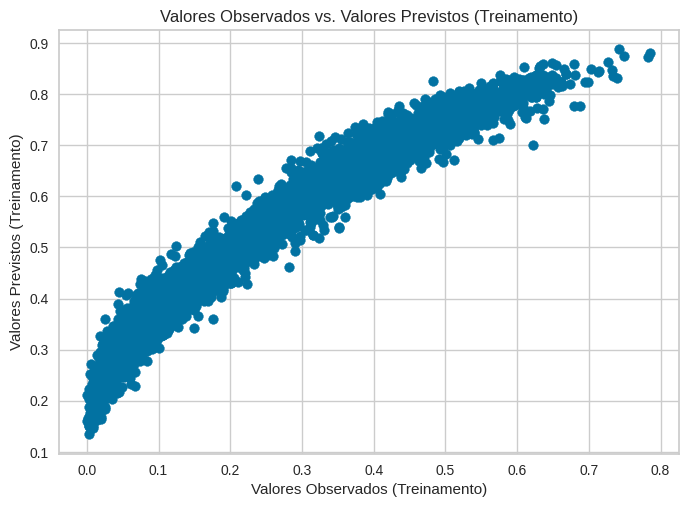

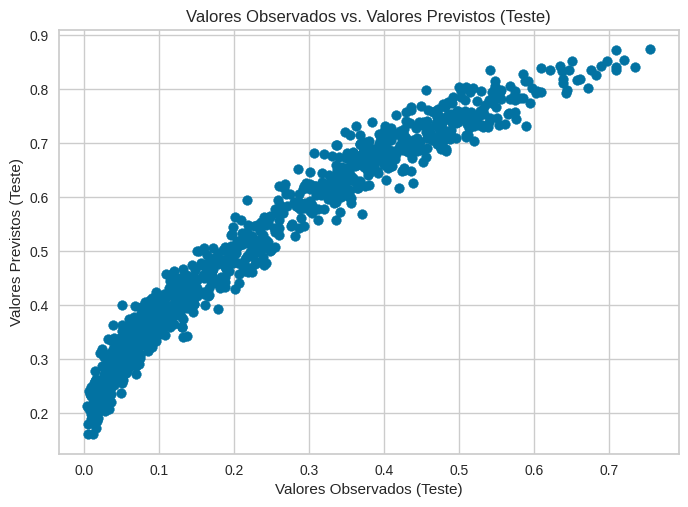

In [130]:
import matplotlib.pyplot as plt

# Calcular as previsões do modelo nos dados de treinamento após o PCA
mu_predicted_train = expit(np.dot(dados_pca_train, b))
y_predicted_train = mu_predicted_train * phi / (mu_predicted_train * phi + (1 - mu_predicted_train) * phi)

# Plotar valores observados versus valores previstos nos dados de treinamento
plt.scatter(y_train, y_predicted_train)
plt.xlabel("Valores Observados (Treinamento)")
plt.ylabel("Valores Previstos (Treinamento)")
plt.title("Valores Observados vs. Valores Previstos (Treinamento)")
plt.show()

# Calcular as previsões do modelo nos dados de teste após o PCA
mu_predicted_test = expit(np.dot(dados_pca_test, b))
y_predicted_test = mu_predicted_test * phi / (mu_predicted_test * phi + (1 - mu_predicted_test) * phi)

# Plotar valores observados versus valores previstos nos dados de teste
plt.scatter(y_test, y_predicted_test)
plt.xlabel("Valores Observados (Teste)")
plt.ylabel("Valores Previstos (Teste)")
plt.title("Valores Observados vs. Valores Previstos (Teste)")
plt.show()

**Deviance Residuals:** Os resíduos de deviance são calculados como a diferença entre a função de log-verossimilhança para o modelo completo e o modelo nulo. Valores menores indicam um melhor ajuste.

In [131]:
# Calcular os resíduos de deviance nos dados de treinamento após o PCA
deviance_residuals_train = 2 * (logLikelihood(res.x, y_train, dados_pca_train) - logLikelihood([0] * (dados_pca_train.shape[1] + 1), y_train, np.ones_like(dados_pca_train)))

# Calcular os resíduos de deviance nos dados de teste após o PCA
deviance_residuals_test = 2 * (logLikelihood(res.x, y_test, dados_pca_test) - logLikelihood([0] * (dados_pca_test.shape[1] + 1), y_test, np.ones_like(dados_pca_test)))

print("Deviance Residuals (Treinamento):", deviance_residuals_train)
print("Deviance Residuals (Teste):", deviance_residuals_test)

Deviance Residuals (Treinamento): -105761.60281940554
Deviance Residuals (Teste): -26410.874489116974


**Pseudo R-squared:** Existem várias maneiras de calcular um R-quadrado ajustado para modelos de regressão beta. Uma abordagem comum é usar o pseudo R-quadrado de Cox-Snell:

In [132]:
# Calcular os resíduos de deviance nos dados de teste
deviance_residuals_test = 2 * (logLikelihood(res.x, y_test, dados_pca_test) - logLikelihood([0] * (dados_pca_test.shape[1] + 1), y_test, np.ones_like(dados_pca_test)))

# Calcular o pseudo R-squared (Cox-Snell)
pseudo_r_squared = 1 - np.exp((2 / len(y_test)) * deviance_residuals_test.sum())

print("Pseudo R-squared (Cox-Snell):", pseudo_r_squared)

Pseudo R-squared (Cox-Snell): 1.0


**Likelihood Ratio Test:** O teste da razão de verossimilhança compara a verossimilhança do modelo ajustado com a do modelo nulo. Um valor p baixo sugere que o modelo ajustado é estatisticamente significativo.

Para calcular o valor p, precisamos comparar a diferença nas funções de verossimilhança com a distribuição qui-quadrado:

In [133]:
likelihood_ratio_test = -2 * (logLikelihood(res.x, y_train, dados_pca_train) - logLikelihood([0] * (dados_pca_train.shape[1] + 1), y_train, np.ones_like(dados_pca_train)))
p_value = 1 - stats.chi2.cdf(likelihood_ratio_test, df=dados_pca_train.shape[1])
print("Likelihood Ratio Test p-value:", p_value)

Likelihood Ratio Test p-value: 0.0


Em seguida, calculamos o coeficiente de determinação (R²), o erro quadrático médio (MSE) e o erro absoluto médio (MAE).

O R² indica a proporção da variabilidade na variável dependente que é explicada pelo modelo. O MSE e o MAE indicam a média dos quadrados dos erros ou a média dos valores absolutos dos erros entre as previsões do modelo e os valores reais, respectivamente. Quanto mais próximo de 1 o R² e quanto menores o MSE e o MAE, melhor é o ajuste do modelo aos dados.

In [134]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predictions on the test set
y_pred = expit(np.dot(dados_pca_test, b))  # Using the link function to transform predictions

# Calculating R²
r2 = r2_score(y_test, y_pred)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)

# Calculating MAE
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)

R²: -1.1913262220845446
MSE: 0.07201492451153434
MAE: 0.26522872319652924


O modelo ajustado parece ter um pseudo R-squared de 1.0 nos dados de teste, o que indica um ajuste perfeito do modelo aos dados. No entanto, é importante considerar que um pseudo R-squared de 1.0 pode indicar uma possível superestimação do modelo, especialmente se a relação entre as variáveis não for realmente perfeita.

Além disso, o valor de R² negativo e os valores de MSE e MAE sugerem que o modelo pode não estar performando tão bem nos dados de teste. Um R² negativo geralmente indica que o modelo ajustado é pior do que um modelo ingênuo que simplesmente prevê a média da variável dependente, e indica overfitting do modelo de treinamento.

## 7.5. Modelo de Regressão Beta considerando a seleção de variáveis feita pelo Random Forest.

In [135]:
import numpy as np
from scipy.special import loggamma, expit
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define the log likelihood function for beta regression
def logLikelihood(params, y, X):
    b = np.array(params[:-1])  # beta parameters of the regression model
    phi = params[-1]           # phi parameter
    mu = expit(np.dot(X, b))   # link function

    eps = 1e-6  # safety epsilon to avoid inf in log functions
    res = -np.sum(loggamma(phi + eps) - loggamma(mu * phi + eps)
                   - loggamma((1 - mu) * phi + eps)
                   + (mu * phi - 1) * np.log(y + eps)
                   + ((1 - mu) * phi - 1) * np.log(1 - y + eps))

    return res

# Divide os dados normalizados em conjuntos de treinamento e teste
X_train_norm, X_test_norm, y_train, y_test = train_test_split(dados_normalizados_df, df['POB'], test_size=0.2, random_state=42)

# Selecionar as características mais importantes
variaveis_selecionadas_random_forest = ['CORTE1', 'CORTE2', 'RDPC1', 'RDPC2', 'RDPC3']

# Filtrar apenas as variáveis selecionadas
X_train_selected = X_train_norm[variaveis_selecionadas_random_forest]
X_test_selected = X_test_norm[variaveis_selecionadas_random_forest]

# Initial parameters for optimization
phi = 0.5
b0 = 0.5
x0 = np.array([b0] * X_train_selected.shape[1] + [phi])

# Perform optimization for beta regression
res = minimize(logLikelihood, x0=x0, args=(y_train, X_train_selected),
               bounds=[(None, None)] * X_train_selected.shape[1] + [(0, None)],
               method='Nelder-Mead', options={'maxiter': 10000})

# Extract the optimal parameters
b = res.x[:-1]  # Optimal regression parameters
phi = res.x[-1]  # Phi parameter

# Print the results
print("Optimal beta parameters:", b)
print("Optimal phi parameter:", phi)

Optimal beta parameters: [-1.94242706 12.32159137 -4.45054336 -7.62637468 -4.67130958]
Optimal phi parameter: 98.92667824372354


O parâmetro ϕ é uma medida de dispersão para a distribuição beta. Quanto maior o valor de phi, menor a dispersão. Aqui, phi é de aproximadamente 98.93, maior que os dois casos anteriores.

Portanto, quando dizemos que o "Optimal phi parameter" é 98.93, isso significa que estamos modelando uma distribuição beta com uma precisão alta, o que sugere que os dados estão mais concentrados ao redor da média.

In [136]:
# Print the final model
print("Final Model:")
print("Beta Parameters:")
for i, beta in enumerate(b):
    print(f"Beta_{i+1}: {beta}")

print(f"Phi Parameter: {phi}")

Final Model:
Beta Parameters:
Beta_1: -1.942427064123883
Beta_2: 12.321591368675435
Beta_3: -4.450543362886961
Beta_4: -7.626374683470628
Beta_5: -4.671309577968861
Phi Parameter: 98.92667824372354


### 7.5.1. Verificação do ajuste do modelo.

Podemos verificar o ajuste do modelo ao visualizar as previsões do modelo em comparação com os valores reais da variável de resposta, o que é feito a seguir.

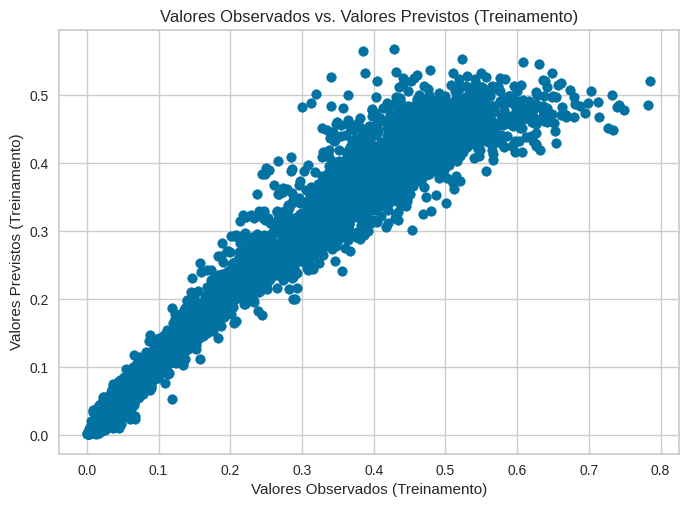

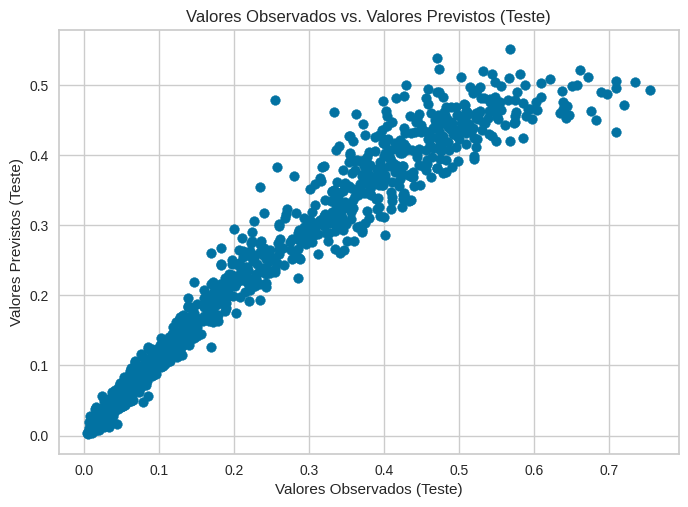

In [137]:
import matplotlib.pyplot as plt

# Calcular as previsões do modelo nos dados de treinamento após o PCA
mu_predicted_train = expit(np.dot(X_train_selected, b))
y_predicted_train = mu_predicted_train * phi / (mu_predicted_train * phi + (1 - mu_predicted_train) * phi)

# Plotar valores observados versus valores previstos nos dados de treinamento
plt.scatter(y_train, y_predicted_train)
plt.xlabel("Valores Observados (Treinamento)")
plt.ylabel("Valores Previstos (Treinamento)")
plt.title("Valores Observados vs. Valores Previstos (Treinamento)")
plt.show()

# Calcular as previsões do modelo nos dados de teste após o PCA
mu_predicted_test = expit(np.dot(X_test_selected, b))
y_predicted_test = mu_predicted_test * phi / (mu_predicted_test * phi + (1 - mu_predicted_test) * phi)

# Plotar valores observados versus valores previstos nos dados de teste
plt.scatter(y_test, y_predicted_test)
plt.xlabel("Valores Observados (Teste)")
plt.ylabel("Valores Previstos (Teste)")
plt.title("Valores Observados vs. Valores Previstos (Teste)")
plt.show()

**Deviance Residuals:** Os resíduos de deviance são calculados como a diferença entre a função de log-verossimilhança para o modelo completo e o modelo nulo. Valores menores indicam um melhor ajuste.

In [138]:
# Calcular os resíduos de deviance nos dados de treinamento após o PCA
deviance_residuals_train = 2 * (logLikelihood(res.x, y_train, X_train_selected) - logLikelihood([0] * (X_train_selected.shape[1] + 1), y_train, np.ones_like(X_train_selected)))

# Calcular os resíduos de deviance nos dados de teste após o PCA
deviance_residuals_test = 2 * (logLikelihood(res.x, y_test, X_test_selected) - logLikelihood([0] * (X_test_selected.shape[1] + 1), y_test, np.ones_like(X_test_selected)))

print("Deviance Residuals (Treinamento):", deviance_residuals_train)
print("Deviance Residuals (Teste):", deviance_residuals_test)

Deviance Residuals (Treinamento): -121093.79735264508
Deviance Residuals (Teste): -30194.32749015034


Os resíduos de deviance são uma medida de ajuste do modelo, medindo o quanto os valores observados diferem dos valores previstos pelo modelo. Um valor negativo indica que o modelo está superestimando os resultados.

**Pseudo R-squared:** Existem várias maneiras de calcular um R-quadrado ajustado para modelos de regressão beta. Uma abordagem comum é usar o pseudo R-quadrado de Cox-Snell:

In [139]:
# Calcular os resíduos de deviance nos dados de teste
deviance_residuals_test = 2 * (logLikelihood(res.x, y_test, X_test_selected) - logLikelihood([0] * (X_test_selected.shape[1] + 1), y_test, np.ones_like(X_test_selected)))

# Calcular o pseudo R-squared (Cox-Snell)
pseudo_r_squared = 1 - np.exp((2 / len(y_test)) * deviance_residuals_test.sum())

print("Pseudo R-squared (Cox-Snell):", pseudo_r_squared)

Pseudo R-squared (Cox-Snell): 1.0


**Likelihood Ratio Test:** O teste da razão de verossimilhança compara a verossimilhança do modelo ajustado com a do modelo nulo. Um valor p baixo sugere que o modelo ajustado é estatisticamente significativo.

Para calcular o valor p, precisamos comparar a diferença nas funções de verossimilhança com a distribuição qui-quadrado:

In [140]:
likelihood_ratio_test = -2 * (logLikelihood(res.x, y_train, X_train_selected) - logLikelihood([0] * (X_train_selected.shape[1] + 1), y_train, np.ones_like(X_train_selected)))
p_value = 1 - stats.chi2.cdf(likelihood_ratio_test, df=X_train_selected.shape[1])
print("Likelihood Ratio Test p-value:", p_value)

Likelihood Ratio Test p-value: 0.0


Em seguida, calculamos o coeficiente de determinação (R²), o erro quadrático médio (MSE) e o erro absoluto médio (MAE).

O R² indica a proporção da variabilidade na variável dependente que é explicada pelo modelo. O MSE e o MAE indicam a média dos quadrados dos erros ou a média dos valores absolutos dos erros entre as previsões do modelo e os valores reais, respectivamente. Quanto mais próximo de 1 o R² e quanto menores o MSE e o MAE, melhor é o ajuste do modelo aos dados.

In [141]:
# Predictions on the test set
y_pred = expit(np.dot(X_test_selected, b))  # Using the link function to transform predictions

# Calculating R²
r2 = r2_score(y_test, y_pred)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)

# Calculating MAE
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)

R²: 0.9319246361044395
MSE: 0.002237203271072285
MAE: 0.02930484864063454


Um R² de aproximadamente 0.93 indica que o modelo é capaz de explicar cerca de 93% da variabilidade dos dados.

Um MSE de aproximadamente 0.0022 indica que o modelo tem um bom desempenho em fazer previsões precisas, com erros quadráticos médios relativamente baixos.

Um MAE de aproximadamente 0.0293 indica que o modelo tem um bom desempenho em fazer previsões próximas aos valores reais, com erros absolutos médios relativamente baixos.

Em resumo, os resultados sugerem que o modelo de regressão beta, treinado com seleção de recursos usando Random Forest, apresenta um ajuste bastante razoável aos dados, explicando cerca de 93% da variabilidade dos dados e fazendo previsões precisas com erros relativamente baixos. Ao comparar os resultados deste modelo com os anteriores, percebemos que ele performou melhor, obtendo resultados similares aos obtidos pelo modelou que utilizou Elastic net.

## 7.6. Comparação entre os modelos testados.

Uma comparação entre os Modelos de Regressão Beta considerando a seleção de variáveis feita pelo LASSO, Rigde, Elastic net e Random Forest pode ser observada a seguir,

| Método       | Parâmetro Phi | R²     | MSE    | MAE    |
|--------------|---------------|--------|--------|--------|
| PCA        | 2.573      | -1.191   | 0.072 | 0.265 |
| Lasso        | 7.819       | 0.377   | 0.020 | 0.106 |
| Ridge        | 6.732         | 0.495   | 0.016 | 0.093 |
| Elastic Net  | 28.245        | 0.915  | 0.003 | 0.038 |
| Random Forest  | 98.927        | 0.932  | 0.002 | 0.029 |

O Modelo de Regressão Beta considerando a seleção de variáveis feita pelo Random Forest (seção 7.5.) possui o menor número de parâmetros beta, o que pode indicar uma modelagem mais simples em comparação com os outros modelos. Este mesmo modelo também tem um valor maior para o parâmetro phi em comparação com os outros modelos, isso pode indicar uma maior dispersão dos dados em relação à distribuição beta, ele tem também o maior valor de R², indicando que ele explica a maior parte da variação nos dados de teste.

Podemos observar que, apesar de o modelo que utiliza o Random Forest apresentar um valor maior para o parâmetro phi do que o modelo que utiliza o Elastic net, percebemos que ambos os modelos apresentam valores muito similares para as estatísticas R², MSE e MAE.

Os resultados também sugerem que o modelo de regressão beta treinado com seleção de recursos usando Elastic net apresenta o melhor desempenho dentre os 3 métodos de regularização (LASSO, Ridge e Elastic net), com o maior R² e os menores MSE e MAE. Isso indica que o Elastic Net foi capaz de encontrar um equilíbrio entre os métodos Lasso e Ridge, resultando em um modelo mais preciso e com melhor capacidade de explicar a variabilidade dos dados. Já o Modelo de Regressão Beta considerando a seleção de variáveis feita pelo PCA apresentou os piores resultados dentre os cinco analisados.

Com base nessa análise, o Modelo de Regressão Beta considerando a seleção de variáveis feita pelo Random Forest parece ser o melhor em termos de ajuste e desempenho na previsão dos dados de teste. Ele tem um modelo mais simples, mas explica a maior parte da variação nos dados e tem os menores erros de previsão. Dito isto, não podemos deixar de notar que o Modelo de Regressão Beta considerando a seleção de variáveis feita pelo Elastic net apresentou uma performance similar ao que utiliza o Random Forest, de forma que seguiremos com uma análise adicional com a biblioteca BetaModel para decidir entre os modelos.

# 8. Modelo de Regressão Beta utilizando a biblioteca BetaModel da statsmodels

O modelo a seguir for adaptado de https://gist.github.com/josef-pkt/4d0fd829c8fbc1c4237d989ba3dbb088#file-beta_regression-ipynb. [14]

In [142]:
# Bibiotecas utilizadas
import os.path
from statsmodels.genmod import families
links = families.links
import pandas as pd
import patsy
from statsmodels.othermod.betareg import BetaModel
import numpy as np
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np
from scipy.stats import rankdata
from scipy.special import logit
import statsmodels.api as sm

## 8.1. Modelo de Regressão Beta considerando a seleção de variáveis feita pelo LASSO.

In [143]:
# Copia a coluna POB do dataframe original para o dataframe normalizado
epsilon = 1e-6
dados_normalizados_df_copia = dados_normalizados_df.copy()
dados_normalizados_df_copia["POB"] = np.clip(df["POB"], epsilon, 1 - epsilon)

# Define a fórmula para o modelo
model = "POB ~ " + " + ".join(dados_normalizados_df_copia[variaveis_selecionadas_lasso].columns.drop(['UF']))

# Ajuste o modelo de regressão Beta com a função de ligação log para a precisão
mod_pob = BetaModel.from_formula(model, dados_normalizados_df_copia, link_precision=links.log())
res_pob = mod_pob.fit(cov_type="eim")

# Imprima o resumo do modelo
print(res_pob.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                              BetaModel Results                               
Dep. Variable:                    POB   Log-Likelihood:                 18507.
Model:                      BetaModel   AIC:                        -3.685e+04
Method:            Maximum Likelihood   BIC:                        -3.632e+04
Date:                Mon, 20 May 2024                                         
Time:                        20:45:00                                         
No. Observations:                5565                                         
Df Residuals:                    5485                                         
Df Model:                          78                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.5187      0.107      4.835      0.000       0.308       0.729
ESPVIDA            

A seguir, faremos uma análise de resíduos. Resíduos são as diferenças entre os valores observados e os valores preditos pelo modelo. Uma análise de resíduos é importante para verificar se os pressupostos do modelo estão sendo atendidos e se há alguma estrutura nos dados que não está sendo capturada pelo modelo.

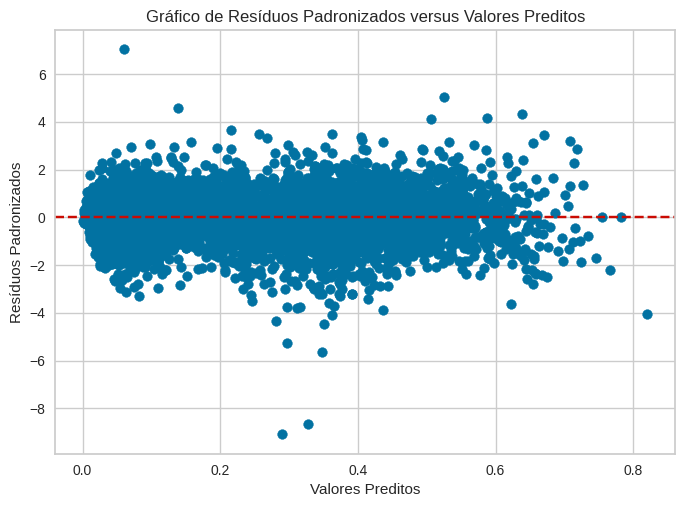

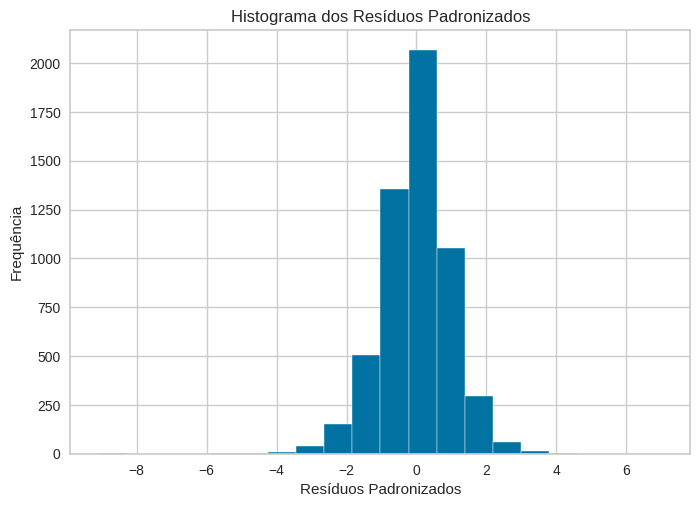

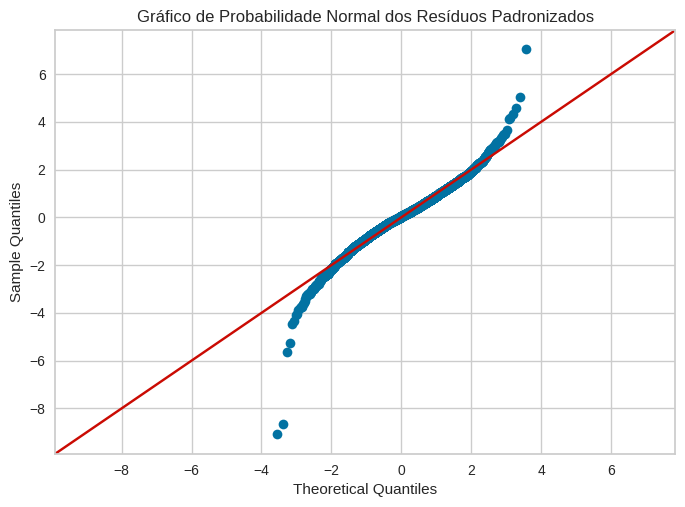

In [144]:
# Obtendo os valores ajustados (previstos) do modelo
fitted_values = res_pob.predict()

# Obtendo os valores observados
observed_values = dados_normalizados_df_copia['POB']

# Calculando os resíduos
residuals = observed_values - fitted_values

# Calculando os resíduos padronizados
standardized_residuals = residuals / np.std(residuals)

# Gráfico de resíduos padronizados versus valores preditos
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos Padronizados")
plt.title("Gráfico de Resíduos Padronizados versus Valores Preditos")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Histograma dos resíduos padronizados
plt.hist(standardized_residuals, bins=20)
plt.xlabel("Resíduos Padronizados")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos Padronizados")
plt.show()

# Gráfico de probabilidade normal dos resíduos
sm.qqplot(standardized_residuals, line='45')
plt.title("Gráfico de Probabilidade Normal dos Resíduos Padronizados")
plt.show()

A análise de resíduos não indica um ajuste perfeito, e indica que a distribuição possui caudas pesadas.

A tabela ANOVA gerada acima apresenta o cálculo do valor-p para cada variável explicativa, e considerando um nível de significância de 5%, podemos descartar muitas variáveis explicativas deste modelo, o que indica que não foi feito um bom ajuste considerando o método de regularização LASSO.

As seguintes variáveis apresentam valor-p maior que 0.05, e portanto são não significativas com 5% de significância: ESPVIDA, FECTOT, MORT1, RAZDEP, E_ANOSESTUDO, T_ANALF15M, T_ANALF18A24, T_ANALF25A29, T_ATRASO_1_FUND, T_ATRASO_1_MED, T_ATRASO_2_MED, T_FBMED, T_FBSUPER, T_FLBAS, T_FLPRE, T_FREQ0A3, T_FREQ15A17, T_FREQ25A29, T_FREQ5A6, T_FREQ6, T_FREQ6A17, T_FREQFUND1824, T_FREQFUND45, T_FREQMED1824, T_FUND12A14, T_FUND15A17, T_MED18A20, T_MED18A24, T_SUPER25M, REN0, REN3, REN5, T_ATIV1014, T_DES1824, TRABPUB, T_DENS, T_LIXO, T_LUZ, AGUA_ESGOTO, PAREDE, T_M10A14CF, T_MULCHEFEFIF014, T_OCUPDESLOC_1, pesoRUR e IDHM.

## 8.2. Modelo de Regressão Beta considerando a seleção de variáveis feita pelo Ridge.

In [145]:
# Define a fórmula para o modelo
model = "POB ~ " + " + ".join(dados_normalizados_df_copia[variaveis_selecionadas_ridge])

# Ajuste o modelo de regressão Beta com a função de ligação log para a precisão
mod_pob = BetaModel.from_formula(model, dados_normalizados_df_copia, link_precision=links.log())
res_pob = mod_pob.fit(cov_type="eim")

# Imprima o resumo do modelo
print(res_pob.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                              BetaModel Results                               
Dep. Variable:                    POB   Log-Likelihood:                 18585.
Model:                      BetaModel   AIC:                        -3.707e+04
Method:            Maximum Likelihood   BIC:                        -3.673e+04
Date:                Mon, 20 May 2024                                         
Time:                        20:45:07                                         
No. Observations:                5565                                         
Df Residuals:                    5514                                         
Df Model:                          49                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4916      0.134      3.665      0.000       0.229       0.754
MORT1              

A seguir, faremos uma análise de resíduos. Resíduos são as diferenças entre os valores observados e os valores preditos pelo modelo. Uma análise de resíduos é importante para verificar se os pressupostos do modelo estão sendo atendidos e se há alguma estrutura nos dados que não está sendo capturada pelo modelo.

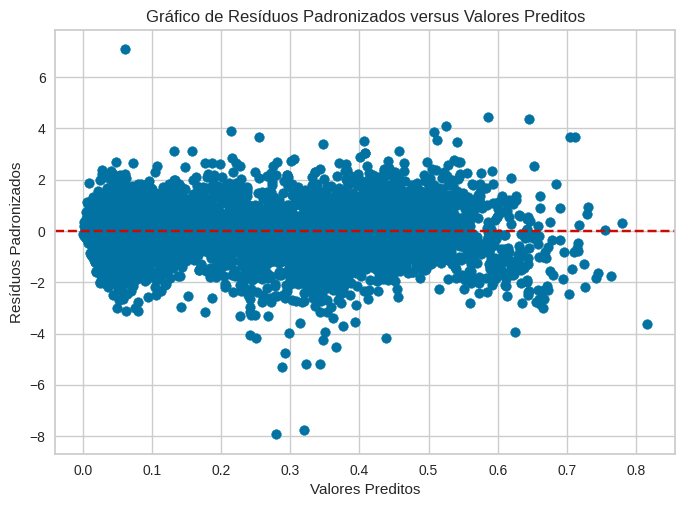

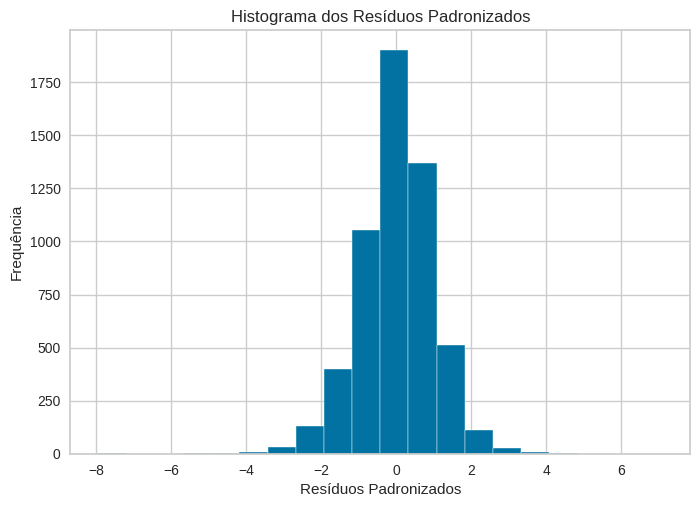

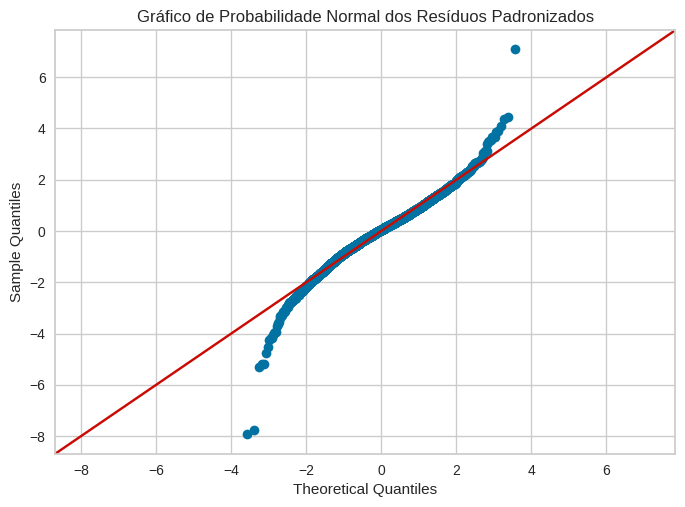

In [146]:
# Obtendo os valores ajustados (previstos) do modelo
fitted_values = res_pob.predict()

# Obtendo os valores observados
observed_values = dados_normalizados_df_copia['POB']

# Calculando os resíduos
residuals = observed_values - fitted_values

# Calculando os resíduos padronizados
standardized_residuals = residuals / np.std(residuals)

# Gráfico de resíduos padronizados versus valores preditos
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos Padronizados")
plt.title("Gráfico de Resíduos Padronizados versus Valores Preditos")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Histograma dos resíduos padronizados
plt.hist(standardized_residuals, bins=20)
plt.xlabel("Resíduos Padronizados")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos Padronizados")
plt.show()

# Gráfico de probabilidade normal dos resíduos
sm.qqplot(standardized_residuals, line='45')
plt.title("Gráfico de Probabilidade Normal dos Resíduos Padronizados")
plt.show()

A análise de resíduos não indica um ajuste perfeito, e indica que a distribuição possui caudas pesadas.

O modelo que considera a regularização feita pelo Ridge também apresenta muitas variáveis explicativas que não são significativas com 5% de significância, tais como MORT1, RAZDEP, SOBRE40, T_ENV, E_ANOSESTUDO, T_FREQFUND1824, T_FUND18M, T_SUPER25M, CORTE3, PREN10RICOS, RDPC10, T_ATIV, T_DES, T_DES18M, I_ESCOLARIDADE, IDHM e IDHM_E, que podem ser descartadas para um melhor ajuste do modelo.

## 8.3. Modelo de Regressão Beta considerando a seleção de variáveis feita pelo Elastic net.

In [147]:
# Define a fórmula para o modelo
model = "POB ~ " + " + ".join(dados_normalizados_df_copia[variaveis_selecionadas_elastnet].columns.drop(['UF', "Codmun6", "Codmun7"]))

# Ajuste o modelo de regressão Beta com a função de ligação log para a precisão
mod_pob = BetaModel.from_formula(model, dados_normalizados_df_copia, link_precision=links.log())
res_pob = mod_pob.fit(cov_type="eim")

# Imprima o resumo do modelo
print(res_pob.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                              BetaModel Results                               
Dep. Variable:                    POB   Log-Likelihood:                 15520.
Model:                      BetaModel   AIC:                        -3.099e+04
Method:            Maximum Likelihood   BIC:                        -3.082e+04
Date:                Mon, 20 May 2024                                         
Time:                        20:45:14                                         
No. Observations:                5565                                         
Df Residuals:                    5540                                         
Df Model:                          23                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0914      0.059     -1.553      0.120      -0.207       0.024
ESPVIDA            

A seguir, faremos uma análise de resíduos. Resíduos são as diferenças entre os valores observados e os valores preditos pelo modelo. Uma análise de resíduos é importante para verificar se os pressupostos do modelo estão sendo atendidos e se há alguma estrutura nos dados que não está sendo capturada pelo modelo.

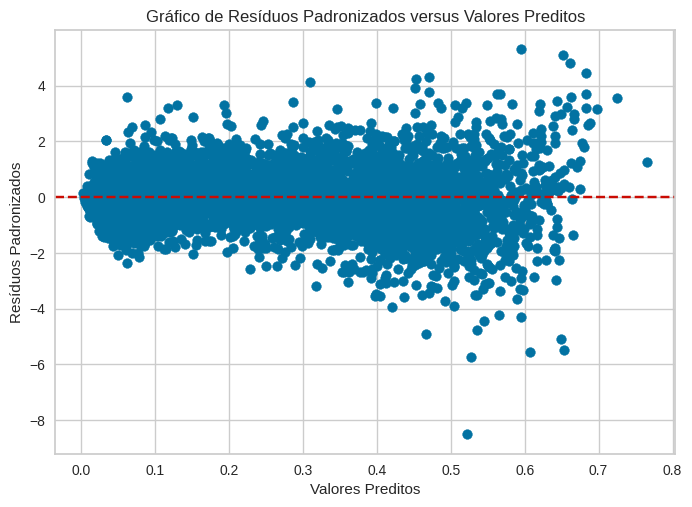

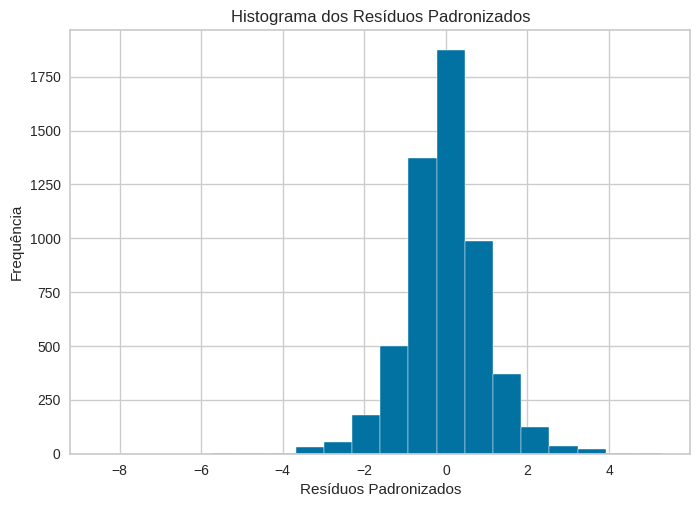

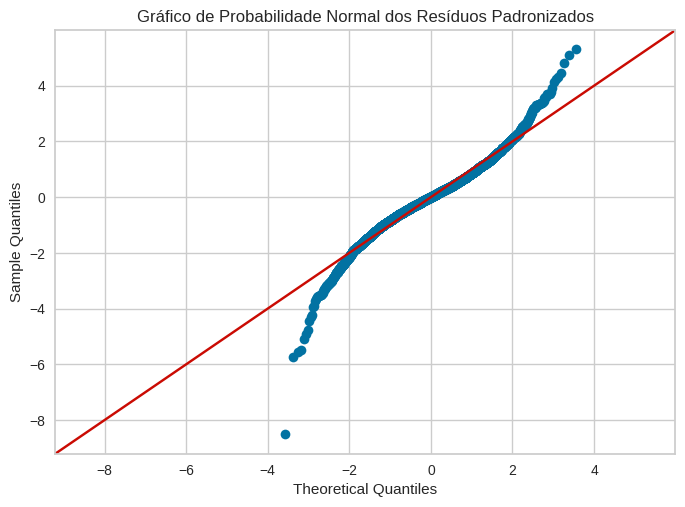

In [148]:
# Obtendo os valores ajustados (previstos) do modelo
fitted_values = res_pob.predict()

# Obtendo os valores observados
observed_values = dados_normalizados_df_copia['POB']

# Calculando os resíduos
residuals = observed_values - fitted_values

# Calculando os resíduos padronizados
standardized_residuals = residuals / np.std(residuals)

# Gráfico de resíduos padronizados versus valores preditos
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos Padronizados")
plt.title("Gráfico de Resíduos Padronizados versus Valores Preditos")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Histograma dos resíduos padronizados
plt.hist(standardized_residuals, bins=20)
plt.xlabel("Resíduos Padronizados")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos Padronizados")
plt.show()

# Gráfico de probabilidade normal dos resíduos
sm.qqplot(standardized_residuals, line='45')
plt.title("Gráfico de Probabilidade Normal dos Resíduos Padronizados")
plt.show()

A análise de resíduos não indica um ajuste perfeito, e indica que a distribuição possui caudas pesadas.

Como discutido anteriormente na seção 7.5., o Modelo de Regressão Beta considerando a seleção de variáveis feita pelo Elastic net é o mais adequado dentre os modelos que utilizam métodos de regularização para este conjunto de dados, e pela tabela ANOVA acima podemos analisar a significância das variáveis explicativas através do valor-p calculado.

Com 5% de significância, podemos descartar as variáveis UF, ESPVIDA, P_FORMAL, IDHM_L e o intercepto, de modo que o modelo final seria da forma,

$$  y_{POB} = 0.1242 \times x_{\text{MORT1}} - 3.6048 \times x_{\text{T_ANALF15M}} + 2.6954 \times x_{\text{T_ANALF18M}} + 0.2443 \times x_{\text{T_ANALF25A29}} + 0.686 \times x_{\text{T_ANALF25M}} - 0.0858 \times x_{\text{T_ATRASO_0_BASICO}} + 0.1389 \times x_{\text{T_FREQFUND1517}} + 1.3488 \times x_{\text{CORTE1}} - 0.6576\times x_{\text{PREN20}} + 1.2285 \times x_{\text{PREN40}} - 6.5012 \times x_{\text{RDPC2}} - 2.1733 \times x_{\text{RPOB}} + 0.3963 \times x_{\text{REN1}} + 0.069 \times x_{\text{T_ATIV1824}} + 0.0907 \times x_{\text{T_BANAGUA}} + 0.2401 \times x_{\text{T_DENS}} + 0.4886 \times x_{\text{T_NESTUDA_NTRAB_MMEIO}} + 0.1548 \times x_{\text{T_RMAXIDOSO}} + 0.1092 \times x_{\text{IDHM}} + 0.6343 \times x_{\text{IDHM_R}}  $$



Abaixo rodamos novamente o Modelo de Regressão Beta considerando a seleção de variáveis feita pelo Elastic net, mas descartando as variáveis não significativas encontradas na análise acima (UF, ESPVIDA, P_FORMAL, IDHM_L e o intercepto).

In [149]:
# Lista das variáveis selecionadas com valor-p < 0.05
variaveis_significativas = [
    'MORT1', 'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25A29', 'T_ANALF25M',
    'T_ATRASO_0_BASICO', 'T_FREQFUND1517', 'CORTE1', 'PREN20', 'PREN40',
    'RDPC2', 'RPOB', 'REN1', 'T_ATIV1824', 'T_BANAGUA', 'T_DENS',
    'T_NESTUDA_NTRAB_MMEIO', 'T_RMAXIDOSO', 'IDHM', 'IDHM_R'
]

# Definir a fórmula para o modelo com as variáveis significativas
model_formula = "POB ~ " + " + ".join(variaveis_significativas)

# Ajuste do modelo de regressão Beta com a função de ligação log para a precisão
mod_pob_significativas = BetaModel.from_formula(model_formula, dados_normalizados_df_copia, link_precision=links.log())
res_pob_significativas = mod_pob_significativas.fit(cov_type="eim")

# Imprima o resumo do modelo ajustado
print(res_pob_significativas.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                              BetaModel Results                               
Dep. Variable:                    POB   Log-Likelihood:                 15515.
Model:                      BetaModel   AIC:                        -3.099e+04
Method:            Maximum Likelihood   BIC:                        -3.084e+04
Date:                Mon, 20 May 2024                                         
Time:                        20:45:19                                         
No. Observations:                5565                                         
Df Residuals:                    5543                                         
Df Model:                          20                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0062      0.044      0.140      0.888      -0.080       0.092
MORT1              

A seguir, faremos uma análise de resíduos. Resíduos são as diferenças entre os valores observados e os valores preditos pelo modelo. Uma análise de resíduos é importante para verificar se os pressupostos do modelo estão sendo atendidos e se há alguma estrutura nos dados que não está sendo capturada pelo modelo.

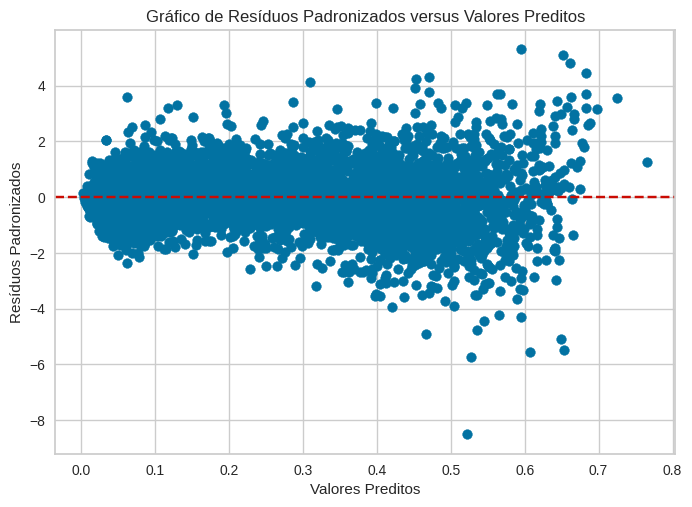

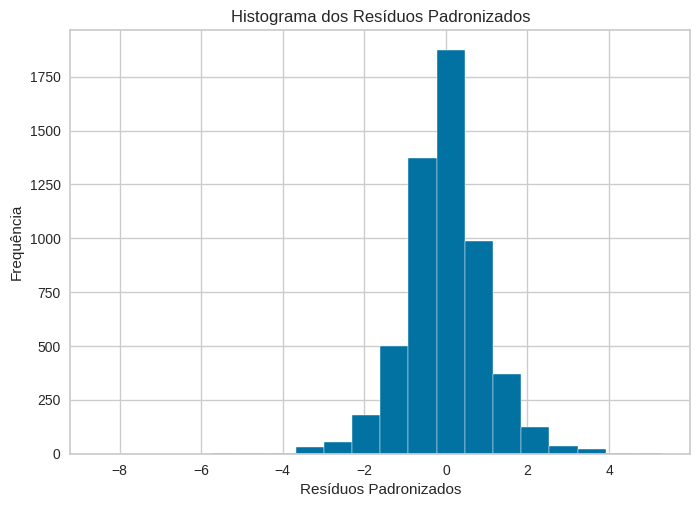

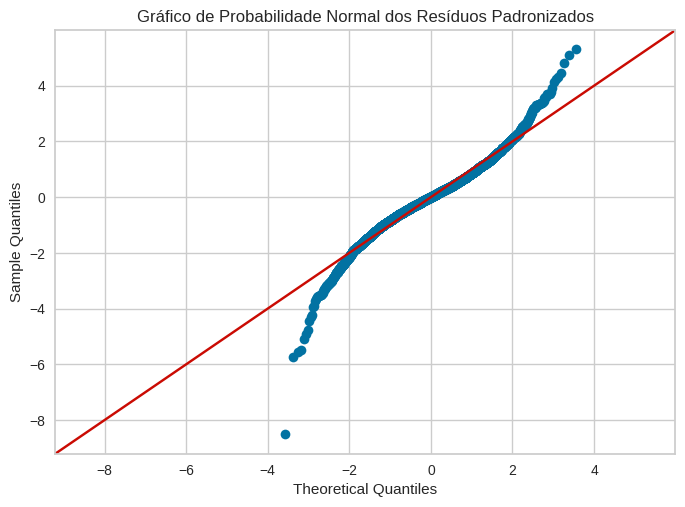

In [150]:
# Obtendo os valores ajustados (previstos) do modelo
fitted_values = res_pob.predict()

# Obtendo os valores observados
observed_values = dados_normalizados_df_copia['POB']

# Calculando os resíduos
residuals = observed_values - fitted_values

# Calculando os resíduos padronizados
standardized_residuals = residuals / np.std(residuals)

# Gráfico de resíduos padronizados versus valores preditos
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos Padronizados")
plt.title("Gráfico de Resíduos Padronizados versus Valores Preditos")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Histograma dos resíduos padronizados
plt.hist(standardized_residuals, bins=20)
plt.xlabel("Resíduos Padronizados")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos Padronizados")
plt.show()

# Gráfico de probabilidade normal dos resíduos
sm.qqplot(standardized_residuals, line='45')
plt.title("Gráfico de Probabilidade Normal dos Resíduos Padronizados")
plt.show()

Uma comparação entre os dois modelos acima nos mostra que,
- O primeiro modelo possui 23 variáveis, enquanto o segundo possui apenas 20 variáveis.
- Os valores dos coeficientes estimados para as variáveis compartilhadas entre os dois modelos podem ser diferentes entre os modelos, por exemplo, para a variável MORT1, o primeiro modelo tem um coeficiente estimado de 0.1242, enquanto o segundo modelo tem um coeficiente estimado de 0.0290. Isso indica que o impacto da variável MORT1 na variável resposta pode ser diferente em cada modelo.
- O primeiro modelo tem uma log-verossimilhança de 15520, enquanto o segundo modelo tem uma log-verossimilhança de 15515. Isso sugere que o primeiro modelo se ajusta ligeiramente melhor aos dados do que o segundo modelo.
- A análise de resíduos não mostra diferenças entre os modelos.

Apesar de não notarmos diferenças significativas entre os modelos, optamos pelo segundo, por ser um modelo mais simples.

Abaixo geramos um código para relembrarmos o significado de cada variável escolhida como significativa para o modelo.

In [151]:
# Variáveis fornecidas
variaveis_fornecidas = [
    'Intercept', 'MORT1', 'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25A29',
    'T_ANALF25M', 'T_ATRASO_0_BASICO', 'T_FREQFUND1517', 'CORTE1',
    'PREN20', 'PREN40', 'RDPC2', 'RPOB', 'REN1', 'T_ATIV1824',
    'T_BANAGUA', 'T_DENS', 'T_NESTUDA_NTRAB_MMEIO', 'T_RMAXIDOSO',
    'IDHM', 'IDHM_R'
]

# Filtrar o DataFrame para exibir apenas as linhas que contenham as variáveis fornecidas
dados_filtrados = dados_siglas[dados_siglas['SIGLA'].str.contains('|'.join(variaveis_fornecidas))]

| Index | SIGLA | NOME CURTO | NOME LONGO | DEFINIÇÃO |
|-------|-------|------------|------------|-----------|
| 7     | MORT1 | Mortalidade infantil | Mortalidade até um ano de idade | Número de crianças que não deverão sobreviver ao primeiro ano de vida em cada 1000 crianças nascidas vivas. |
| 16    | T_ANALF15M | Taxa de analfabetismo - 15 anos ou mais | Taxa de analfabetismo da população de 15 anos ou mais de idade | Razão entre a população de 15 anos ou mais de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100. |
| 18    | T_ANALF18M | Taxa de analfabetismo - 18 anos ou mais | Taxa de analfabetismo da população de 18 anos ou mais de idade | Razão entre a população de 18 anos ou mais de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100. |
| 19    | T_ANALF25A29 | Taxa de analfabetismo - 25 a 29 anos | Taxa de analfabetismo da população de 25 a 29 anos de idade | Razão entre a população de 25 a 29 anos de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100. |
| 20    | T_ANALF25M | Taxa de analfabetismo - 25 anos ou mais | Taxa de analfabetismo da população de 25 anos ou mais de idade | Razão entre a população de 25 anos ou mais de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100. |
| 21    | T_ATRASO_0_BASICO | % de 6 a 17 anos no básico sem atraso | Percentual da população de 6 a 17 anos de idade frequentando o ensino básico que não tem atraso idade-série. | Razão entre o número de pessoas de 6 a 17 anos frequentando o ensino básico regular seriado (fundamental + médio) sem atraso idade-série e o número total de pessoas nessa faixa etária frequentando esse nível de ensino multiplicado por 100. O atraso idade-série é calculado pela fórmula: [(idade - 5) - número da série frequentada], na qual o número da série frequentada é 10, 11 e 12 para as pessoas que frequentam a 1ª, a 2ª e a 3ª séries do ensino médio, respectivamente. Foram consideradas sem atraso não só as pessoas para as quais o resultado dessa fórmula foi igual a zero, mas também aquelas para as quais o resultado foi menor do que zero, ou seja, as pessoas com adiantamento idade-série. As pessoas de 6 a 14 anos frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental. As pessoas de 15 a 17 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino. |
| 51    | T_FREQFUND1517 | % de 15 a 17 anos no fundamental | Percentual da população de 15 a 17 anos de idade frequentando o ensino fundamental | Razão entre a população de 15 a 17 anos de idade frequentando o ensino fundamental regular seriado e o total de pessoas nesta faixa etária multiplicado por 100. |
| 70    | CORTE1 | Renda per capita máxima do 1º quinto mais pobre | Renda domiciliar per capita máxima do quinto mais pobre | Valor do 1º quintil da distribuição de indivíduos segundo a renda domiciliar per capita, ou seja, valor máximo da renda domiciliar per capita dos indivíduos pertencentes ao quinto mais pobre dessa distribuição. Valores em reais de 01/agosto/2010. |
| 83    | PREN20 | Percentual da renda apropriada pelos 20% mais pobres | Percentual da renda total apropriada pelos 20% da população com menor renda domiciliar per capita | Percentual da renda total apropriada pelos indivíduos pertencentes ao quinto mais pobre da distribuição dos indivíduos segundo a renda domiciliar per capita. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes. |
| 85    | PREN40 | Percentual da renda apropriada pelos 40% mais pobres | Percentual da renda total apropriada pelos 40% da população com menor renda domiciliar per capita | Percentual da renda total apropriada pelos indivíduos pertencentes aos dois quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes. |
| 94    | RDPC2 | Renda per capita média do 2º quinto mais pobre | Renda domiciliar per capita média do 2º quinto mais pobre | Média da renda domiciliar per capita dos indivíduos pertencentes ao 2º quinto mais pobre da distribuição de indivíduos segundo a renda domiciliar per capita. Valores em reais de 01/08/2010. |
| 101   | RPOB | Renda per capita média dos vulneráveis à pobreza | Renda domiciliar per capita média dos vulneráveis à pobreza | Média da renda domiciliar per capita das pessoas com renda domiciliar per capita igual ou inferior a R$ 255,00 mensais, a preços de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.
| 117   | REN1  | % dos ocupados com rendimento de até 1 s.m. - 18 anos ou mais | Percentual dos ocupados com rendimento de até 1 salário mínimo | Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas e com rendimento mensal de todos os trabalhos inferior a 1 salário mínimo de julho de 2010 e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100. |
| 125   | T_ATIV1824 | Taxa de atividade - 18 a 24 anos | Taxa de atividade das pessoas de 18 a 24 anos de idade | Razão entre as pessoas de 18 a 24 anos de idade que eram economicamente ativas, ou seja, que estavam ocupadas ou desocupadas na semana de referência do Censo e o total de pessoas nesta faixa etária multiplicado por 100. Considera-se desocupada a pessoa que, não estando ocupada na semana de referência, havia procurado trabalho no mês anterior a essa pesquisa. |
| 139   | T_BANAGUA | % da população em domicílios com banheiro e água encanada | Percentual da população que vive em domicílios com banheiro e água encanada | Razão entre a população que vive em domicílios particulares permanentes com água encanada em pelo menos um de seus cômodos e com banheiro exclusivo e a população total residente em domicílios particulares permanentes multiplicado por 100. A água pode ser proveniente de rede geral, de poço, de nascente ou de reservatório abastecido por água das chuvas ou carro-pipa. Banheiro exclusivo é definido como cômodo que dispõe de chuveiro ou banheira e aparelho sanitário. |
| 140   | T_DENS | % da população em domicílios com densidade > 2 | Percentual da população que vive em domicílios com densidade superior a 2 pessoas por dormitório | Razão entre a população que vive em domicílios particulares permanentes com densidade superior a 2 e a população total residente em domicílios particulares permanentes multiplicado por 100. A densidade do domicílio é dada pela razão entre o total de moradores do domicílio e o número total de cômodos usados como dormitório. |
| 154   | T_NESTUDA_NTRAB_MMEIO | % de pessoas de 15 a 24 anos que não estudam nem trabalham e são vulneráveis à pobreza | % de pessoas de 15 a 24 anos que não estudam nem trabalham e são vulneráveis à pobreza | Razão entre as pessoas de 15 a 24 anos que não estudam nem trabalham e são vulneráveis à pobreza e a população total nesta faixa etária multiplicado por 100. Define-se como vulneráveis à pobreza as pessoas que moram em domicílios com renda per capita inferior a 1/2 salário mínimo de agosto de 2010. São considerados apenas os domicílios particulares permanentes. |
| 156   | T_RMAXIDOSO | % de pessoas em domicílios vulneráveis à pobreza e dependentes de idosos | % de pessoas em domicílios vulneráveis à pobreza e dependentes de idosos | Razão entre as pessoas que vivem em domicílios vulneráveis à pobreza (com renda per capita inferior a 1/2 salário mínimo de agosto de 2010) e nos quais a principal fonte de renda provém de moradores com 65 anos ou mais de idade e população total residente em domicílios particulares permanentes multiplicado por 100. |
| 233   | IDHM  | IDHM | Índice de Desenvolvimento Humano Municipal | Índice de Desenvolvimento Humano Municipal. Média geométrica dos índices das dimensões Renda, Educação e Longevidade, com pesos iguais. |
| 236   | IDHM_R | IDHM Renda | Índice de Desenvolvimento Humano Municipal - Dimensão Renda | Índice da dimensão Renda que é um dos 3 componentes do IDHM. É obtido a partir do indicador Renda per capita, através da fórmula: [ln (valor observado do indicador) - ln (valor mínimo)] / [ln (valor máximo) - ln (valor mínimo



Com essas informações, podemos fazer uma interpretação dos coeficientes das variáveis explicativas do modelo:

**Intercept:** Este coeficiente representa o nível médio de pobreza quando todas as variáveis independentes no modelo são zero. Neste contexto, não é interpretável diretamente, mas ajuda a ajustar o modelo para outros efeitos.

**MORT1:** Um aumento de uma unidade na taxa de mortalidade infantil está associado a um aumento de 0.0290 unidades na proporção da variável dependente.

**T_ANALF15M, T_ANALF18M, T_ANALF25A29, T_ANALF25M:** Esses coeficientes representam o efeito das taxas de analfabetismo em diferentes faixas etárias na proporção da variável dependente. Por exemplo, um aumento de uma unidade na taxa de analfabetismo de pessoas de 18 anos ou mais está associado a um aumento de 2.6610 unidades na proporção de pobres por município.

**T_ATRASO_0_BASICO, T_FREQFUND1517, T_BANAGUA, T_DENS, T_NESTUDA_NTRAB_MMEIO, T_RMAXIDOSO, IDHM, IDHM_R:** Esses coeficientes representam o efeito de diferentes variáveis socioeconômicas e de desenvolvimento humano na proporção da variável dependente. Cada coeficiente indica quanto a proporção da variável dependente muda em resposta a um aumento de uma unidade na variável independente correspondente, mantendo todas as outras variáveis constantes.

**CORTE1, PREN20, PREN40, RDPC2, RPOB, REN1, T_ATIV1824:** Esses coeficientes representam o efeito de diferentes medidas de renda e emprego na proporção da variável dependente. Por exemplo, um aumento de uma unidade na renda per capita média dos vulneráveis à pobreza (RPOB) está associado a uma diminuição de 2.1639 unidades na proporção de pobres por município.

Em resumo, os coeficientes indicam como cada variável independente influencia a proporção da variável dependente, controlando os efeitos das outras variáveis no modelo.

## 8.4. Modelo de Regressão Beta considerando a seleção de variáveis feita pelo Random Forest.

In [152]:
# Define a fórmula para o modelo
model = "POB ~ " + " + ".join(dados_normalizados_df_copia[variaveis_selecionadas_random_forest])

# Ajuste o modelo de regressão Beta com a função de ligação log para a precisão
mod_pob = BetaModel.from_formula(model, dados_normalizados_df_copia, link_precision=links.log())
res_pob = mod_pob.fit(cov_type="eim")

# Imprima o resumo do modelo
print(res_pob.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                              BetaModel Results                               
Dep. Variable:                    POB   Log-Likelihood:                 13424.
Model:                      BetaModel   AIC:                        -2.683e+04
Method:            Maximum Likelihood   BIC:                        -2.679e+04
Date:                Mon, 20 May 2024                                         
Time:                        20:45:27                                         
No. Observations:                5565                                         
Df Residuals:                    5558                                         
Df Model:                           5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6617      0.007     92.055      0.000       0.648       0.676
CORTE1        -0.1652      0.217     -0.762      0.4

A seguir, faremos uma análise de resíduos. Resíduos são as diferenças entre os valores observados e os valores preditos pelo modelo. Uma análise de resíduos é importante para verificar se os pressupostos do modelo estão sendo atendidos e se há alguma estrutura nos dados que não está sendo capturada pelo modelo.

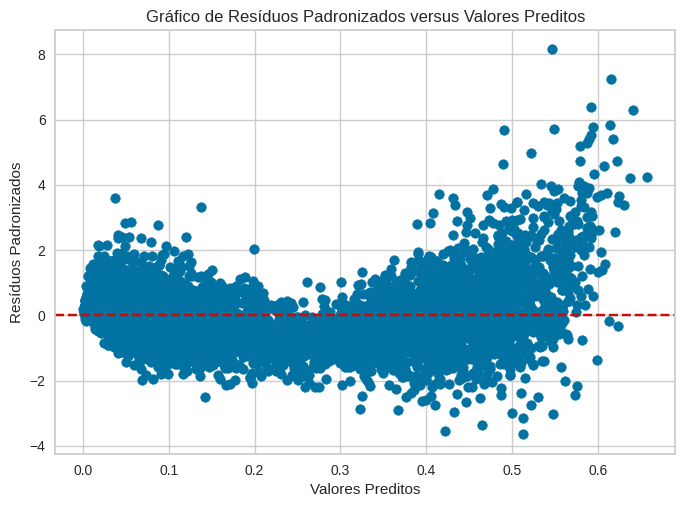

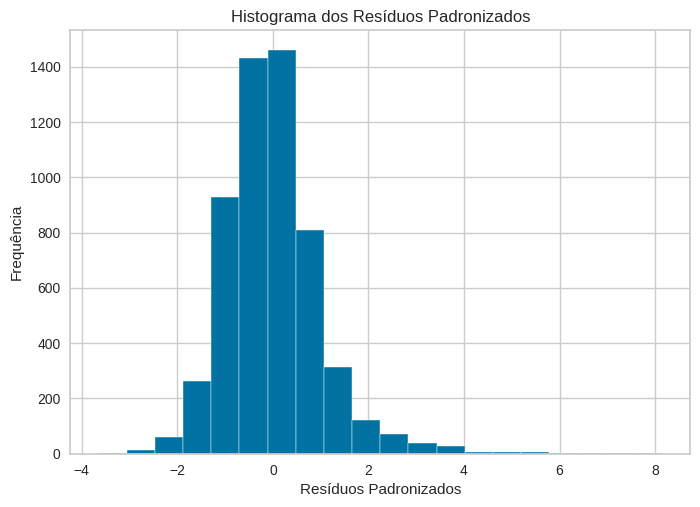

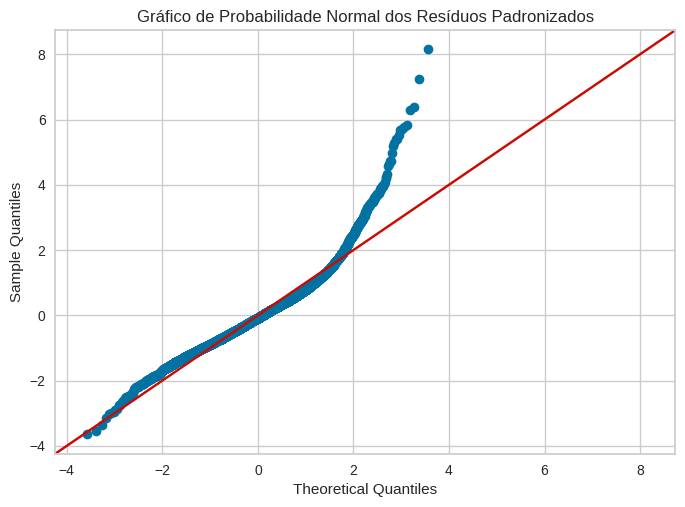

In [153]:
# Obtendo os valores ajustados (previstos) do modelo
fitted_values = res_pob.predict()

# Obtendo os valores observados
observed_values = dados_normalizados_df_copia['POB']

# Calculando os resíduos
residuals = observed_values - fitted_values

# Calculando os resíduos padronizados
standardized_residuals = residuals / np.std(residuals)

# Gráfico de resíduos padronizados versus valores preditos
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos Padronizados")
plt.title("Gráfico de Resíduos Padronizados versus Valores Preditos")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Histograma dos resíduos padronizados
plt.hist(standardized_residuals, bins=20)
plt.xlabel("Resíduos Padronizados")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos Padronizados")
plt.show()

# Gráfico de probabilidade normal dos resíduos
sm.qqplot(standardized_residuals, line='45')
plt.title("Gráfico de Probabilidade Normal dos Resíduos Padronizados")
plt.show()

A análise de resíduos indica que existe uma tendência no modelo, e que apesar de ser um modelo bem simples e com poucas variáveis, talvez foi simplificado demais e não é suficiente para explicar o conjunto de dados.

Decidimos optar pelo Modelo de Regressão Beta considerando a seleção de variáveis pelo Elastic Net para nossas análises, uma vez que suas estatísticas foram semelhantes às deste modelo que utiliza o Random Forest, além disso, o modelo Elastic Net demonstrou uma análise de resíduos mais apropriada, consolidando nossa escolha.

# 9. Conclusões

Concluindo esta segunda etapa de nosso projeto de mineração estatística, ficou evidente a complexidade e a riqueza dos dados disponíveis no Censo 2010 do IBGE, abrangendo 5565 municípios do Brasil. Nosso objetivo inicial era possuir um conhecimento maior da base de dados utilizando análise descritiva, análise exploratória de dados, pré-processamento, identificação de correlações, seleção de variáveis, análise de agrupamento, redução de dimensionalidade, e criação de um modelo de regressão beta que explicasse a variável resposta POB.

Com a visualização e exploração de dados, podemos perceber algumas cidades e estados que possuem maiores e menores concentrações de pobres por município (POB) em média. Percebemos que os estados com maiores POB pertecem à região Norte e Nordeste do Brasil, e os com menores POB estão na região Centro-Sul, com destaque ao estado de São Paulo. Esta observação é esperada, pois é de conhecimento geral o Centro-Sul do Brasil tende a possuir mais investimentos em infraestrutura, educação e saúde, o que contribui para o desenvolvimento socioeconômico dessas áreas.

Identificamos correlações (positivas e negativas) significativas entre diversas variáveis da base de dados. Isso nos sugere que uma redução de dimensionalidade é possível e indicada, a fim de evitar multicolinearidade nos modelos estatísticos. Uma redução de dimensionalidade (Análise de componentes principais - PCA) já foi apresentada. Uma observação importante na análise inicial foi a correlação negativa entre os índices de Desenvolvimento Humano e a proporção de pessoas em situação de pobreza. Esta associação sugere que municípios com maiores índices de desenvolvimento tendem a ter menores proporções de pessoas vivendo em condições de pobreza. No entanto, é importante ressaltar que essa relação pode ser influenciada por uma série de outros fatores e não necessariamente reflete uma relação causal direta.

Para realizarmos uma análise de agrupamento utilizamos dois métodos, o hierárquico e o não-hierárquico (k-means), chegando a resultados parecidos. Para o método não-hierárquico avaliamos um k-means com k=4 e k=5, após aplicação do método do cotovelo e uma avaliação qualitativa. Percebemos que como o Distrito Federal sempre ficava isolado (pois possui dados bem únicos) um agrupamento com menos que 4 cluster levaria a uma divisão muito pequena. O mapa com 5 cluster parece exibir uma divisão interessante dos estados, quase seguindo a divisão das regiões do país, com um cluster englobando a região norte, outro a região nordeste, um que engloba Sul junto de São Paulo e um quarto que engloba a região Centro-Oeste junto da Sudeste. Os resultados obtidos com o agrupamento hierárquico com distância de Ward obteve basicamente a mesma subdivisão.

Em seguida realizamos uma Análice de Componentes Principais (PCA) mais completa, a fim de entender o quanto conseguiríamos reduzir de dimensionalidade da base de dados. A primeira análise levou em conta quase todas covariáveis da base (236 covariáveis) e chegamos que com 20 componentes principais conseguimos explicar 88,66% da variância de todo o banco de dados. É uma redução de mais de 10x no número de variáveis explicativas para uma boa cobertura. Seguindo, sabemos por uma análise qualitativa que muita informação fornecida é "redundante", ou seja, variáveis explicativas que definem praticamente a mesma coisa. Assim, aplicamos agora uma redução de dimensionalidade num conjunto de variáveis já pré-selecionadas anteriormente. Com esta base já reduzida conseguimos criar um modelo com 3 componentes principais para explicar a variável resposta, porcentual de pessoas em situação de pobreza. Avaliando o modelo, todas 3 componentes foram consideradas significantes com 5% de confiança. As componentes principais também ajudaram a destacar a importância de algumas variáveis explicativas como, a Taxa de analfabetismo entre pessoas com 25 anos ou mais, Grau de formalização do trabalho das pessoas ocupadas com 18 anos ou mais e percentual de pessoas com água encanada.

A análise comparativa entre diferentes abordagens de seleção de variáveis para a construção de modelos de regressão beta revelou insights significativos sobre o desempenho e a adequação dos modelos. O Modelo de Regressão Beta com LASSO apresentou um ajuste moderado aos dados, explicando cerca de 38% da variabilidade, e apesar de ter baixos erros de previsão, seu desempenho foi inferior aos outros métodos de regularização. O Modelo de Regressão Beta com Ridge mostrou uma melhoria significativa em relação ao LASSO, explicando 50% da variabilidade dos dados e apresentando menores erros de previsão. O Modelo de Regressão Beta com Elastic Net foi o que melhor se ajustou aos dados entre os métodos de regularização, explicando 91.5% da variabilidade dos dados com erros de previsão bastante baixos. Este equilíbrio entre LASSO e Ridge resultou no modelo mais preciso e robusto. O Modelo de Regressão Beta com PCA apresentou os piores resultados, com um R² negativo, indicando que ele performa pior do que um modelo ingênuo, e altos erros de previsão, sugerindo overfitting. O Modelo de Regressão Beta com Random Forest apresentou um ajuste muito bom, explicando 93% da variabilidade dos dados e com os menores erros de previsão. Este modelo mostrou resultados semelhantes ao Elastic Net, mas com uma simplicidade que poderia ser vantajosa.

Ao comparar os métodos, o modelo de Regressão Beta com Elastic Net e o modelo com Random Forest destacaram-se como os melhores, ambos apresentam altos valores de R², baixos MSE e MAE, e uma robustez no ajuste aos dados, no entanto, a análise de resíduos do modelo Elastic Net foi mais apropriada, sugerindo um ajuste mais confiável e sem tendências significativas. Portanto, optamos pelo Modelo de Regressão Beta com Elastic Net para nossas análises finais devido ao seu equilíbrio entre simplicidade e precisão, e por apresentar uma análise de resíduos mais consistente. Este modelo mostrou-se eficaz em explicar a variabilidade dos dados e em fazer previsões precisas, consolidando-se como a melhor escolha para este conjunto de dados.



# 10. Referências

1. Projeto Atlas Brasil. Disponível em: http://www.atlasbrasil.org.br/. Acesso em: 20 mar. 2024.

2. Indicadores Sociais Municipais 2010: incidência de pobreza é maior nos municípios de porte médio. Disponível em: https://agenciadenoticias.ibge.gov.br/agencia-sala-de-imprensa/2013-agencia-de-noticias/releases/14124-asi-indicadores-sociais-municipais-2010-incidencia-de-pobreza-e-maior-nos-municipios-de-porte-medio. Acesso em: 20 mar. 2024.

3. Eberly College of Science - Penn State - Applied Multivariate Statistical Analysis. Disponível em: https://online.stat.psu.edu/stat505/lesson/11. Acesso em: 23 mar. 2024.

4. GeoPandas 0.dev+untagged. Disponível em: https://geopandas.org/en/stable/#:~:text=GeoPandas%20is%20an%20open%20source,access%20and%20matplotlib%20for%20plotting.. Acesso em: 26 abr. 2024.


5. Fiona: access to simple geospatial feature data. Disponível em: https://fiona.readthedocs.io/en/stable/. Acesso em: 26 abr. 2024.

6. About pandas. Disponível em: https://pandas.pydata.org/about/. Acesso em: 26 abr. 2024.

7. Matplotlib: Visualization with Python. Disponível em: https://matplotlib.org/. Acesso em: 26 abr. 2024.

8. seaborn: statistical data visualization. Disponível em: https://seaborn.pydata.org/. Acesso em: 26 abr. 2024.

9. Numpy: About us. Disponível em: https://numpy.org/about/. Acesso em: 26 abr. 2024.

10. Statistical functions (scipy.stats). Disponível em: https://docs.scipy.org/doc/scipy/reference/stats.html. Acesso em: 26 abr. 2024.

11. A Guide to the Regression of Rates and Proportions: Modelling probabilities using beta regression in Python. Disponível em: https://towardsdatascience.com/a-guide-to-the-regression-of-rates-and-proportions-bcfe1c35344f. Acesso em: 30 abr. 2024.

12. Babu, V. (2020). Clustering of resumes into various job profiles using K-means and TF-IDF. Medium. Disponível em: https://medium.com/@varshnibabu/clustering-of-resumes-into-various-job-profiles-using-k-means-and-tf-idf-6fe6d4abd5a8. Acessado em: 18 de maio de 2024.

13. Monteiro, L. V. (2014). Análise e visualização de dados multidimensionais: estudo de caso aplicado ao dataset Adult. Dissertação de Mestrado, Pontifícia Universidade Católica do Rio de Janeiro. Disponível em: https://www.maxwell.vrac.puc-rio.br/24787/24787_5.PDF.

14. Github: josef-pkt/beta_regression.ipynb. Disponível em: https://gist.github.com/josef-pkt/4d0fd829c8fbc1c4237d989ba3dbb088#file-beta_regression-ipynb. Acesso em: 08 mai. 2024.

15. Nelder-Mead algorithm. Disponível em: http://www.scholarpedia.org/article/Nelder-Mead_algorithm. Acesso em 15 mai. 2024.

16. Introduction to geobr (Python). Disponível em: https://ipeagit.github.io/geobr/articles/python-intro/py-intro-to-geobr.html. Acesso em 15 mai. 2024.